# Reading Data

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('arabam_train.csv').drop(columns='Unnamed: 0')
test = pd.read_csv('arabam_test.csv').drop(columns='Unnamed: 0')

In [3]:
train.head()

price_try             make                 series  year      km  \
0     364950          Peugeot          Other Peugeot  2003  149000   
1     769950              BMW               5 Series  2008  369000   
2     635000             Ford                  Focus  2012  210000   
3    1760000  Mercedes - Benz  Other Mercedes - Benz  2020   38000   
4     850000          Renault                 Megane  2021   30000   

    transmission            fuel  body_type     warranty   from_  ...  \
0         Manual  LPG & Gasoline  Hatchback  Warrantless  Dealer  ...   
1      Automatic          Diesel      Sedan  Warrantless  Dealer  ...   
2         Manual          Diesel      Sedan  Warrantless  Dealer  ...   
3  Semiautomatic        Gasoline      Sedan  Warrantless   Owner  ...   
4         Manual        Gasoline      Sedan  Warrantless   Owner  ...   

  cylinder_number  torque_nm  engine_capacity_cc  engine_power_hp  \
0               4        147                1587              110   
1               4        350                1995              177   
2               4        230                1560               95   
3               4        200                1332              136   
4               4        205                1198              130   

   max_power_rpm  min_power_rpm  acceleration_0to100_sec  max_speed_kmh  \
0           2500           1200                     11.6            190   
1           4000           1750                      8.4            226   
2           3600           2000                     12.5            180   
3           5500           1460                      9.3            216   
4           5500           2000                     10.3            200   

   average_fuel_consumption_lt  painted_changed  
0                          7.2         Original  
1                          6.1         Original  
2                          4.2         Original  
3                          5.3         Original  
4                          5.4         Original  

[5 rows x 21 columns]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price_try                    1499 non-null   int64  
 1   make                         1499 non-null   object 
 2   series                       1499 non-null   object 
 3   year                         1499 non-null   int64  
 4   km                           1499 non-null   int64  
 5   transmission                 1499 non-null   object 
 6   fuel                         1499 non-null   object 
 7   body_type                    1499 non-null   object 
 8   warranty                     1499 non-null   object 
 9   from_                        1499 non-null   object 
 10  wheel_drive                  1499 non-null   object 
 11  cylinder_number              1499 non-null   int64  
 12  torque_nm                    1499 non-null   int64  
 13  engine_capacity_cc

In [5]:
test.head()

make       series  year      km   transmission            fuel  \
0     Ford        Focus  2009  281000      Automatic  LPG & Gasoline   
1  Renault         Clio  2017  162000  Semiautomatic          Diesel   
2     Opel        Corsa  2003  205000  Semiautomatic  LPG & Gasoline   
3     Ford        Focus  2014  209000         Manual  LPG & Gasoline   
4    Other  Other Other  1993  217000         Manual  LPG & Gasoline   

   body_type     warranty   from_        wheel_drive  cylinder_number  \
0      Sedan  Warrantless   Owner  Front-Wheel Drive                4   
1  Hatchback  Warrantless   Owner  Front-Wheel Drive                4   
2  Hatchback  Warrantless  Dealer  Front-Wheel Drive                4   
3      Sedan  Warrantless   Owner  Front-Wheel Drive                4   
4  Hatchback  Warrantless   Owner  Front-Wheel Drive                4   

   torque_nm  engine_capacity_cc  engine_power_hp  max_power_rpm  \
0        150                1596              100           6000   
1        220                1461               90           4000   
2        110                1199               75           2500   
3        158                1596              125           6300   
4        130                1300               95           2500   

   min_power_rpm  acceleration_0to100_sec  max_speed_kmh  \
0           4000                     14.2            182   
1           1750                     12.9            176   
2           1200                     14.0            170   
3           4000                     10.9            198   
4           1200                     16.4            150   

   average_fuel_consumption_lt     painted_changed  
0                          6.7            Original  
1                          3.7  Painted or Changed  
2                          6.2  Painted or Changed  
3                          6.0            Original  
4                          5.5            Original

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make                         999 non-null    object 
 1   series                       999 non-null    object 
 2   year                         999 non-null    int64  
 3   km                           999 non-null    int64  
 4   transmission                 999 non-null    object 
 5   fuel                         999 non-null    object 
 6   body_type                    999 non-null    object 
 7   warranty                     999 non-null    object 
 8   from_                        999 non-null    object 
 9   wheel_drive                  999 non-null    object 
 10  cylinder_number              999 non-null    int64  
 11  torque_nm                    999 non-null    int64  
 12  engine_capacity_cc           999 non-null    int64  
 13  engine_power_hp     

# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------

# Simple Linear Regression

In [7]:
from sklearn.model_selection import train_test_split

X = train.loc[:,['year','km', 'engine_capacity_cc']]
y = train.price_try

X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train, x_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [8]:
print('X Train:', x_train.shape)
print('X Validation:', x_cv.shape)
print('X test:', x_test.shape)

X Train: (899, 3)
X Validation: (300, 3)
X test: (300, 3)


In [9]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

mse = np.mean((pred - y_cv)**2)
print("MSE: ", mse)

print("R2 Score: ", lreg.score(x_cv, y_cv))

MSE:  124388781216957.62
R2 Score:  -612.9700445611068


In [10]:
lreg.coef_

array([ 4.63103124e+04, -2.01408532e+00,  2.10852221e+03])

# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------

# EDA & Feature Engineering

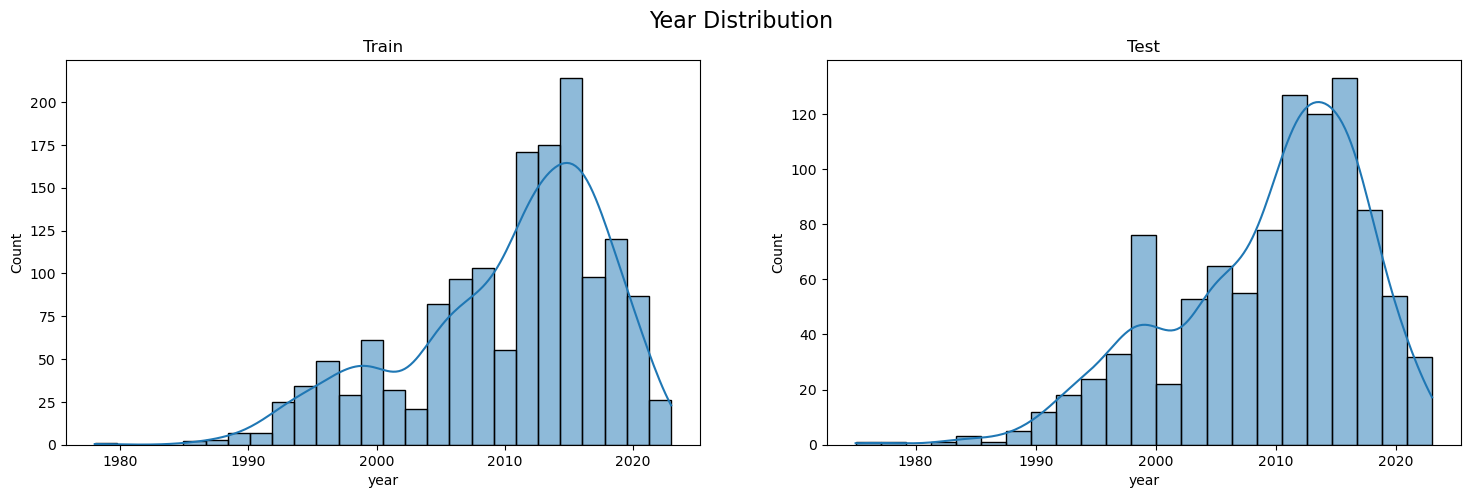

In [11]:
plt.figure(figsize=[18,5])

plt.suptitle('Year Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['year'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['year'], kde=True)
plt.title('Test');

In [12]:
train['year'].describe()

count    1499.000000
mean     2010.362909
std         7.659762
min      1978.000000
25%      2006.000000
50%      2012.000000
75%      2016.000000
max      2023.000000
Name: year, dtype: float64

In [13]:
test['year'].describe()

count     999.000000
mean     2009.388388
std         7.981900
min      1975.000000
25%      2004.500000
50%      2011.000000
75%      2015.000000
max      2023.000000
Name: year, dtype: float64

In [14]:
train['year'] = 2023 - train['year']
test['year'] = 2023 - test['year']

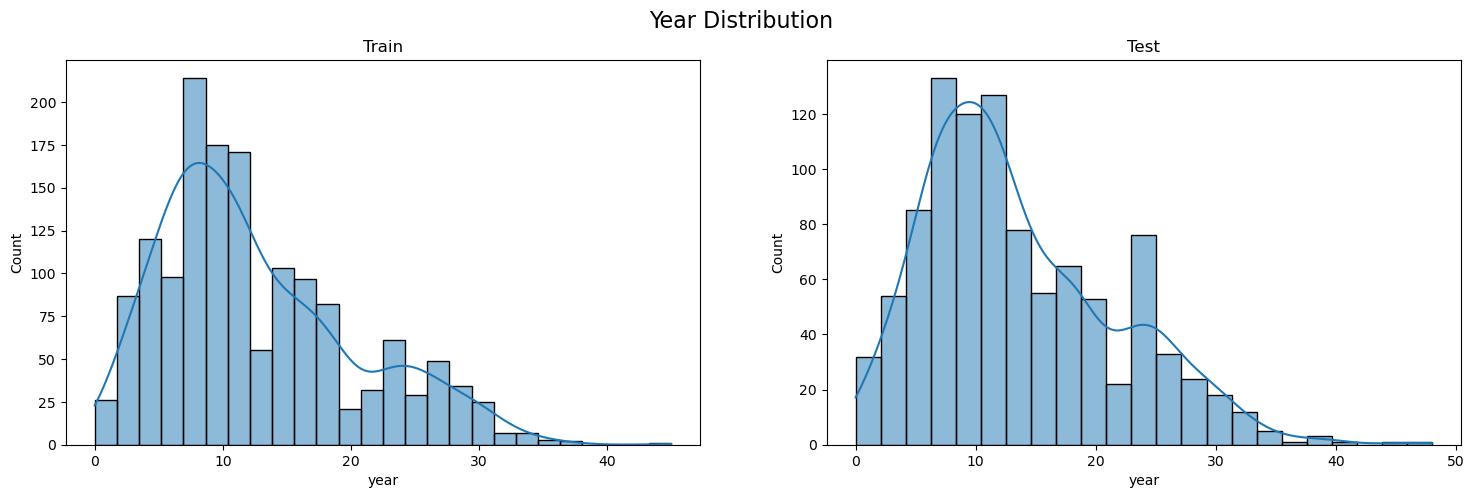

In [15]:
plt.figure(figsize=[18,5])

plt.suptitle('Year Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['year'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['year'], kde=True)
plt.title('Test');

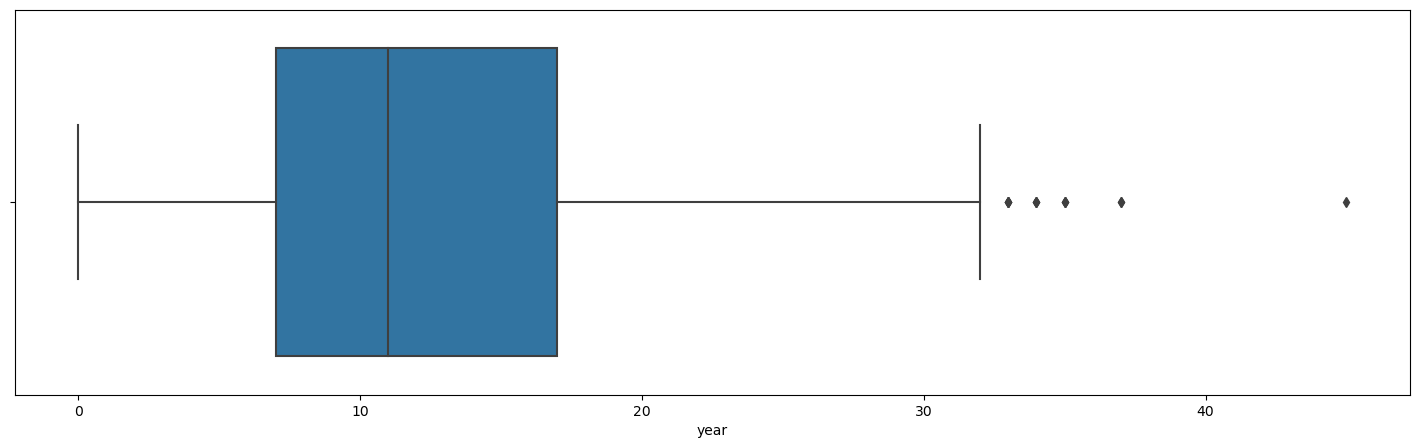

In [16]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['year'], data=train);

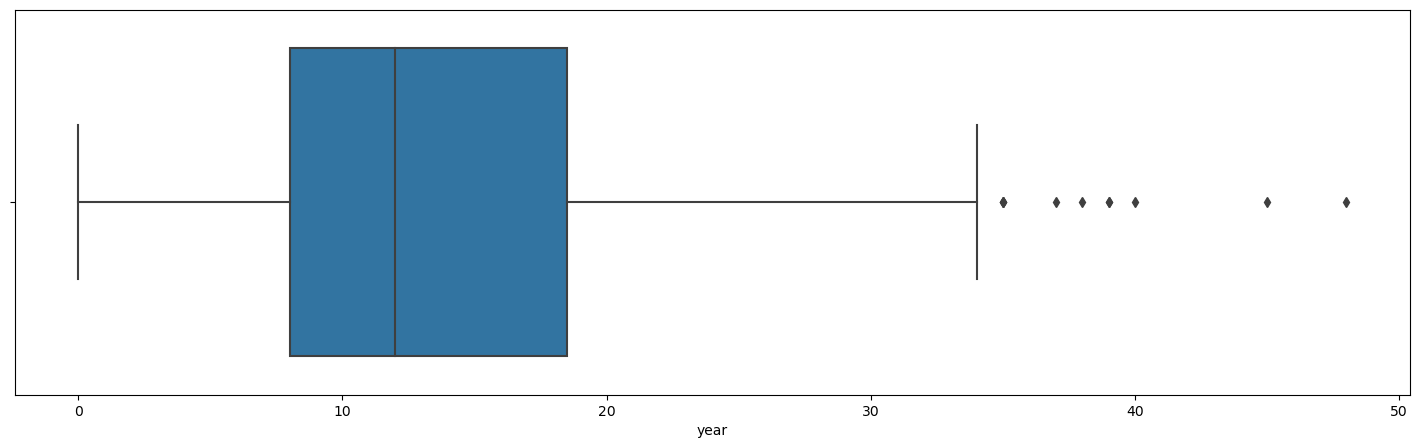

In [17]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['year'], data=test);

In [18]:
def extract_whiskers(data, whisker=1.5):
    median_value = np.median(data)
    upper_quartile = np.percentile(data, 75)
    lower_quartile = np.percentile(data, 25)

    iqr = upper_quartile - lower_quartile
    
    upper_whisker = data[data<=upper_quartile+whisker*iqr].max()
    lower_whisker = data[data>=lower_quartile-whisker*iqr].min()
    
    print("Upper Whisker:", upper_whisker)
    print("Lower Whisker:", lower_whisker)

In [19]:
extract_whiskers(train['year'])

Upper Whisker: 32
Lower Whisker: 0


In [20]:
train = train.loc[train['year'] < 32]
train

price_try             make                 series  year      km  \
0        364950          Peugeot          Other Peugeot    20  149000   
1        769950              BMW               5 Series    15  369000   
2        635000             Ford                  Focus    11  210000   
3       1760000  Mercedes - Benz  Other Mercedes - Benz     3   38000   
4        850000          Renault                 Megane     2   30000   
...         ...              ...                    ...   ...     ...   
1494     635000             Seat             Other Seat    11  137000   
1495     275000             Fiat             Other Fiat    24  256000   
1496     662000          Renault                   Clio     3   42000   
1497     610000             Ford                  Focus    17  200000   
1498     629000       Volkswagen                   Polo     8  162000   

       transmission            fuel  body_type     warranty   from_  ...  \
0            Manual  LPG & Gasoline  Hatchback  Warrantless  Dealer  ...   
1         Automatic          Diesel      Sedan  Warrantless  Dealer  ...   
2            Manual          Diesel      Sedan  Warrantless  Dealer  ...   
3     Semiautomatic        Gasoline      Sedan  Warrantless   Owner  ...   
4            Manual        Gasoline      Sedan  Warrantless   Owner  ...   
...             ...             ...        ...          ...     ...  ...   
1494         Manual        Gasoline  Hatchback  Warrantless   Owner  ...   
1495         Manual  LPG & Gasoline  Hatchback  Warrantless   Owner  ...   
1496         Manual        Gasoline  Hatchback  Warrantless   Owner  ...   
1497         Manual  LPG & Gasoline      Sedan  Warrantless   Owner  ...   
1498         Manual          Diesel  Hatchback  Warrantless   Owner  ...   

     cylinder_number  torque_nm  engine_capacity_cc  engine_power_hp  \
0                  4        147                1587              110   
1                  4        350                1995              177   
2                  4        230                1560               95   
3                  4        200                1332              136   
4                  4        205                1198              130   
...              ...        ...                 ...              ...   
1494               4        132                1390               85   
1495               4        140                1581              100   
1496               3        140                 898               90   
1497               4        155                1596              115   
1498               3        210                1422               75   

      max_power_rpm  min_power_rpm  acceleration_0to100_sec  max_speed_kmh  \
0              2500           1200                     11.6            190   
1              4000           1750                      8.4            226   
2              3600           2000                     12.5            180   
3              5500           1460                      9.3            216   
4              5500           2000                     10.3            200   
...             ...            ...                      ...            ...   
1494           5000           3800                     11.8            177   
1495           5750           4000                     10.3            186   
1496           5000           2500                     12.9            178   
1497           6000           4150                     10.8            190   
1498           3750           1500                     12.9            173   

      average_fuel_consumption_lt     painted_changed  
0                             7.2            Original  
1                             6.1            Original  
2                             4.2            Original  
3                             5.3            Original  
4                             5.4            Original  
...                           ...                 ...  
1494                  

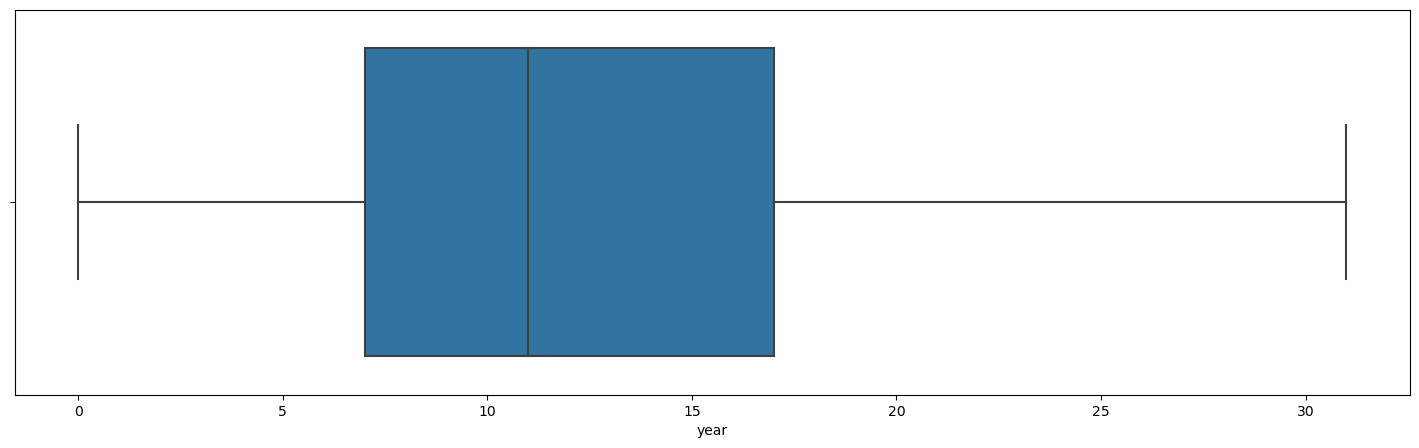

In [21]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['year'], data=train);

In [22]:
extract_whiskers(test['year'])

Upper Whisker: 34
Lower Whisker: 0


In [23]:
test = test.loc[test['year'] < 35]
test

make         series  year      km   transmission            fuel  \
0       Ford          Focus    14  281000      Automatic  LPG & Gasoline   
1    Renault           Clio     6  162000  Semiautomatic          Diesel   
2       Opel          Corsa    20  205000  Semiautomatic  LPG & Gasoline   
3       Ford          Focus     9  209000         Manual  LPG & Gasoline   
4      Other    Other Other    30  217000         Manual  LPG & Gasoline   
..       ...            ...   ...     ...            ...             ...   
994     Opel          Astra    18  228000         Manual  LPG & Gasoline   
995  Renault  Other Renault    26  370000         Manual  LPG & Gasoline   
996     Fiat          Linea    12  446000         Manual          Diesel   
997  Renault         Symbol    12   60000         Manual        Gasoline   
998     Fiat           Egea     4   35000         Manual        Gasoline   

     body_type     warranty   from_        wheel_drive  cylinder_number  \
0        Sedan  Warrantless   Owner  Front-Wheel Drive                4   
1    Hatchback  Warrantless   Owner  Front-Wheel Drive                4   
2    Hatchback  Warrantless  Dealer  Front-Wheel Drive                4   
3        Sedan  Warrantless   Owner  Front-Wheel Drive                4   
4    Hatchback  Warrantless   Owner  Front-Wheel Drive                4   
..         ...          ...     ...                ...              ...   
994  Hatchback  Warrantless   Owner  Front-Wheel Drive                4   
995  Hatchback  Warrantless   Owner  Front-Wheel Drive                4   
996      Sedan  Warrantless   Owner  Front-Wheel Drive                4   
997      Sedan  Warrantless   Owner  Front-Wheel Drive                4   
998      Sedan  Warrantless   Owner  Front-Wheel Drive                4   

     torque_nm  engine_capacity_cc  engine_power_hp  max_power_rpm  \
0          150                1596              100           6000   
1          220                1461               90           4000   
2          110                1199               75           2500   
3          158                1596              125           6300   
4          130                1300               95           2500   
..         ...                 ...              ...            ...   
994        150                1598              105           6000   
995        131                1598               90           5250   
996        290                1598              105           4000   
997        114                1390               75           5500   
998        127                1368               95           6000   

     min_power_rpm  acceleration_0to100_sec  max_speed_kmh  \
0             4000                     14.2            182   
1             1750                     12.9            176   
2             1200                     14.0            170   
3             4000                     10.9            198   
4             1200                     16.4            150   
..             ...                      ...            ...   
994           3900                     12.3            185   
995           2500                     14.8            187   
996           1500                     11.0            190   
997           4250                     12.5            170   
998           4500                     11.5            185   

     average_fuel_consumption_lt     painted_changed  
0                            6.7            Original  
1                            3.7  Painted or Changed  
2                            6.2  Painted or Changed  
3                            6.0            Original  
4                            5.5            Original  
..                           ...                 ...  
994                          6.6  Painted or Changed  
995                          6.2            Original  
996                          5.0  Painted or Changed  
997                          7.1            Original  
998

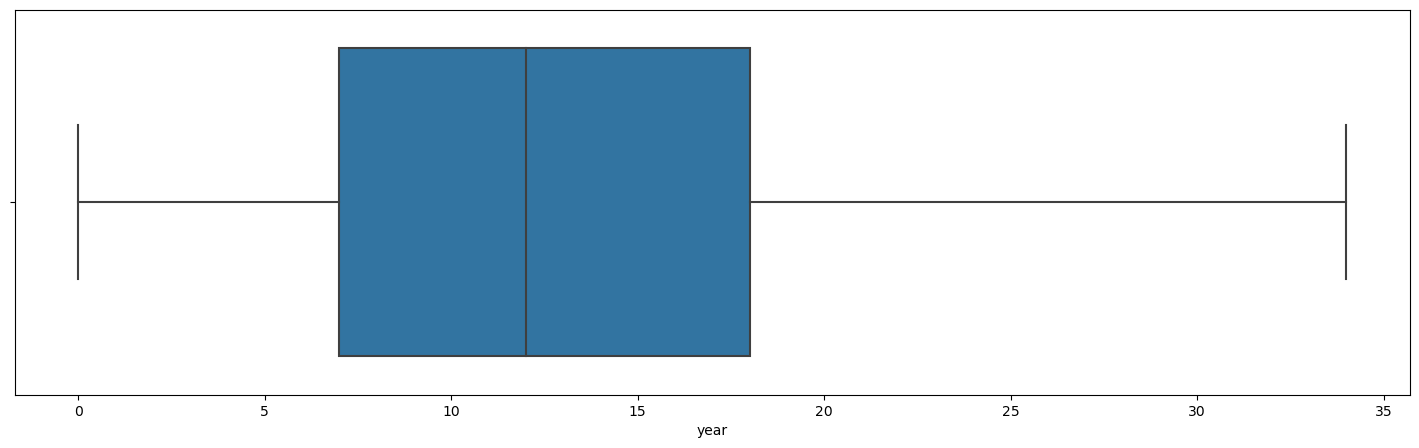

In [24]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['year'], data=test);

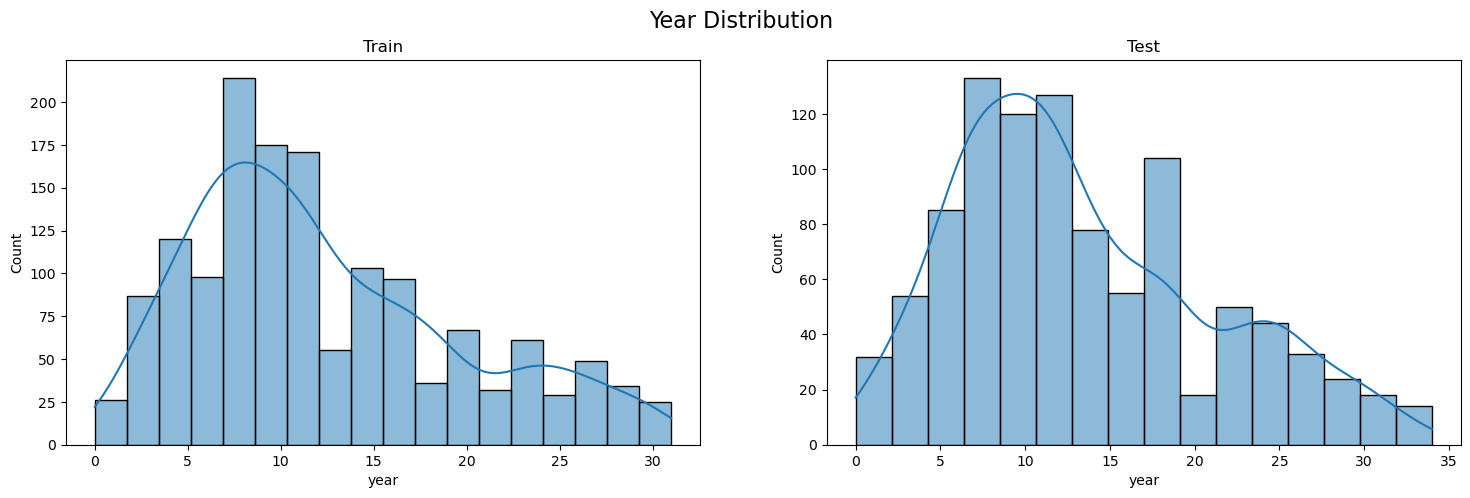

In [25]:
plt.figure(figsize=[18,5])

plt.suptitle('Year Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['year'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['year'], kde=True)
plt.title('Test');

# -------------------------------------------------------------------------------------------

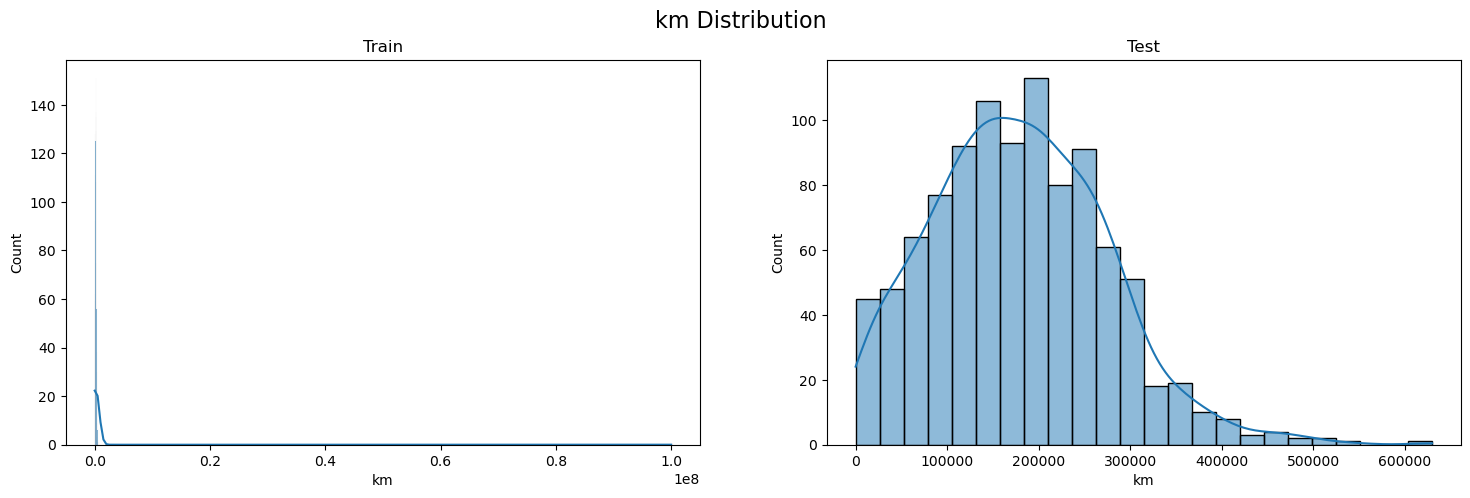

In [26]:
plt.figure(figsize=[18,5])

plt.suptitle('km Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['km'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['km'], kde=True)
plt.title('Test');

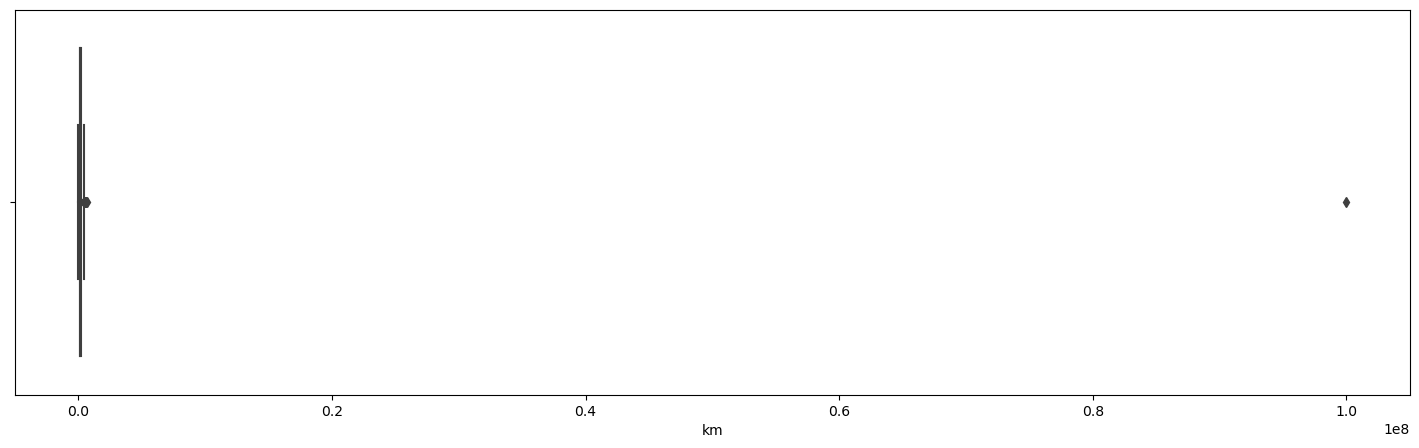

In [27]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['km'], data=train);

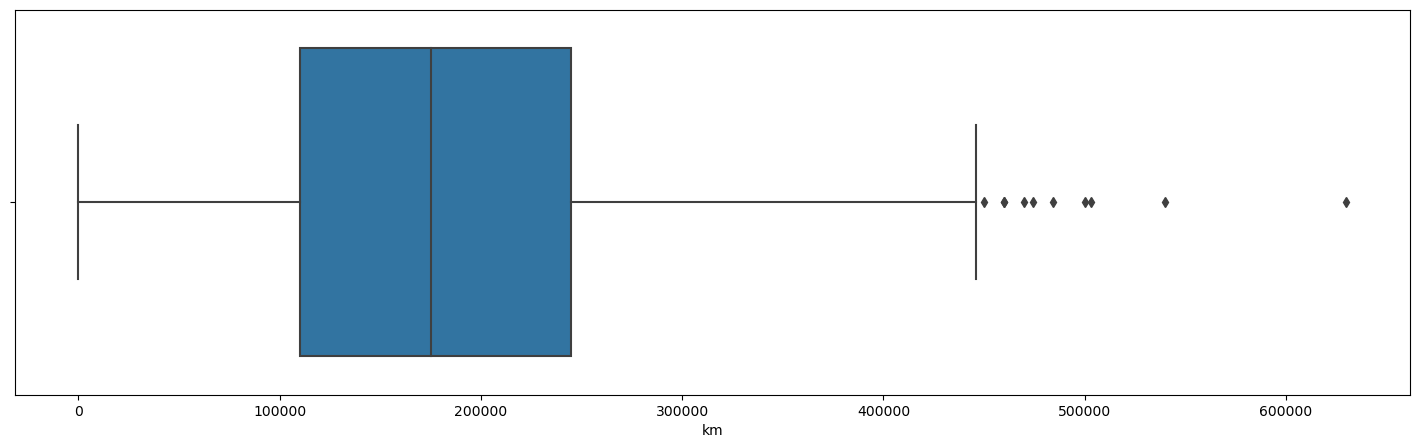

In [28]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['km'], data=train);

In [29]:
extract_whiskers(train['km'])

Upper Whisker: 444444
Lower Whisker: 0


In [30]:
train = train.loc[train['km'] < 444444]
train

price_try             make                 series  year      km  \
0        364950          Peugeot          Other Peugeot    20  149000   
1        769950              BMW               5 Series    15  369000   
2        635000             Ford                  Focus    11  210000   
3       1760000  Mercedes - Benz  Other Mercedes - Benz     3   38000   
4        850000          Renault                 Megane     2   30000   
...         ...              ...                    ...   ...     ...   
1494     635000             Seat             Other Seat    11  137000   
1495     275000             Fiat             Other Fiat    24  256000   
1496     662000          Renault                   Clio     3   42000   
1497     610000             Ford                  Focus    17  200000   
1498     629000       Volkswagen                   Polo     8  162000   

       transmission            fuel  body_type     warranty   from_  ...  \
0            Manual  LPG & Gasoline  Hatchback  Warrantless  Dealer  ...   
1         Automatic          Diesel      Sedan  Warrantless  Dealer  ...   
2            Manual          Diesel      Sedan  Warrantless  Dealer  ...   
3     Semiautomatic        Gasoline      Sedan  Warrantless   Owner  ...   
4            Manual        Gasoline      Sedan  Warrantless   Owner  ...   
...             ...             ...        ...          ...     ...  ...   
1494         Manual        Gasoline  Hatchback  Warrantless   Owner  ...   
1495         Manual  LPG & Gasoline  Hatchback  Warrantless   Owner  ...   
1496         Manual        Gasoline  Hatchback  Warrantless   Owner  ...   
1497         Manual  LPG & Gasoline      Sedan  Warrantless   Owner  ...   
1498         Manual          Diesel  Hatchback  Warrantless   Owner  ...   

     cylinder_number  torque_nm  engine_capacity_cc  engine_power_hp  \
0                  4        147                1587              110   
1                  4        350                1995              177   
2                  4        230                1560               95   
3                  4        200                1332              136   
4                  4        205                1198              130   
...              ...        ...                 ...              ...   
1494               4        132                1390               85   
1495               4        140                1581              100   
1496               3        140                 898               90   
1497               4        155                1596              115   
1498               3        210                1422               75   

      max_power_rpm  min_power_rpm  acceleration_0to100_sec  max_speed_kmh  \
0              2500           1200                     11.6            190   
1              4000           1750                      8.4            226   
2              3600           2000                     12.5            180   
3              5500           1460                      9.3            216   
4              5500           2000                     10.3            200   
...             ...            ...                      ...            ...   
1494           5000           3800                     11.8            177   
1495           5750           4000                     10.3            186   
1496           5000           2500                     12.9            178   
1497           6000           4150                     10.8            190   
1498           3750           1500                     12.9            173   

      average_fuel_consumption_lt     painted_changed  
0                             7.2            Original  
1                             6.1            Original  
2                             4.2            Original  
3                             5.3            Original  
4                             5.4            Original  
...                           ...                 ...  
1494                  

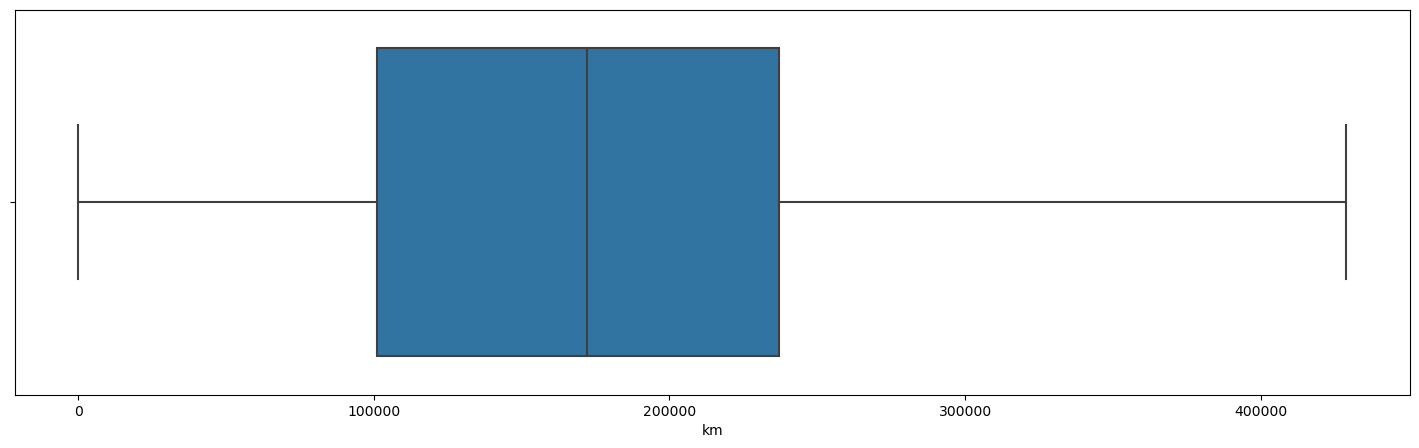

In [31]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['km'], data=train);

In [32]:
extract_whiskers(test['km'])

Upper Whisker: 446000
Lower Whisker: 1


In [33]:
test = test.loc[test['km'] < 446000]
test

make         series  year      km   transmission            fuel  \
0       Ford          Focus    14  281000      Automatic  LPG & Gasoline   
1    Renault           Clio     6  162000  Semiautomatic          Diesel   
2       Opel          Corsa    20  205000  Semiautomatic  LPG & Gasoline   
3       Ford          Focus     9  209000         Manual  LPG & Gasoline   
4      Other    Other Other    30  217000         Manual  LPG & Gasoline   
..       ...            ...   ...     ...            ...             ...   
993    Other    Other Other    23  294500         Manual  LPG & Gasoline   
994     Opel          Astra    18  228000         Manual  LPG & Gasoline   
995  Renault  Other Renault    26  370000         Manual  LPG & Gasoline   
997  Renault         Symbol    12   60000         Manual        Gasoline   
998     Fiat           Egea     4   35000         Manual        Gasoline   

     body_type     warranty   from_        wheel_drive  cylinder_number  \
0        Sedan  Warrantless   Owner  Front-Wheel Drive                4   
1    Hatchback  Warrantless   Owner  Front-Wheel Drive                4   
2    Hatchback  Warrantless  Dealer  Front-Wheel Drive                4   
3        Sedan  Warrantless   Owner  Front-Wheel Drive                4   
4    Hatchback  Warrantless   Owner  Front-Wheel Drive                4   
..         ...          ...     ...                ...              ...   
993  Hatchback  Warrantless   Owner  Front-Wheel Drive                4   
994  Hatchback  Warrantless   Owner  Front-Wheel Drive                4   
995  Hatchback  Warrantless   Owner  Front-Wheel Drive                4   
997      Sedan  Warrantless   Owner  Front-Wheel Drive                4   
998      Sedan  Warrantless   Owner  Front-Wheel Drive                4   

     torque_nm  engine_capacity_cc  engine_power_hp  max_power_rpm  \
0          150                1596              100           6000   
1          220                1461               90           4000   
2          110                1199               75           2500   
3          158                1596              125           6300   
4          130                1300               95           2500   
..         ...                 ...              ...            ...   
993        140                1401              101           2500   
994        150                1598              105           6000   
995        131                1598               90           5250   
997        114                1390               75           5500   
998        127                1368               95           6000   

     min_power_rpm  acceleration_0to100_sec  max_speed_kmh  \
0             4000                     14.2            182   
1             1750                     12.9            176   
2             1200                     14.0            170   
3             4000                     10.9            198   
4             1200                     16.4            150   
..             ...                      ...            ...   
993           1200                     16.4            150   
994           3900                     12.3            185   
995           2500                     14.8            187   
997           4250                     12.5            170   
998           4500                     11.5            185   

     average_fuel_consumption_lt     painted_changed  
0                            6.7            Original  
1                            3.7  Painted or Changed  
2                            6.2  Painted or Changed  
3                            6.0            Original  
4                            5.5            Original  
..                           ...                 ...  
993                          5.5  Painted or Changed  
994                          6.6  Painted or Changed  
995                          6.2            Original  
997                          7.1            Original  
998

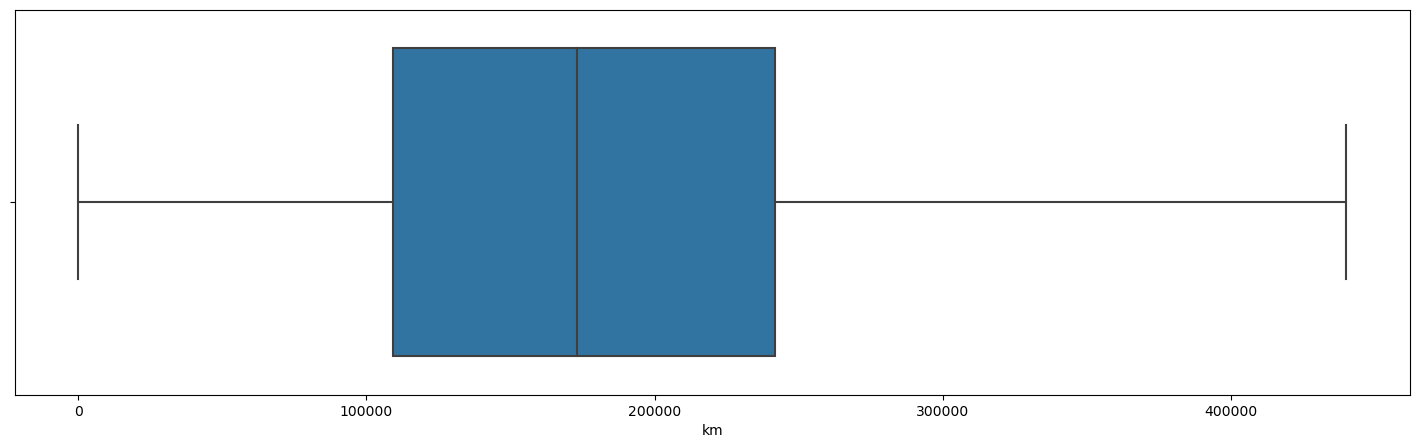

In [34]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['km'], data=train);

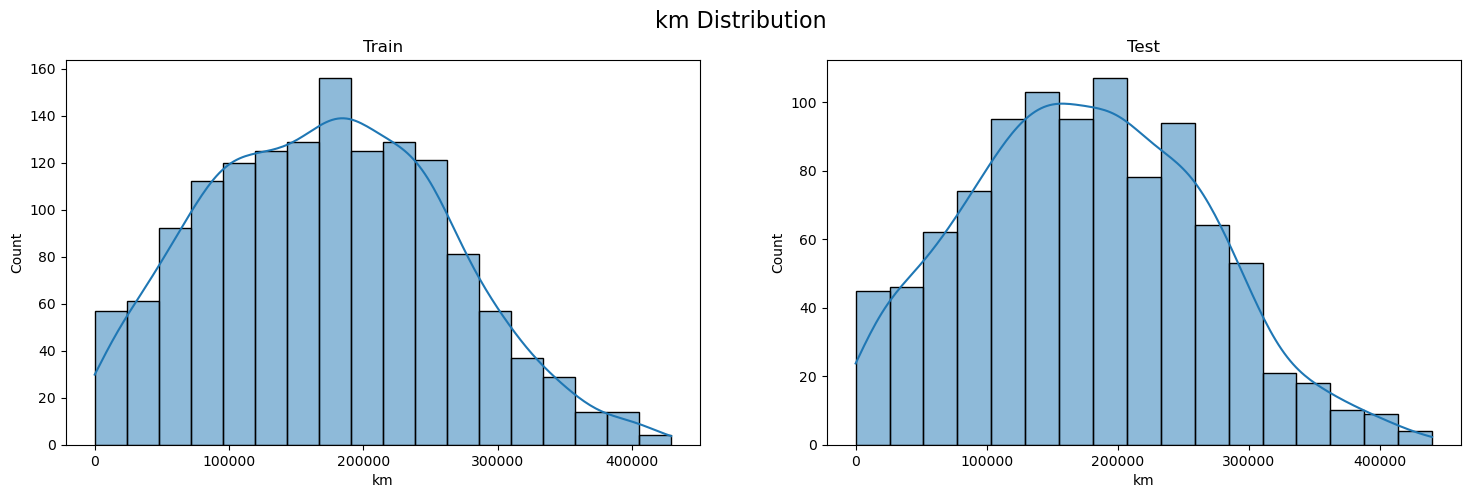

In [35]:
plt.figure(figsize=[18,5])

plt.suptitle('km Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['km'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['km'], kde=True)
plt.title('Test');

# -------------------------------------------------------------------------------------------

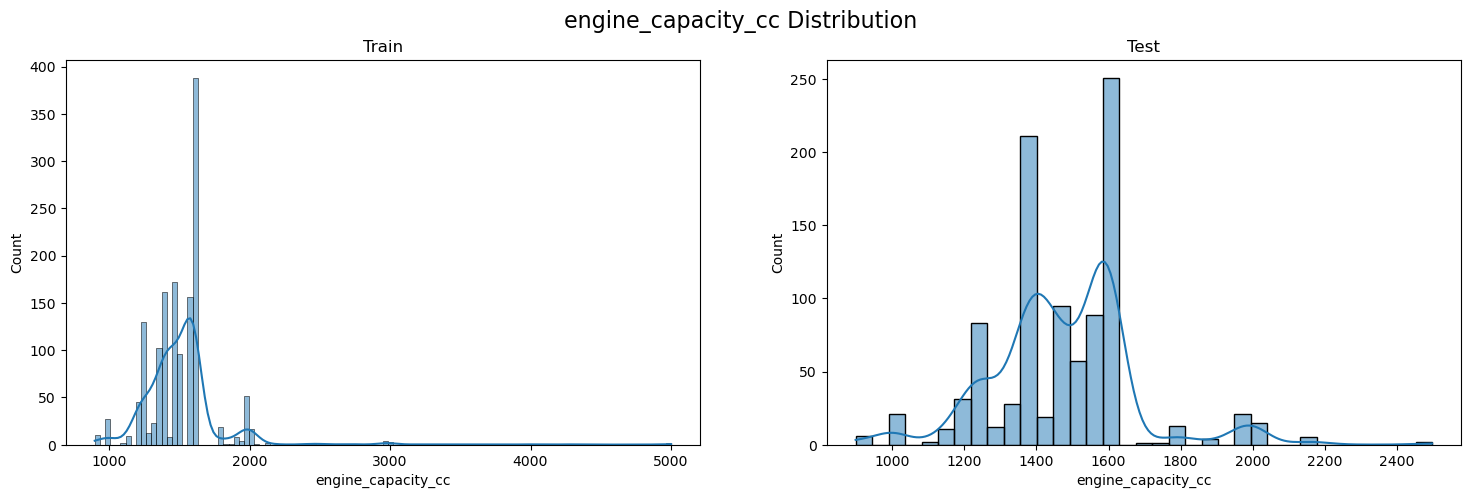

In [36]:
plt.figure(figsize=[18,5])

plt.suptitle('engine_capacity_cc Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['engine_capacity_cc'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['engine_capacity_cc'], kde=True)
plt.title('Test');

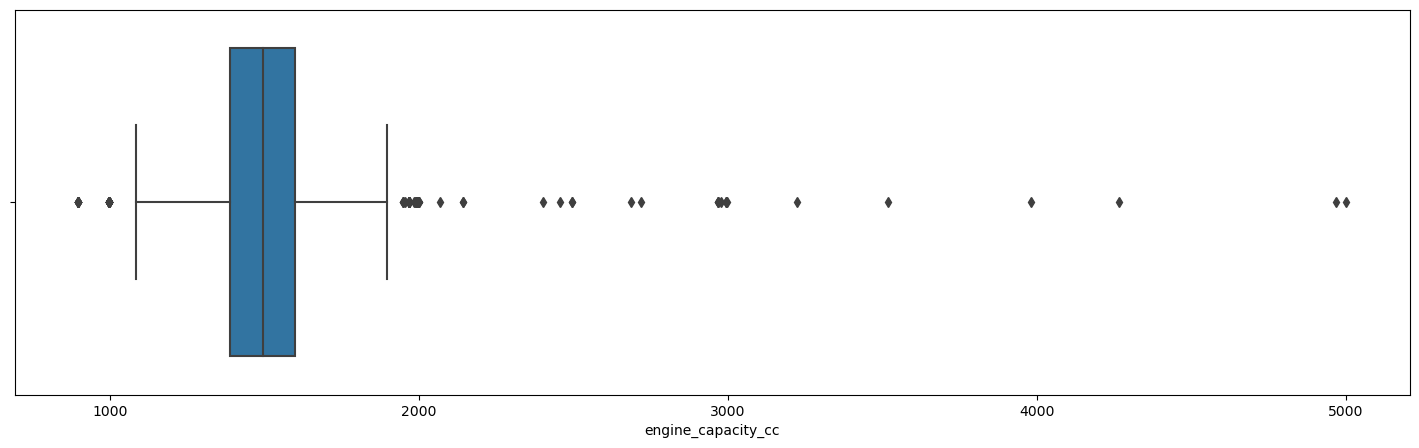

In [37]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['engine_capacity_cc'], data=train);

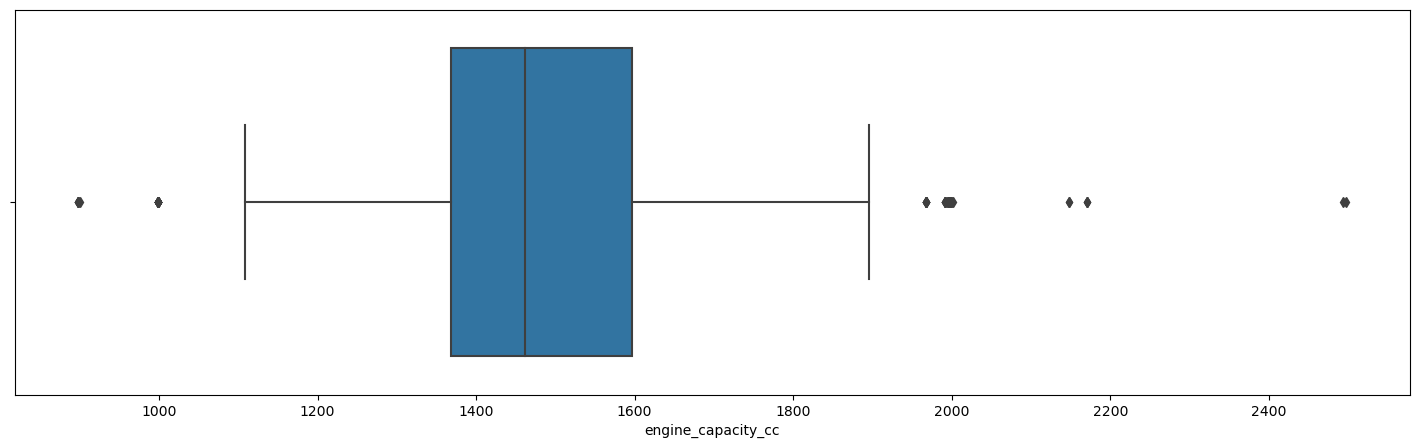

In [38]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['engine_capacity_cc'], data=test);

In [39]:
extract_whiskers(train['engine_capacity_cc'])

Upper Whisker: 1896
Lower Whisker: 1086


In [40]:
train = train.loc[train['engine_capacity_cc'] < 1896]
train = train.loc[train['engine_capacity_cc'] > 1086]
train

price_try             make                 series  year      km  \
0        364950          Peugeot          Other Peugeot    20  149000   
2        635000             Ford                  Focus    11  210000   
3       1760000  Mercedes - Benz  Other Mercedes - Benz     3   38000   
4        850000          Renault                 Megane     2   30000   
5        715000             Ford                  Focus     6  120000   
...         ...              ...                    ...   ...     ...   
1493     715000          Renault                   Clio     6  260000   
1494     635000             Seat             Other Seat    11  137000   
1495     275000             Fiat             Other Fiat    24  256000   
1497     610000             Ford                  Focus    17  200000   
1498     629000       Volkswagen                   Polo     8  162000   

       transmission            fuel  body_type     warranty   from_  ...  \
0            Manual  LPG & Gasoline  Hatchback  Warrantless  Dealer  ...   
2            Manual          Diesel      Sedan  Warrantless  Dealer  ...   
3     Semiautomatic        Gasoline      Sedan  Warrantless   Owner  ...   
4            Manual        Gasoline      Sedan  Warrantless   Owner  ...   
5            Manual          Diesel      Sedan  Warrantless   Owner  ...   
...             ...             ...        ...          ...     ...  ...   
1493  Semiautomatic          Diesel  Hatchback  Warrantless  Dealer  ...   
1494         Manual        Gasoline  Hatchback  Warrantless   Owner  ...   
1495         Manual  LPG & Gasoline  Hatchback  Warrantless   Owner  ...   
1497         Manual  LPG & Gasoline      Sedan  Warrantless   Owner  ...   
1498         Manual          Diesel  Hatchback  Warrantless   Owner  ...   

     cylinder_number  torque_nm  engine_capacity_cc  engine_power_hp  \
0                  4        147                1587              110   
2                  4        230                1560               95   
3                  4        200                1332              136   
4                  4        205                1198              130   
5                  4        230                1560               95   
...              ...        ...                 ...              ...   
1493               4        220                1461               90   
1494               4        132                1390               85   
1495               4        140                1581              100   
1497               4        155                1596              115   
1498               3        210                1422               75   

      max_power_rpm  min_power_rpm  acceleration_0to100_sec  max_speed_kmh  \
0              2500           1200                     11.6            190   
2              3600           2000                     12.5            180   
3              5500           1460                      9.3            216   
4              5500           2000                     10.3            200   
5              3600           1500                     12.6            182   
...             ...            ...                      ...            ...   
1493           4000           1750                     12.9            176   
1494           5000           3800                     11.8            177   
1495           5750           4000                     10.3            186   
1497           6000           4150                     10.8            190   
1498           3750           1500                     12.9            173   

      average_fuel_consumption_lt     painted_changed  
0                             7.2            Original  
2                             4.2            Original  
3                             5.3            Original  
4                             5.4            Original  
5                             4.5            Original  
...                           ...                 ...  
1493                  

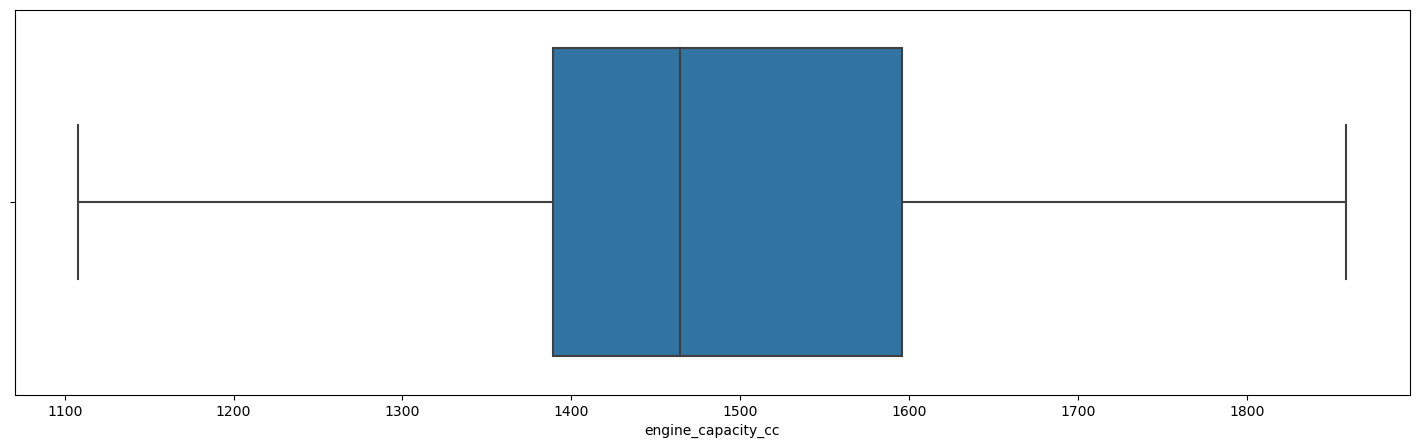

In [41]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['engine_capacity_cc'], data=train);

In [42]:
extract_whiskers(test['engine_capacity_cc'])

Upper Whisker: 1896
Lower Whisker: 1108


In [43]:
test = test.loc[test['engine_capacity_cc'] < 1896]
test = test.loc[test['engine_capacity_cc'] > 1108]
test

make         series  year      km   transmission            fuel  \
0       Ford          Focus    14  281000      Automatic  LPG & Gasoline   
1    Renault           Clio     6  162000  Semiautomatic          Diesel   
2       Opel          Corsa    20  205000  Semiautomatic  LPG & Gasoline   
3       Ford          Focus     9  209000         Manual  LPG & Gasoline   
4      Other    Other Other    30  217000         Manual  LPG & Gasoline   
..       ...            ...   ...     ...            ...             ...   
993    Other    Other Other    23  294500         Manual  LPG & Gasoline   
994     Opel          Astra    18  228000         Manual  LPG & Gasoline   
995  Renault  Other Renault    26  370000         Manual  LPG & Gasoline   
997  Renault         Symbol    12   60000         Manual        Gasoline   
998     Fiat           Egea     4   35000         Manual        Gasoline   

     body_type     warranty   from_        wheel_drive  cylinder_number  \
0        Sedan  Warrantless   Owner  Front-Wheel Drive                4   
1    Hatchback  Warrantless   Owner  Front-Wheel Drive                4   
2    Hatchback  Warrantless  Dealer  Front-Wheel Drive                4   
3        Sedan  Warrantless   Owner  Front-Wheel Drive                4   
4    Hatchback  Warrantless   Owner  Front-Wheel Drive                4   
..         ...          ...     ...                ...              ...   
993  Hatchback  Warrantless   Owner  Front-Wheel Drive                4   
994  Hatchback  Warrantless   Owner  Front-Wheel Drive                4   
995  Hatchback  Warrantless   Owner  Front-Wheel Drive                4   
997      Sedan  Warrantless   Owner  Front-Wheel Drive                4   
998      Sedan  Warrantless   Owner  Front-Wheel Drive                4   

     torque_nm  engine_capacity_cc  engine_power_hp  max_power_rpm  \
0          150                1596              100           6000   
1          220                1461               90           4000   
2          110                1199               75           2500   
3          158                1596              125           6300   
4          130                1300               95           2500   
..         ...                 ...              ...            ...   
993        140                1401              101           2500   
994        150                1598              105           6000   
995        131                1598               90           5250   
997        114                1390               75           5500   
998        127                1368               95           6000   

     min_power_rpm  acceleration_0to100_sec  max_speed_kmh  \
0             4000                     14.2            182   
1             1750                     12.9            176   
2             1200                     14.0            170   
3             4000                     10.9            198   
4             1200                     16.4            150   
..             ...                      ...            ...   
993           1200                     16.4            150   
994           3900                     12.3            185   
995           2500                     14.8            187   
997           4250                     12.5            170   
998           4500                     11.5            185   

     average_fuel_consumption_lt     painted_changed  
0                            6.7            Original  
1                            3.7  Painted or Changed  
2                            6.2  Painted or Changed  
3                            6.0            Original  
4                            5.5            Original  
..                           ...                 ...  
993                          5.5  Painted or Changed  
994                          6.6  Painted or Changed  
995                          6.2            Original  
997                          7.1            Original  
998

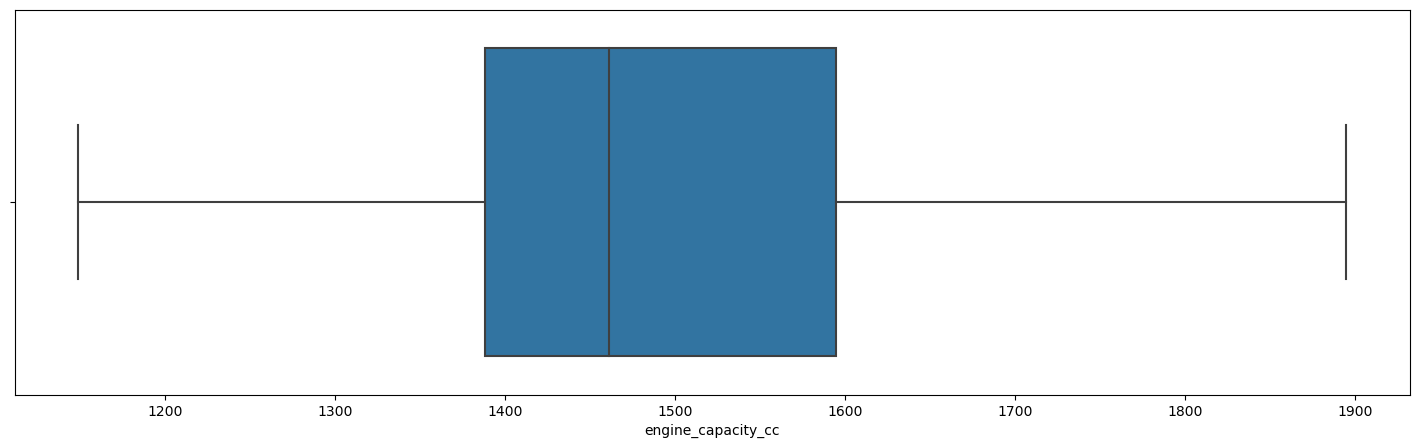

In [44]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['engine_capacity_cc'], data=test);

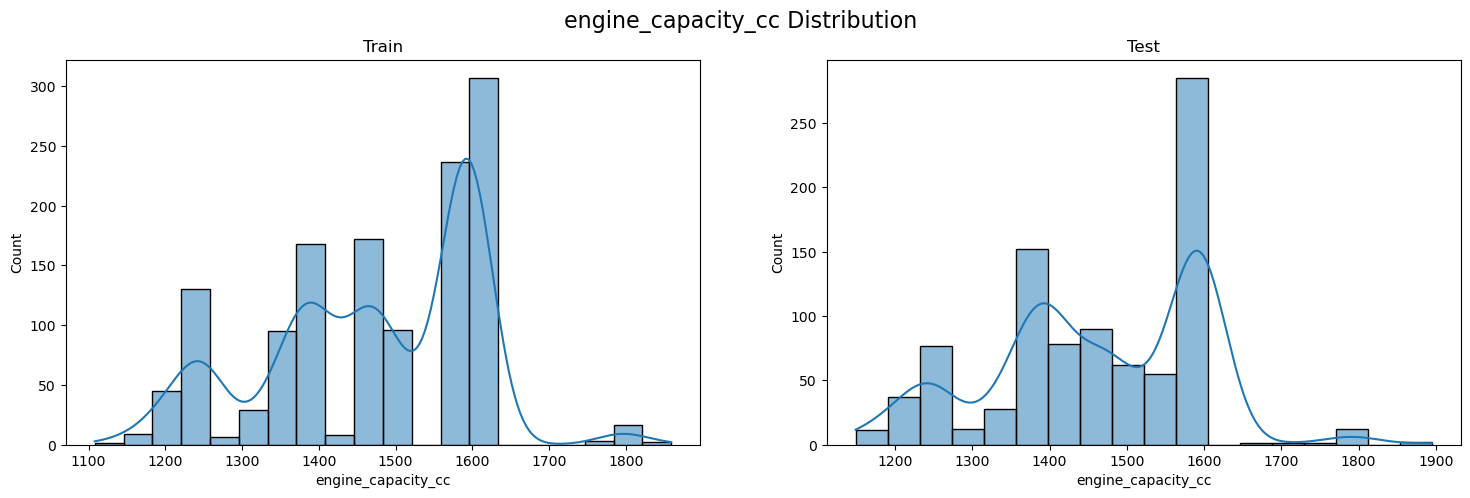

In [45]:
plt.figure(figsize=[18,5])

plt.suptitle('engine_capacity_cc Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['engine_capacity_cc'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['engine_capacity_cc'], kde=True)
plt.title('Test');

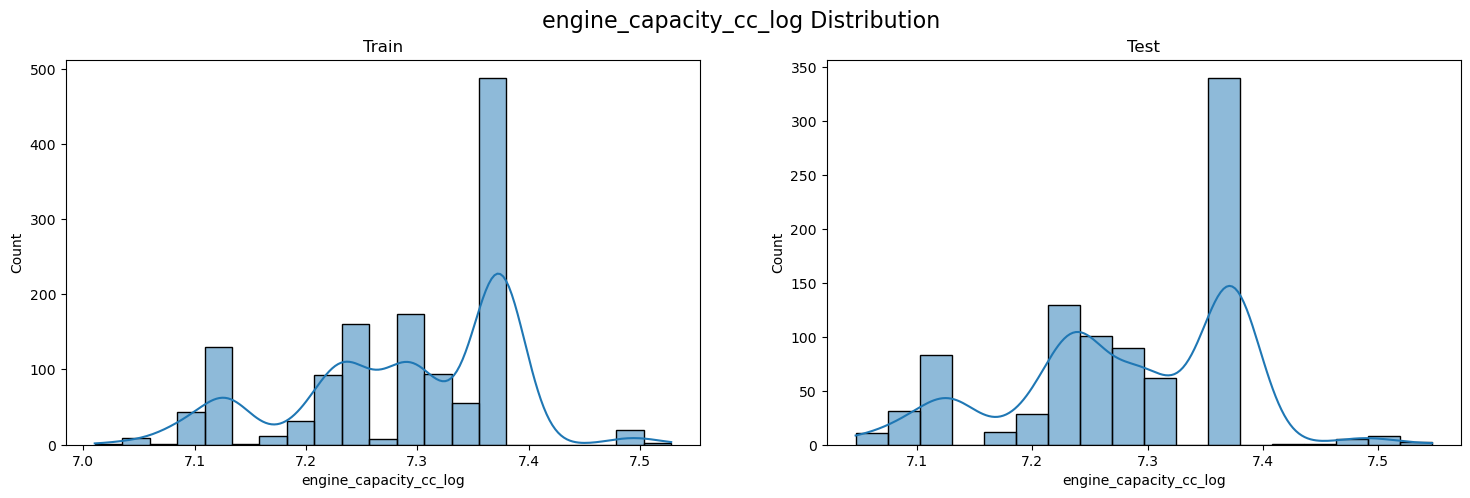

In [46]:
train['engine_capacity_cc_log'] = np.log(train['engine_capacity_cc'])
test['engine_capacity_cc_log'] = np.log(test['engine_capacity_cc'])

plt.figure(figsize=[18,5])

plt.suptitle('engine_capacity_cc_log Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['engine_capacity_cc_log'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['engine_capacity_cc_log'], kde=True)
plt.title('Test');

# -------------------------------------------------------------------------------------------

In [47]:
train['cylinder_number'].value_counts()

4    1288
3      36
Name: cylinder_number, dtype: int64

In [48]:
test['cylinder_number'].value_counts()

4    876
3     28
Name: cylinder_number, dtype: int64

# -------------------------------------------------------------------------------------------

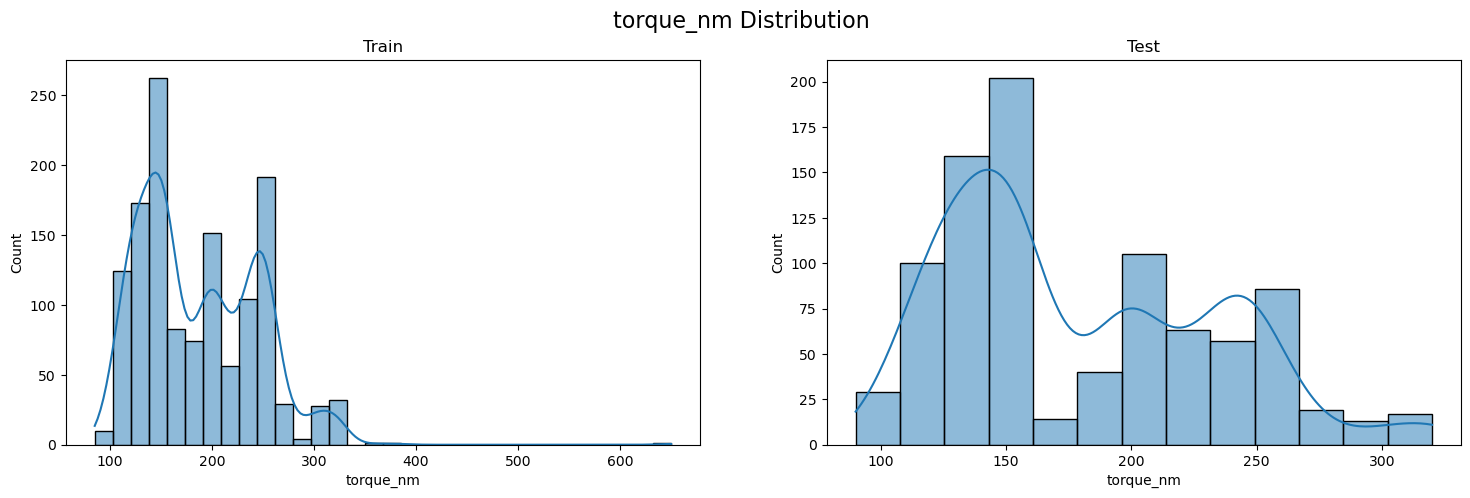

In [49]:
plt.figure(figsize=[18,5])

plt.suptitle('torque_nm Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['torque_nm'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['torque_nm'], kde=True)
plt.title('Test');

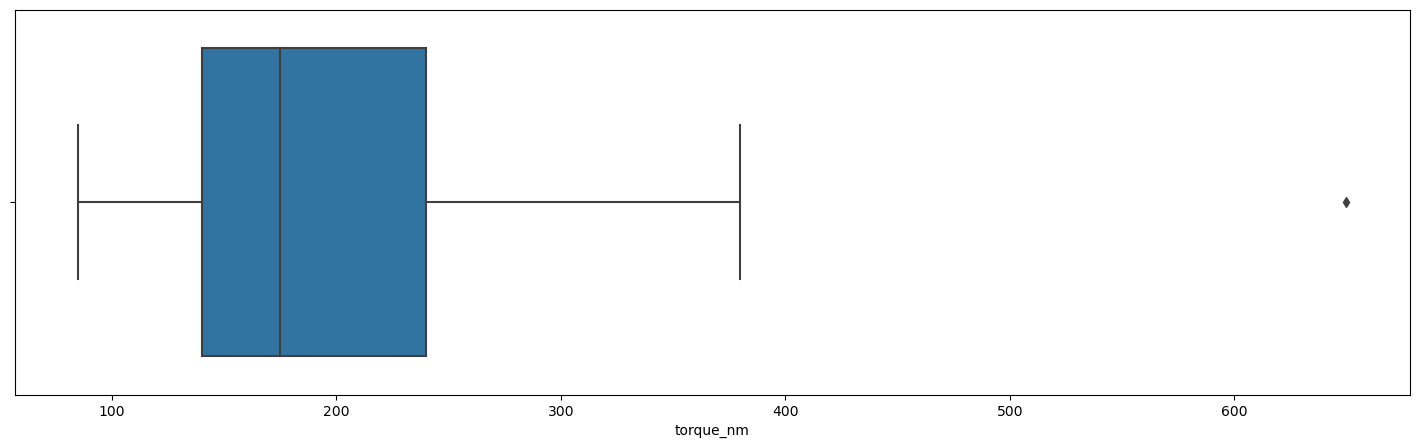

In [50]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['torque_nm'], data=train);

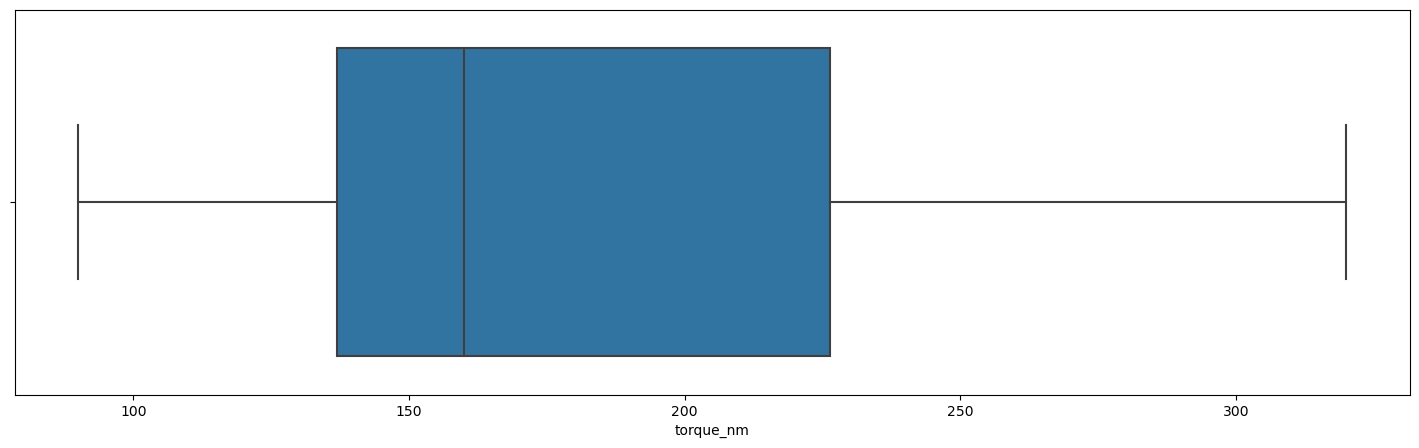

In [51]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['torque_nm'], data=test);

In [52]:
extract_whiskers(train['torque_nm'])

Upper Whisker: 380
Lower Whisker: 85


In [53]:
train = train.loc[train['torque_nm'] < 380]
train = train.loc[train['torque_nm'] > 85]
train

price_try             make                 series  year      km  \
0        364950          Peugeot          Other Peugeot    20  149000   
2        635000             Ford                  Focus    11  210000   
3       1760000  Mercedes - Benz  Other Mercedes - Benz     3   38000   
4        850000          Renault                 Megane     2   30000   
5        715000             Ford                  Focus     6  120000   
...         ...              ...                    ...   ...     ...   
1493     715000          Renault                   Clio     6  260000   
1494     635000             Seat             Other Seat    11  137000   
1495     275000             Fiat             Other Fiat    24  256000   
1497     610000             Ford                  Focus    17  200000   
1498     629000       Volkswagen                   Polo     8  162000   

       transmission            fuel  body_type     warranty   from_  ...  \
0            Manual  LPG & Gasoline  Hatchback  Warrantless  Dealer  ...   
2            Manual          Diesel      Sedan  Warrantless  Dealer  ...   
3     Semiautomatic        Gasoline      Sedan  Warrantless   Owner  ...   
4            Manual        Gasoline      Sedan  Warrantless   Owner  ...   
5            Manual          Diesel      Sedan  Warrantless   Owner  ...   
...             ...             ...        ...          ...     ...  ...   
1493  Semiautomatic          Diesel  Hatchback  Warrantless  Dealer  ...   
1494         Manual        Gasoline  Hatchback  Warrantless   Owner  ...   
1495         Manual  LPG & Gasoline  Hatchback  Warrantless   Owner  ...   
1497         Manual  LPG & Gasoline      Sedan  Warrantless   Owner  ...   
1498         Manual          Diesel  Hatchback  Warrantless   Owner  ...   

     torque_nm  engine_capacity_cc  engine_power_hp  max_power_rpm  \
0          147                1587              110           2500   
2          230                1560               95           3600   
3          200                1332              136           5500   
4          205                1198              130           5500   
5          230                1560               95           3600   
...        ...                 ...              ...            ...   
1493       220                1461               90           4000   
1494       132                1390               85           5000   
1495       140                1581              100           5750   
1497       155                1596              115           6000   
1498       210                1422               75           3750   

      min_power_rpm  acceleration_0to100_sec  max_speed_kmh  \
0              1200                     11.6            190   
2              2000                     12.5            180   
3              1460                      9.3            216   
4              2000                     10.3            200   
5              1500                     12.6            182   
...             ...                      ...            ...   
1493           1750                     12.9            176   
1494           3800                     11.8            177   
1495           4000                     10.3            186   
1497           4150                     10.8            190   
1498           1500                     12.9            173   

      average_fuel_consumption_lt     painted_changed  engine_capacity_cc_log  
0                             7.2            Original                7.369601  
2                             4.2            Original                7.352441  
3                             5.3            Original                7.194437  
4                             5.4            Original                7.088409  
5                             4.5            Original                7.352441  
...                           ...                 ...                     ...  
1493                          3.7            Original     

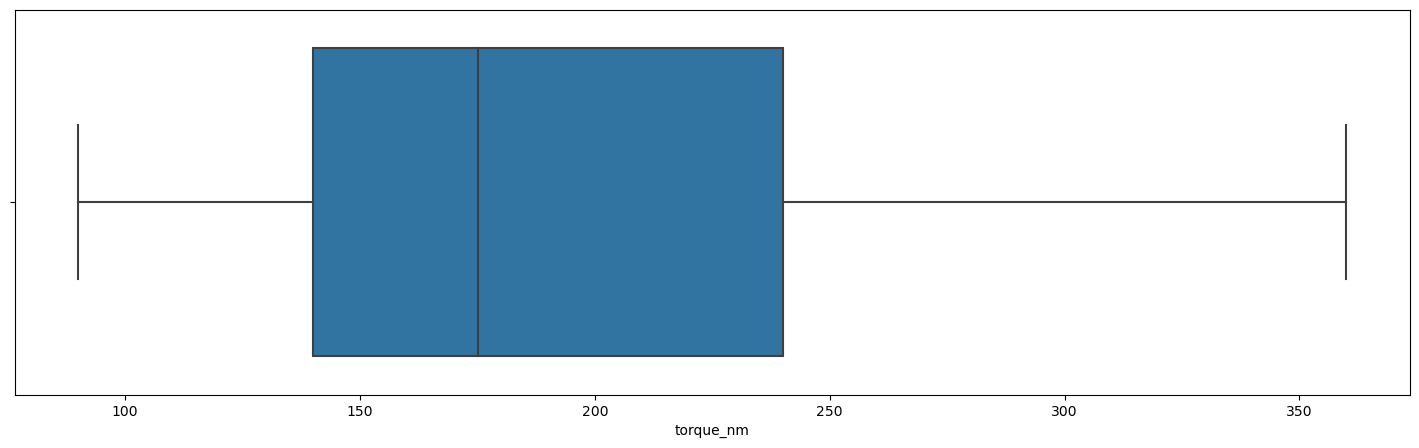

In [54]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['torque_nm'], data=train);

In [55]:
extract_whiskers(test['torque_nm'])

Upper Whisker: 320
Lower Whisker: 90


In [56]:
test = test.loc[test['torque_nm'] < 320]
test = test.loc[test['torque_nm'] > 90]
test

make         series  year      km   transmission            fuel  \
0       Ford          Focus    14  281000      Automatic  LPG & Gasoline   
1    Renault           Clio     6  162000  Semiautomatic          Diesel   
2       Opel          Corsa    20  205000  Semiautomatic  LPG & Gasoline   
3       Ford          Focus     9  209000         Manual  LPG & Gasoline   
4      Other    Other Other    30  217000         Manual  LPG & Gasoline   
..       ...            ...   ...     ...            ...             ...   
993    Other    Other Other    23  294500         Manual  LPG & Gasoline   
994     Opel          Astra    18  228000         Manual  LPG & Gasoline   
995  Renault  Other Renault    26  370000         Manual  LPG & Gasoline   
997  Renault         Symbol    12   60000         Manual        Gasoline   
998     Fiat           Egea     4   35000         Manual        Gasoline   

     body_type     warranty   from_        wheel_drive  ...  torque_nm  \
0        Sedan  Warrantless   Owner  Front-Wheel Drive  ...        150   
1    Hatchback  Warrantless   Owner  Front-Wheel Drive  ...        220   
2    Hatchback  Warrantless  Dealer  Front-Wheel Drive  ...        110   
3        Sedan  Warrantless   Owner  Front-Wheel Drive  ...        158   
4    Hatchback  Warrantless   Owner  Front-Wheel Drive  ...        130   
..         ...          ...     ...                ...  ...        ...   
993  Hatchback  Warrantless   Owner  Front-Wheel Drive  ...        140   
994  Hatchback  Warrantless   Owner  Front-Wheel Drive  ...        150   
995  Hatchback  Warrantless   Owner  Front-Wheel Drive  ...        131   
997      Sedan  Warrantless   Owner  Front-Wheel Drive  ...        114   
998      Sedan  Warrantless   Owner  Front-Wheel Drive  ...        127   

     engine_capacity_cc  engine_power_hp  max_power_rpm  min_power_rpm  \
0                  1596              100           6000           4000   
1                  1461               90           4000           1750   
2                  1199               75           2500           1200   
3                  1596              125           6300           4000   
4                  1300               95           2500           1200   
..                  ...              ...            ...            ...   
993                1401              101           2500           1200   
994                1598              105           6000           3900   
995                1598               90           5250           2500   
997                1390               75           5500           4250   
998                1368               95           6000           4500   

     acceleration_0to100_sec  max_speed_kmh  average_fuel_consumption_lt  \
0                       14.2            182                          6.7   
1                       12.9            176                          3.7   
2                       14.0            170                          6.2   
3                       10.9            198                          6.0   
4                       16.4            150                          5.5   
..                       ...            ...                          ...   
993                     16.4            150                          5.5   
994                     12.3            185                          6.6   
995                     14.8            187                          6.2   
997                     12.5            170                          7.1   
998                     11.5            185                          5.7   

        painted_changed engine_capacity_cc_log  
0              Original               7.375256  
1    Painted or Changed               7.286876  
2    Painted or Changed               7.089243  
3              Original               7.375256  
4              Original               7.170120  
..                  ...                    ...  
993  Painted or Changed               7.244942  
994  Painted

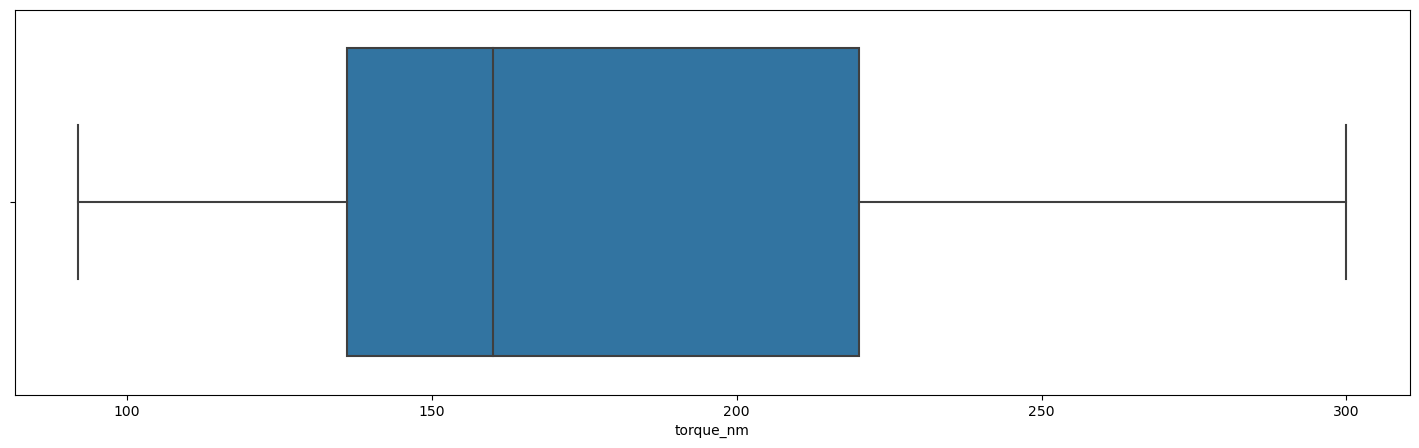

In [57]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['torque_nm'], data=test);

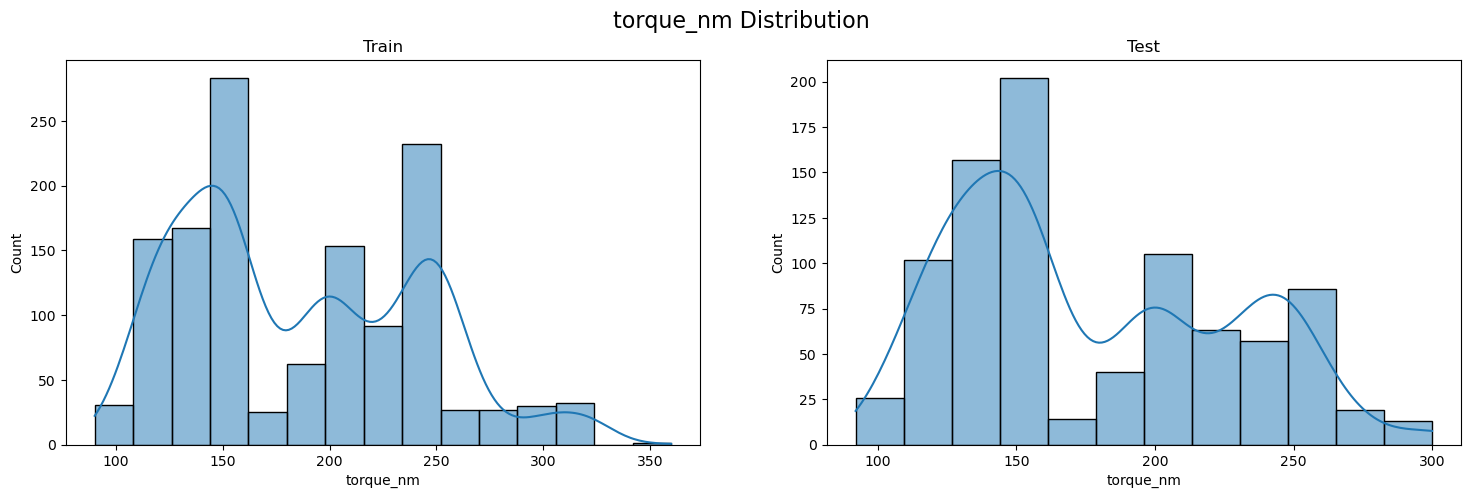

In [58]:
plt.figure(figsize=[18,5])

plt.suptitle('torque_nm Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['torque_nm'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['torque_nm'], kde=True)
plt.title('Test');

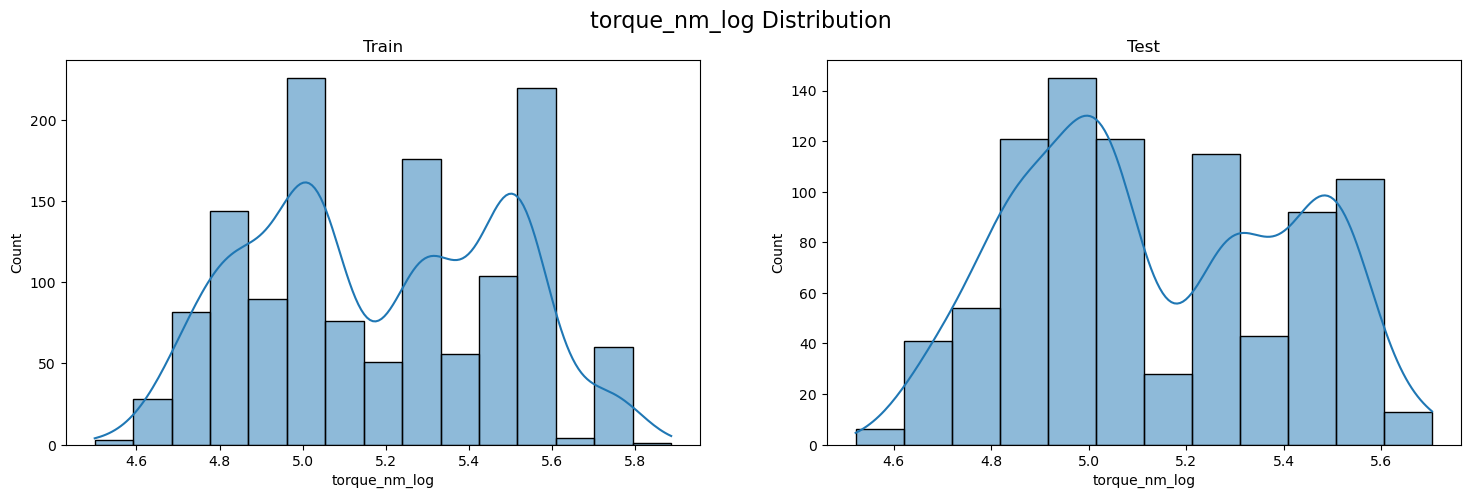

In [59]:
train['torque_nm_log'] = np.log(train['torque_nm'])
test['torque_nm_log'] = np.log(test['torque_nm'])

plt.figure(figsize=[18,5])

plt.suptitle('torque_nm_log Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['torque_nm_log'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['torque_nm_log'], kde=True)
plt.title('Test');

# -------------------------------------------------------------------------------------------

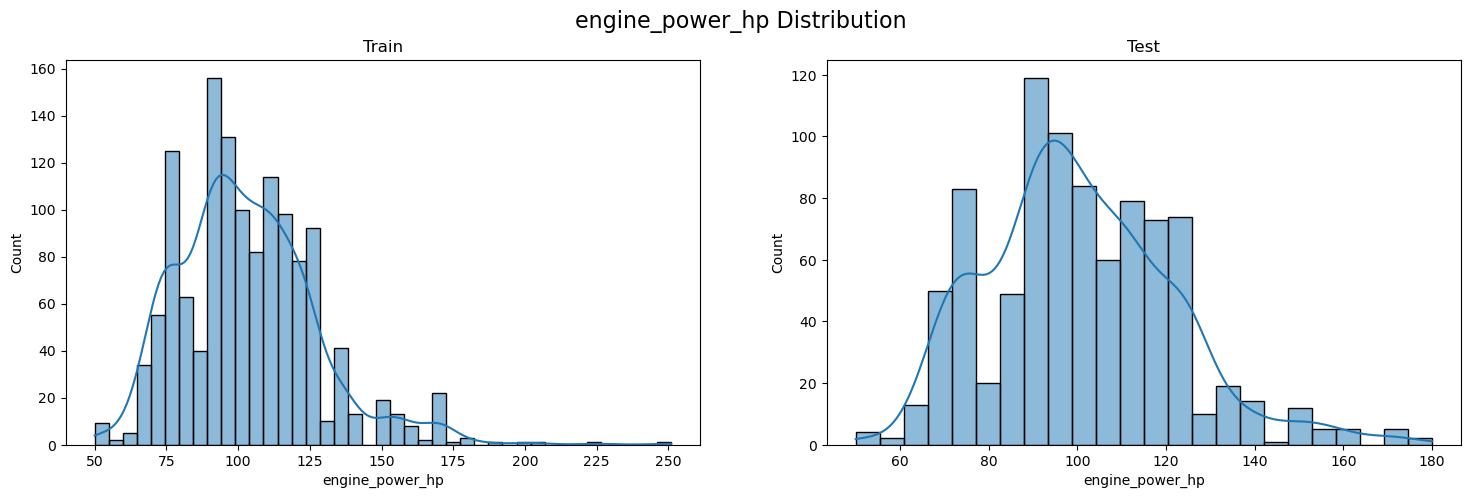

In [60]:
plt.figure(figsize=[18,5])

plt.suptitle('engine_power_hp Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['engine_power_hp'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['engine_power_hp'], kde=True)
plt.title('Test');

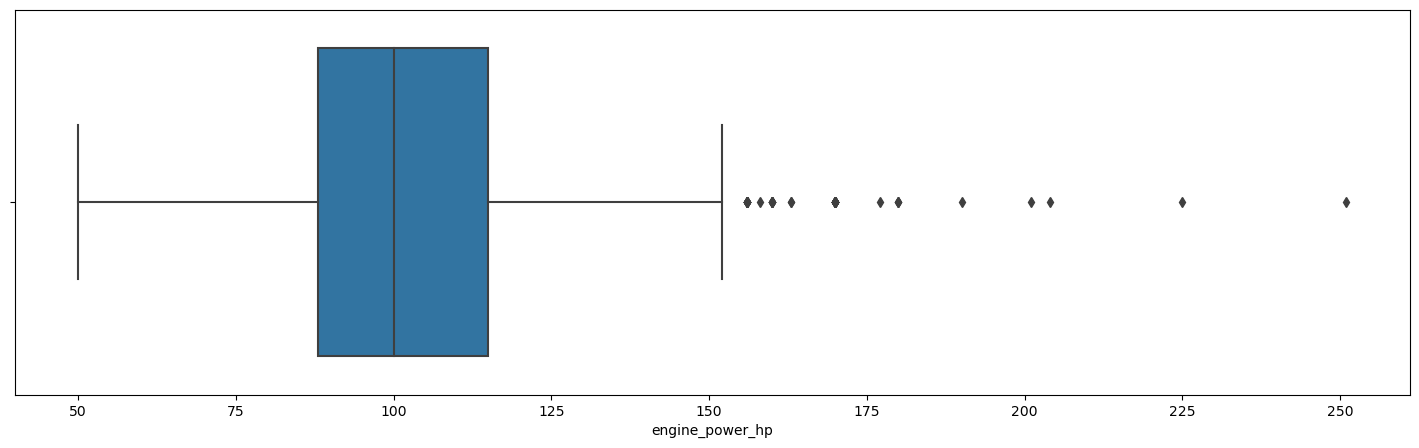

In [61]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['engine_power_hp'], data=train);

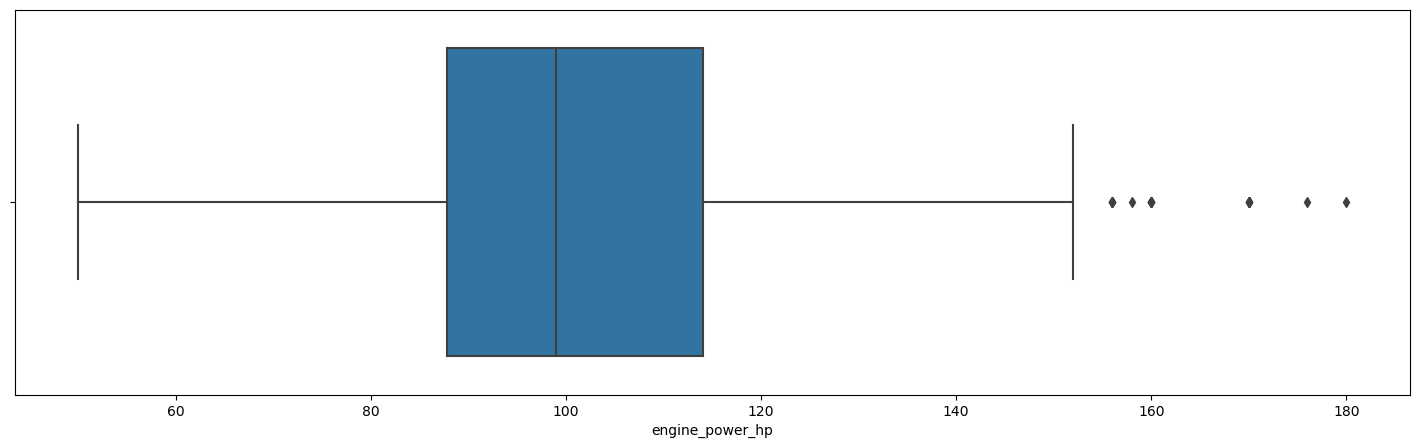

In [62]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['engine_power_hp'], data=test);

**Extracting whiskers in this column will result in the loss of some unique values.**

# -------------------------------------------------------------------------------------------

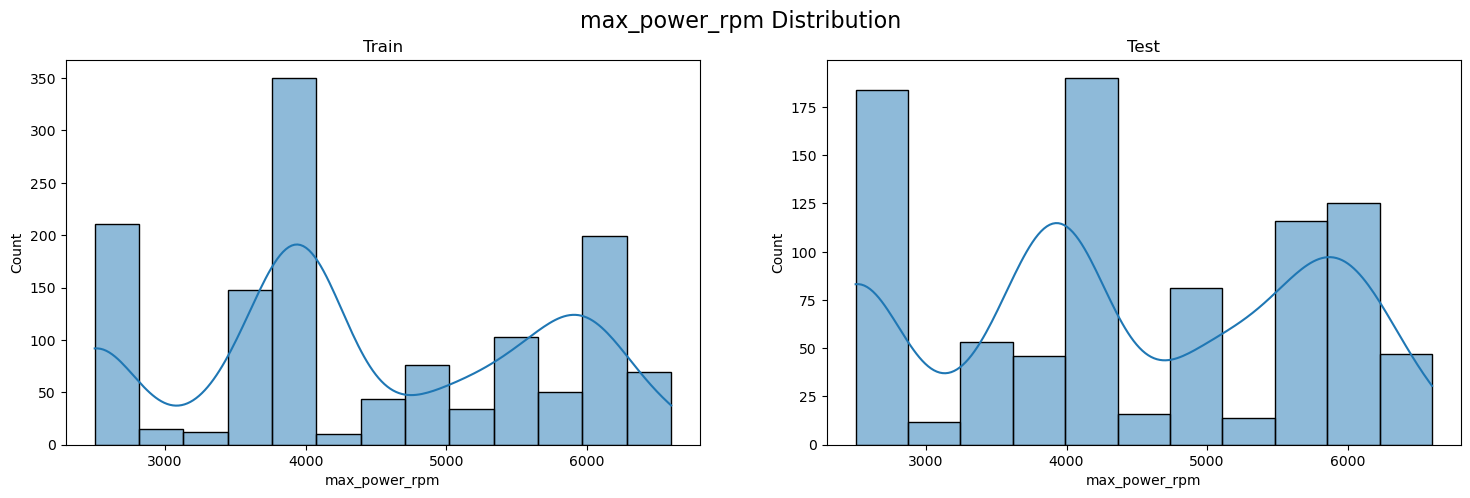

In [63]:
plt.figure(figsize=[18,5])

plt.suptitle('max_power_rpm Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['max_power_rpm'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['max_power_rpm'], kde=True)
plt.title('Test');

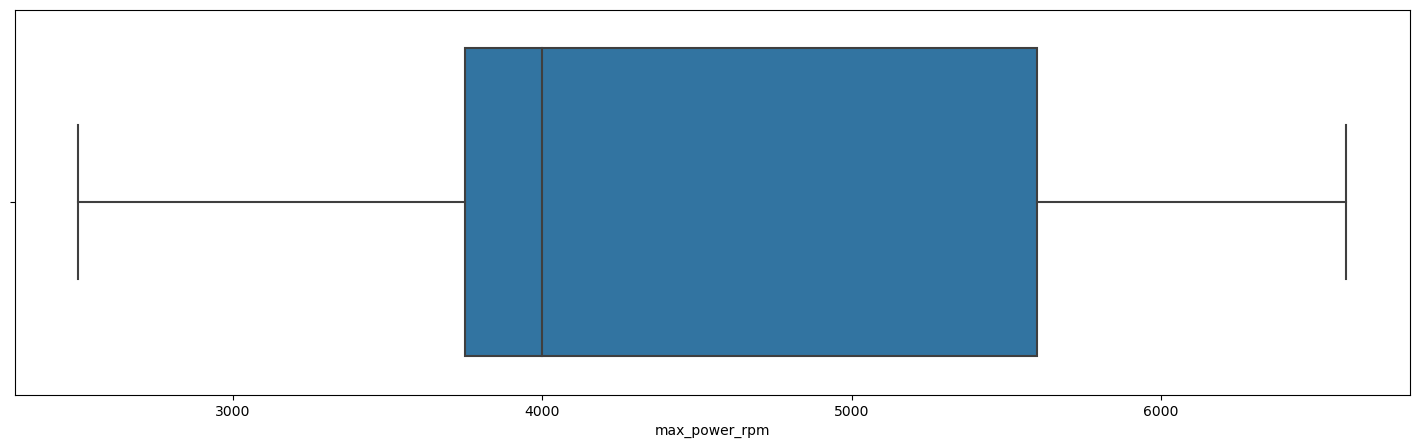

In [64]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['max_power_rpm'], data=train);

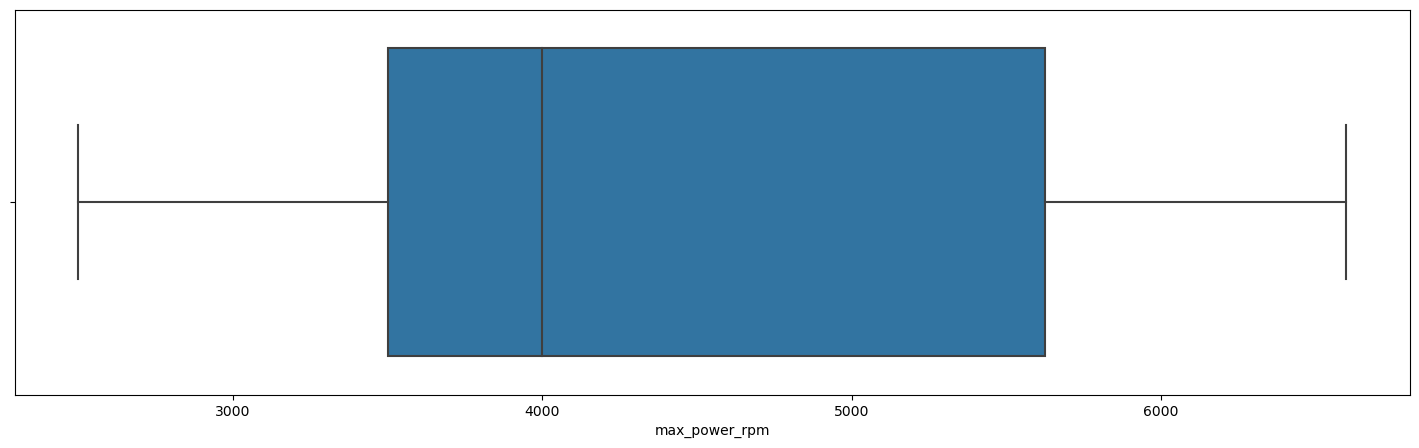

In [65]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['max_power_rpm'], data=test);

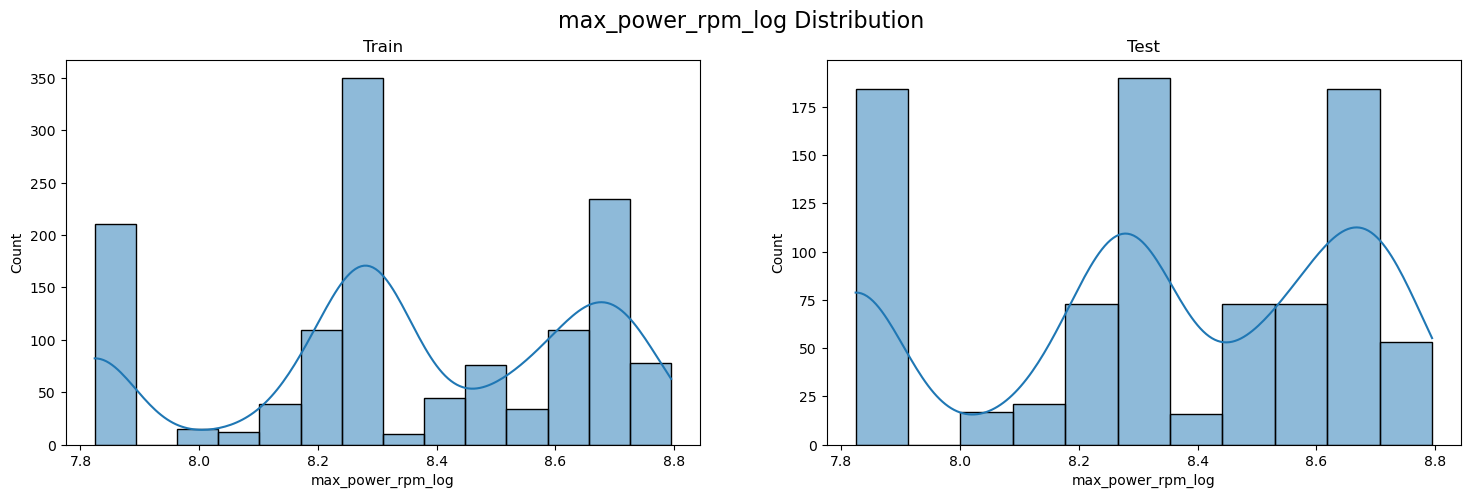

In [66]:
train['max_power_rpm_log'] = np.log(train['max_power_rpm'])
test['max_power_rpm_log'] = np.log(test['max_power_rpm'])

plt.figure(figsize=[18,5])

plt.suptitle('max_power_rpm_log Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['max_power_rpm_log'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['max_power_rpm_log'], kde=True)
plt.title('Test');

# -------------------------------------------------------------------------------------------

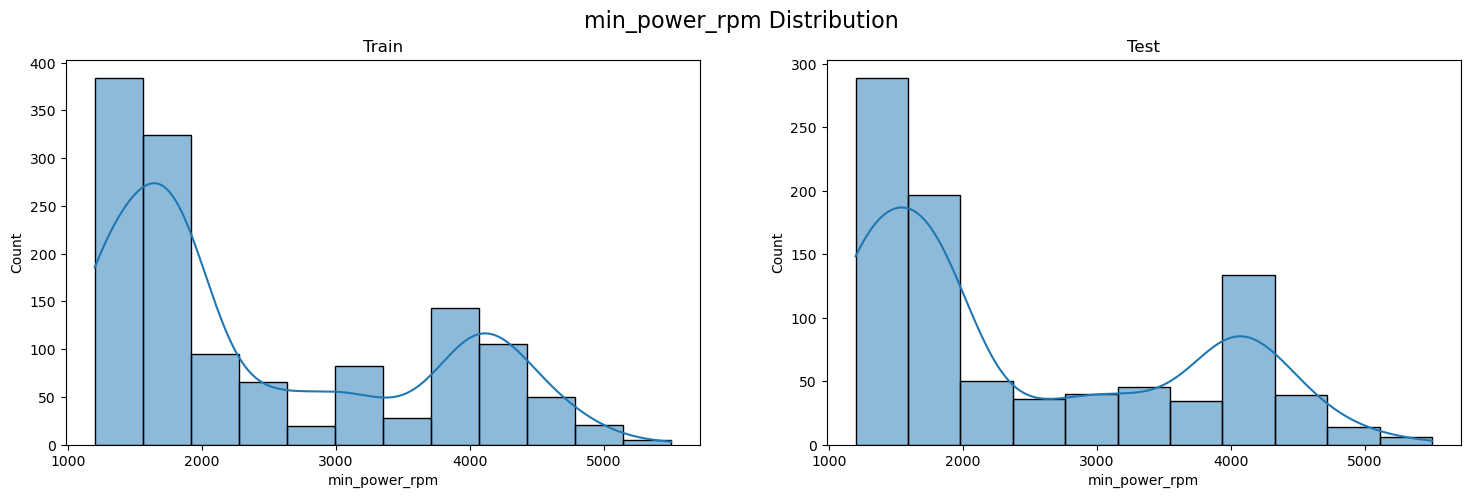

In [67]:
plt.figure(figsize=[18,5])

plt.suptitle('min_power_rpm Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['min_power_rpm'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['min_power_rpm'], kde=True)
plt.title('Test');

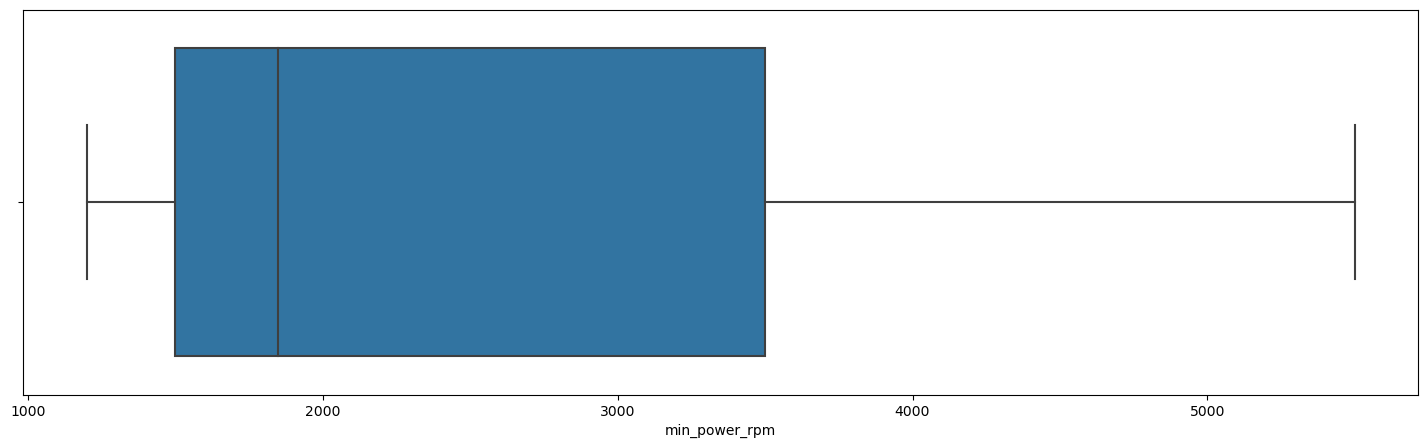

In [68]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['min_power_rpm'], data=train);

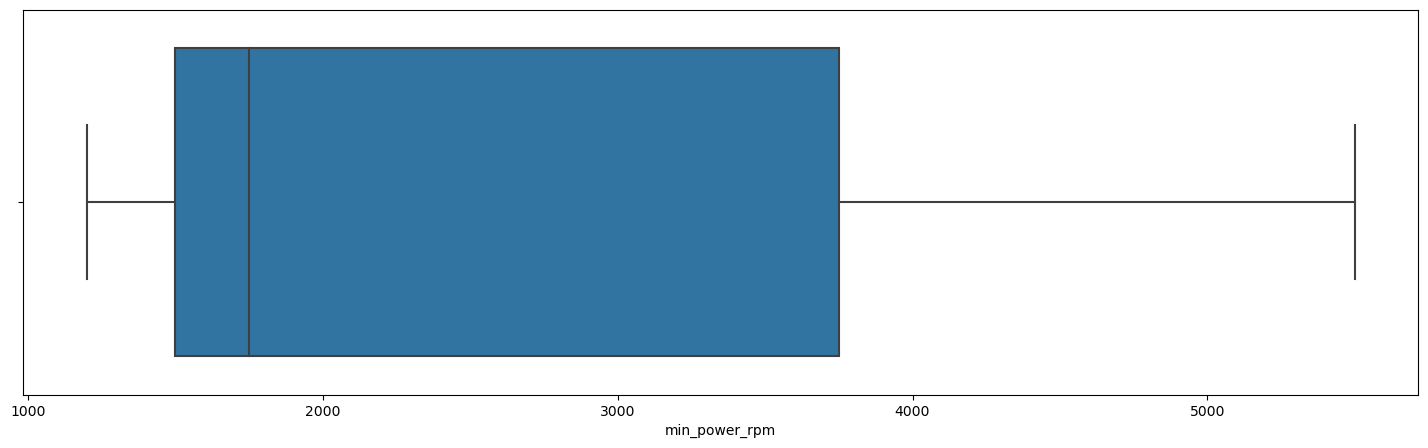

In [69]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['min_power_rpm'], data=test);

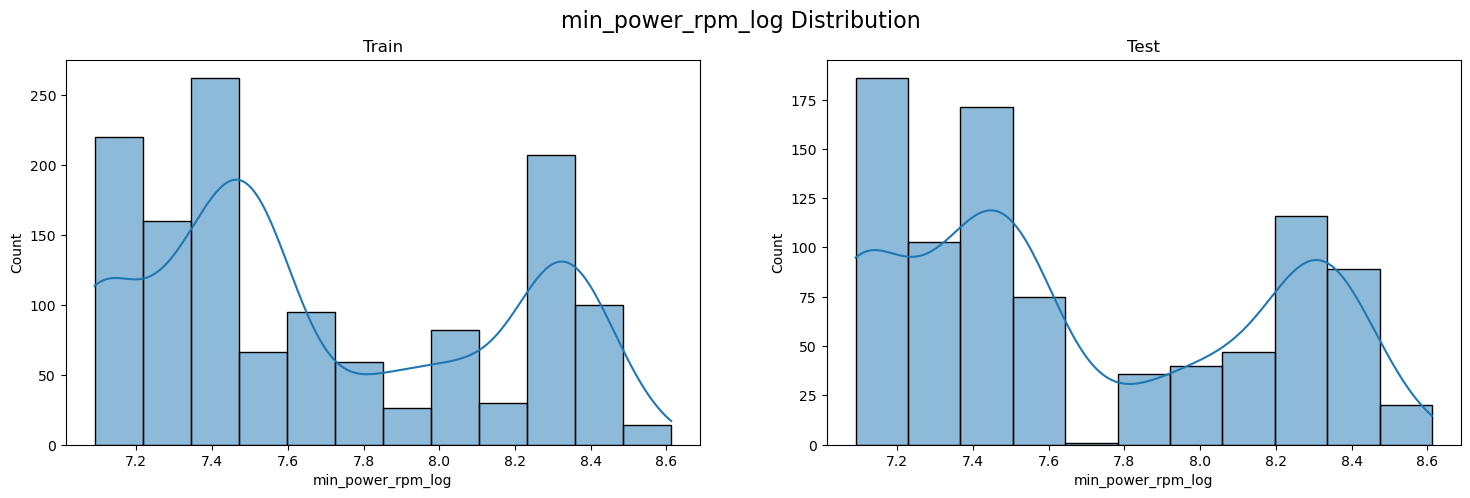

In [70]:
train['min_power_rpm_log'] = np.log(train['min_power_rpm'])
test['min_power_rpm_log'] = np.log(test['min_power_rpm'])

plt.figure(figsize=[18,5])

plt.suptitle('min_power_rpm_log Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['min_power_rpm_log'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['min_power_rpm_log'], kde=True)
plt.title('Test');

# -------------------------------------------------------------------------------------------

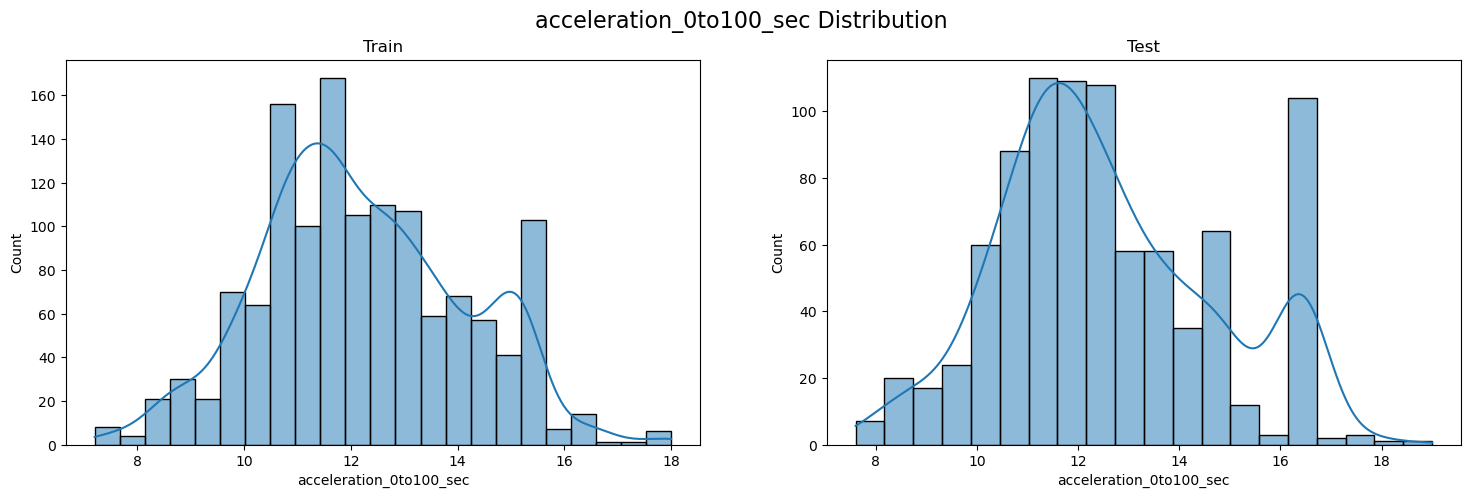

In [71]:
plt.figure(figsize=[18,5])

plt.suptitle('acceleration_0to100_sec Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['acceleration_0to100_sec'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['acceleration_0to100_sec'], kde=True)
plt.title('Test');

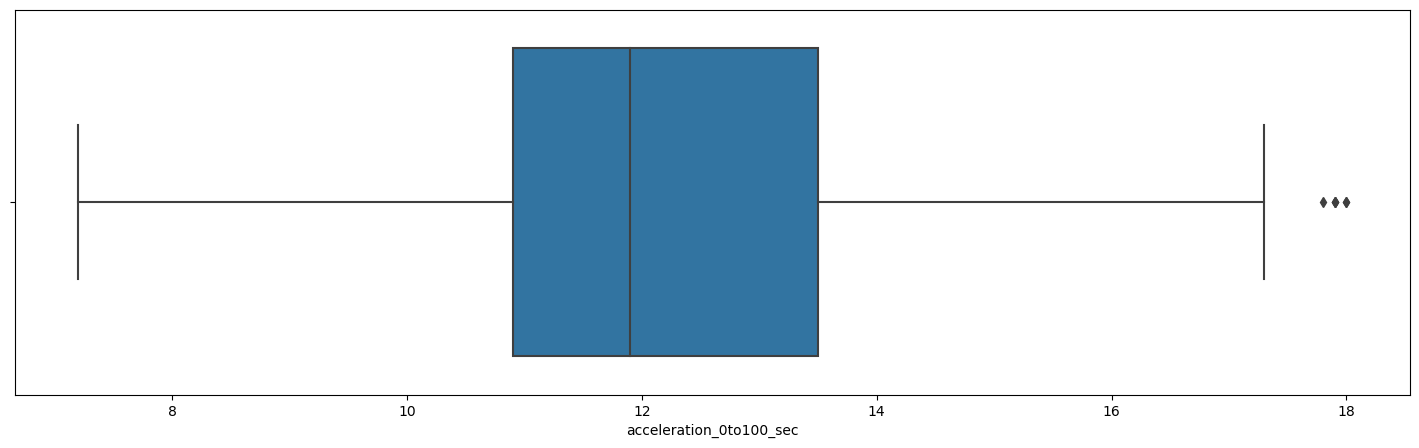

In [72]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['acceleration_0to100_sec'], data=train);

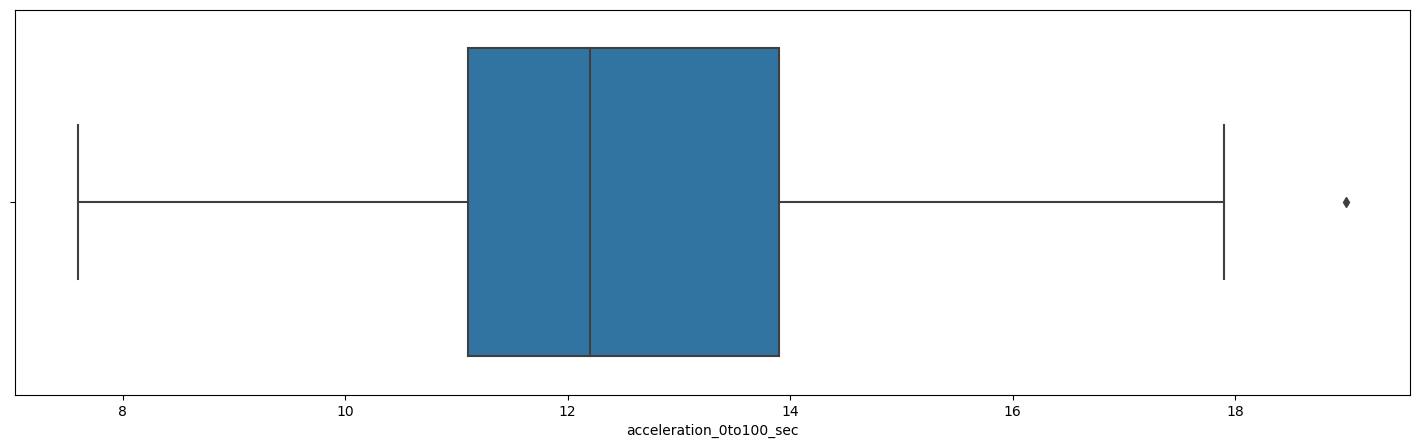

In [73]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['acceleration_0to100_sec'], data=test);

In [74]:
extract_whiskers(train['acceleration_0to100_sec'])

Upper Whisker: 17.3
Lower Whisker: 7.2


In [75]:
train = train.loc[train['acceleration_0to100_sec'] < 17.3]
train = train.loc[train['acceleration_0to100_sec'] > 8.1]
train

price_try             make                 series  year      km  \
0        364950          Peugeot          Other Peugeot    20  149000   
2        635000             Ford                  Focus    11  210000   
3       1760000  Mercedes - Benz  Other Mercedes - Benz     3   38000   
4        850000          Renault                 Megane     2   30000   
5        715000             Ford                  Focus     6  120000   
...         ...              ...                    ...   ...     ...   
1493     715000          Renault                   Clio     6  260000   
1494     635000             Seat             Other Seat    11  137000   
1495     275000             Fiat             Other Fiat    24  256000   
1497     610000             Ford                  Focus    17  200000   
1498     629000       Volkswagen                   Polo     8  162000   

       transmission            fuel  body_type     warranty   from_  ...  \
0            Manual  LPG & Gasoline  Hatchback  Warrantless  Dealer  ...   
2            Manual          Diesel      Sedan  Warrantless  Dealer  ...   
3     Semiautomatic        Gasoline      Sedan  Warrantless   Owner  ...   
4            Manual        Gasoline      Sedan  Warrantless   Owner  ...   
5            Manual          Diesel      Sedan  Warrantless   Owner  ...   
...             ...             ...        ...          ...     ...  ...   
1493  Semiautomatic          Diesel  Hatchback  Warrantless  Dealer  ...   
1494         Manual        Gasoline  Hatchback  Warrantless   Owner  ...   
1495         Manual  LPG & Gasoline  Hatchback  Warrantless   Owner  ...   
1497         Manual  LPG & Gasoline      Sedan  Warrantless   Owner  ...   
1498         Manual          Diesel  Hatchback  Warrantless   Owner  ...   

     max_power_rpm  min_power_rpm  acceleration_0to100_sec  max_speed_kmh  \
0             2500           1200                     11.6            190   
2             3600           2000                     12.5            180   
3             5500           1460                      9.3            216   
4             5500           2000                     10.3            200   
5             3600           1500                     12.6            182   
...            ...            ...                      ...            ...   
1493          4000           1750                     12.9            176   
1494          5000           3800                     11.8            177   
1495          5750           4000                     10.3            186   
1497          6000           4150                     10.8            190   
1498          3750           1500                     12.9            173   

      average_fuel_consumption_lt     painted_changed  engine_capacity_cc_log  \
0                             7.2            Original                7.369601   
2                             4.2            Original                7.352441   
3                             5.3            Original                7.194437   
4                             5.4            Original                7.088409   
5                             4.5            Original                7.352441   
...                           ...                 ...                     ...   
1493                          3.7            Original                7.286876   
1494                          5.9  Painted or Changed                7.237059   
1495                          8.3  Painted or Changed                7.365813   
1497                          6.4            Original                7.375256   
1498                          3.6  Painted or Changed                7.259820   

      torque_nm_log  max_power_rpm_log  min_power_rpm_log  
0          4.990433           7.824046           7.090077  
2          5.438079           8.188689           7.600902  
3          5.298317           8.612503           7.286192  
4          5.323010           8.612503           7.600902  
5          5.43807

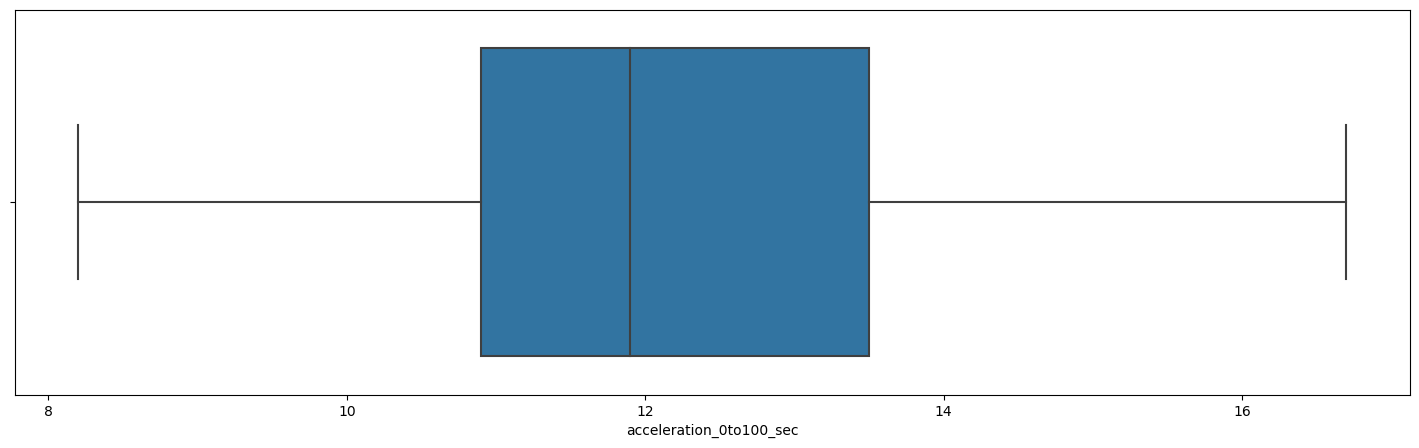

In [76]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['acceleration_0to100_sec'], data=train);

In [77]:
extract_whiskers(test['acceleration_0to100_sec'])

Upper Whisker: 17.9
Lower Whisker: 7.6


In [78]:
test = test.loc[test['acceleration_0to100_sec'] < 17.9]
test = test.loc[test['acceleration_0to100_sec'] > 8.0]
test

make         series  year      km   transmission            fuel  \
0       Ford          Focus    14  281000      Automatic  LPG & Gasoline   
1    Renault           Clio     6  162000  Semiautomatic          Diesel   
2       Opel          Corsa    20  205000  Semiautomatic  LPG & Gasoline   
3       Ford          Focus     9  209000         Manual  LPG & Gasoline   
4      Other    Other Other    30  217000         Manual  LPG & Gasoline   
..       ...            ...   ...     ...            ...             ...   
993    Other    Other Other    23  294500         Manual  LPG & Gasoline   
994     Opel          Astra    18  228000         Manual  LPG & Gasoline   
995  Renault  Other Renault    26  370000         Manual  LPG & Gasoline   
997  Renault         Symbol    12   60000         Manual        Gasoline   
998     Fiat           Egea     4   35000         Manual        Gasoline   

     body_type     warranty   from_        wheel_drive  ...  max_power_rpm  \
0        Sedan  Warrantless   Owner  Front-Wheel Drive  ...           6000   
1    Hatchback  Warrantless   Owner  Front-Wheel Drive  ...           4000   
2    Hatchback  Warrantless  Dealer  Front-Wheel Drive  ...           2500   
3        Sedan  Warrantless   Owner  Front-Wheel Drive  ...           6300   
4    Hatchback  Warrantless   Owner  Front-Wheel Drive  ...           2500   
..         ...          ...     ...                ...  ...            ...   
993  Hatchback  Warrantless   Owner  Front-Wheel Drive  ...           2500   
994  Hatchback  Warrantless   Owner  Front-Wheel Drive  ...           6000   
995  Hatchback  Warrantless   Owner  Front-Wheel Drive  ...           5250   
997      Sedan  Warrantless   Owner  Front-Wheel Drive  ...           5500   
998      Sedan  Warrantless   Owner  Front-Wheel Drive  ...           6000   

     min_power_rpm  acceleration_0to100_sec  max_speed_kmh  \
0             4000                     14.2            182   
1             1750                     12.9            176   
2             1200                     14.0            170   
3             4000                     10.9            198   
4             1200                     16.4            150   
..             ...                      ...            ...   
993           1200                     16.4            150   
994           3900                     12.3            185   
995           2500                     14.8            187   
997           4250                     12.5            170   
998           4500                     11.5            185   

     average_fuel_consumption_lt     painted_changed  engine_capacity_cc_log  \
0                            6.7            Original                7.375256   
1                            3.7  Painted or Changed                7.286876   
2                            6.2  Painted or Changed                7.089243   
3                            6.0            Original                7.375256   
4                            5.5            Original                7.170120   
..                           ...                 ...                     ...   
993                          5.5  Painted or Changed                7.244942   
994                          6.6  Painted or Changed                7.376508   
995                          6.2            Original                7.376508   
997                          7.1            Original                7.237059   
998                          5.7  Painted or Changed                7.221105   

     torque_nm_log  max_power_rpm_log min_power_rpm_log  
0         5.010635           8.699515          8.294050  
1         5.393628           8.294050          7.467371  
2         4.700480           7.824046          7.090077  
3         5.062595           8.748305          8.294050  
4         4.867534           7.824046          7.090077  
..             ...                ...               ...  
993       4.941642           7.824046         

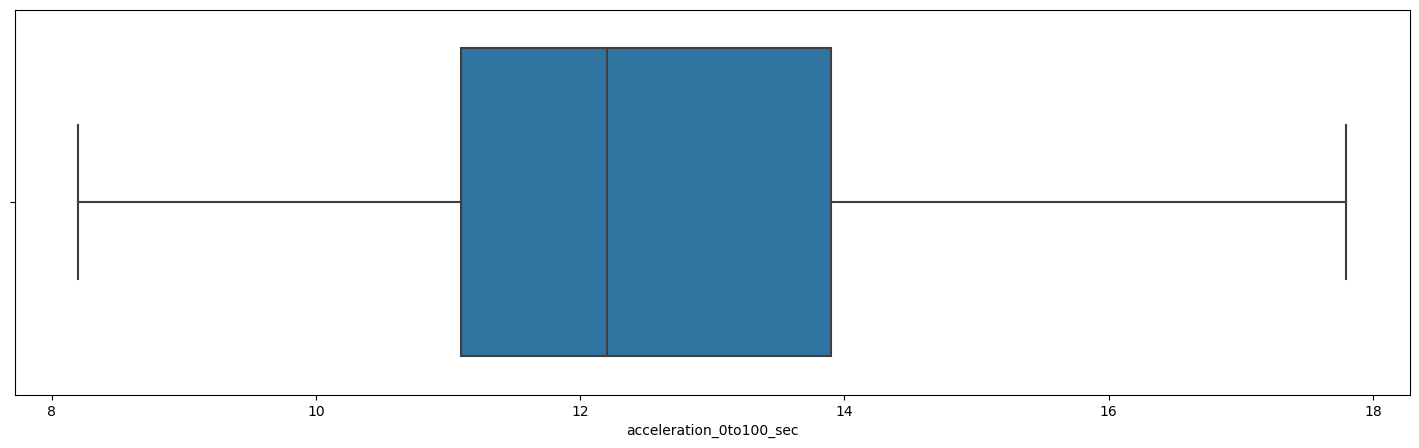

In [79]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['acceleration_0to100_sec'], data=test);

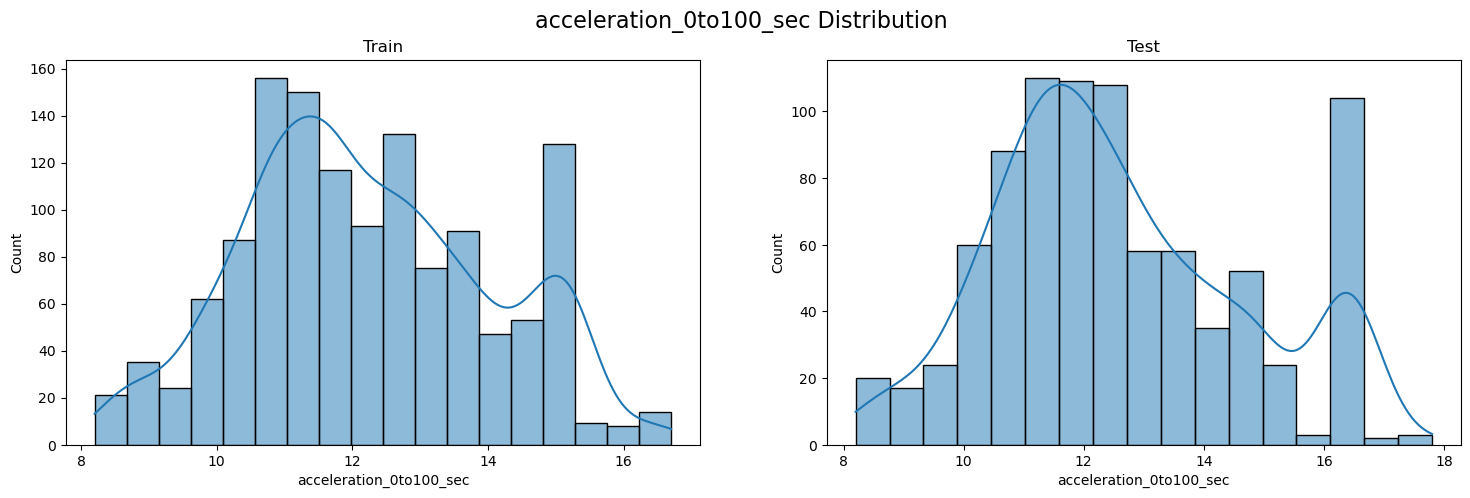

In [80]:
plt.figure(figsize=[18,5])

plt.suptitle('acceleration_0to100_sec Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['acceleration_0to100_sec'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['acceleration_0to100_sec'], kde=True)
plt.title('Test');

# -------------------------------------------------------------------------------------------

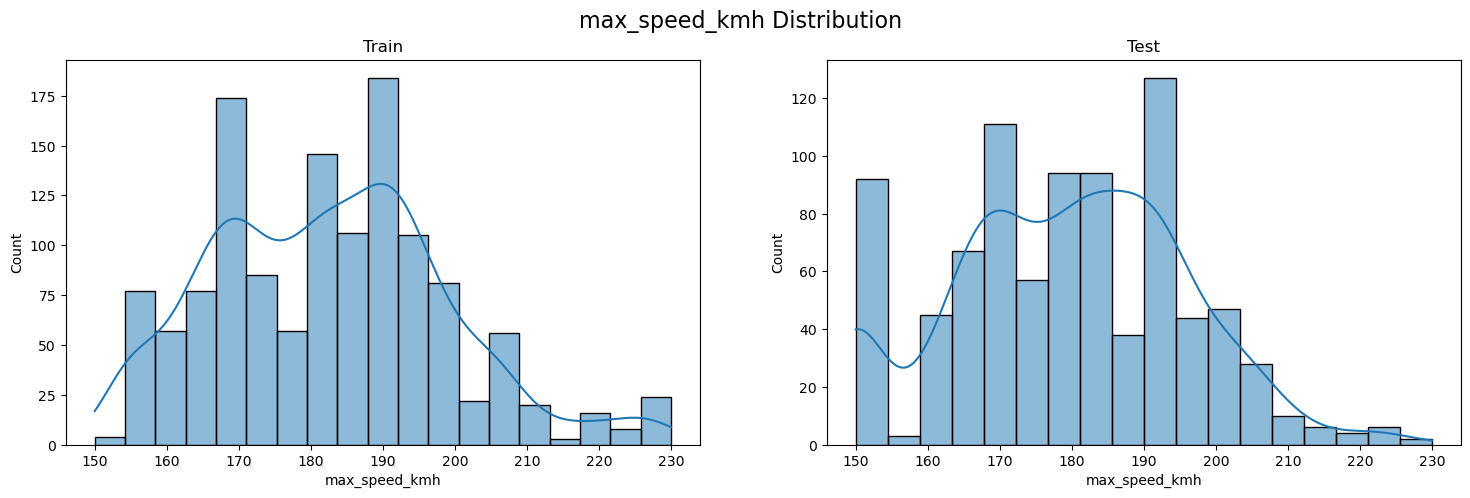

In [81]:
plt.figure(figsize=[18,5])

plt.suptitle('max_speed_kmh Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['max_speed_kmh'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['max_speed_kmh'], kde=True)
plt.title('Test');

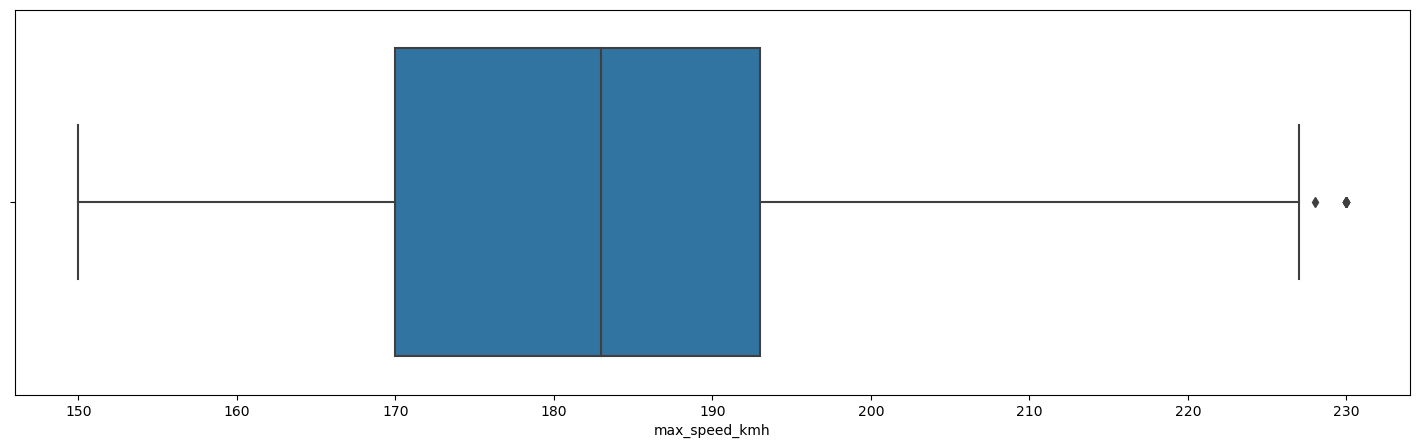

In [82]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['max_speed_kmh'], data=train);

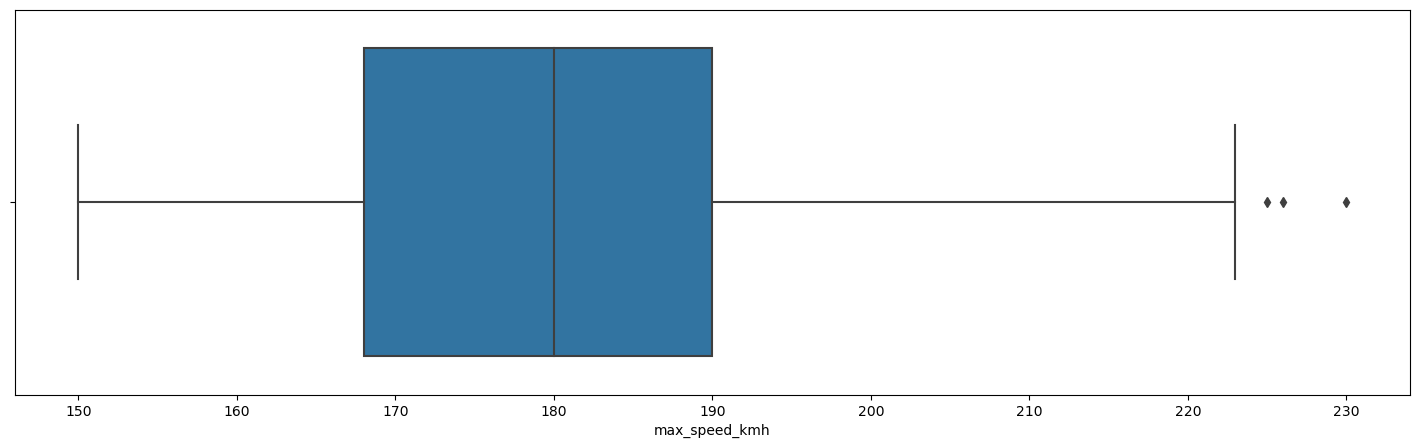

In [83]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['max_speed_kmh'], data=test);

# -------------------------------------------------------------------------------------------

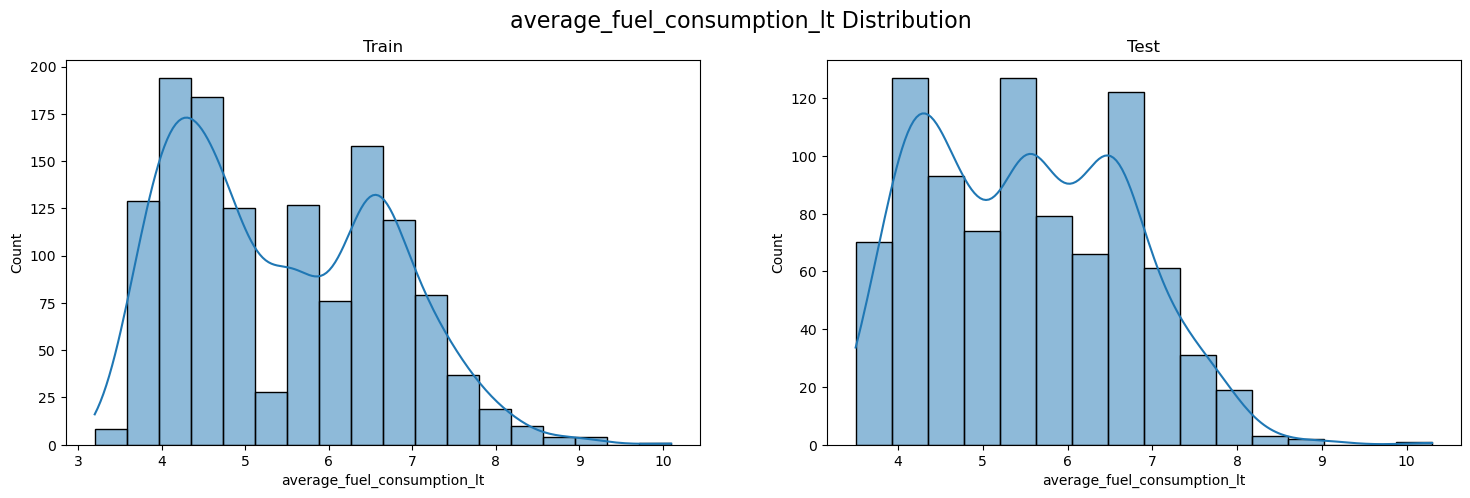

In [84]:
plt.figure(figsize=[18,5])

plt.suptitle('average_fuel_consumption_lt Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['average_fuel_consumption_lt'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['average_fuel_consumption_lt'], kde=True)
plt.title('Test');

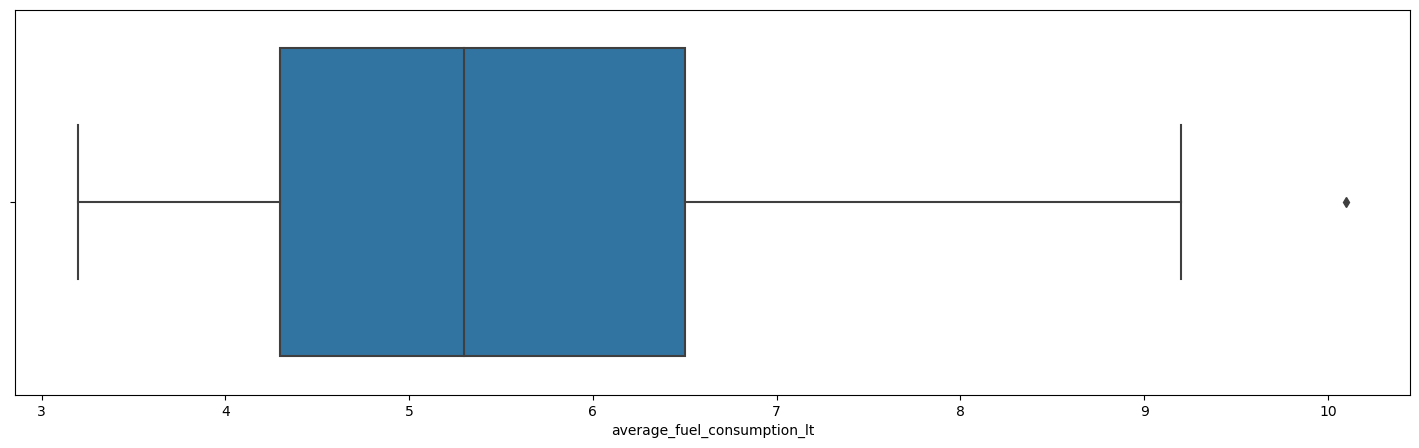

In [85]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['average_fuel_consumption_lt'], data=train);

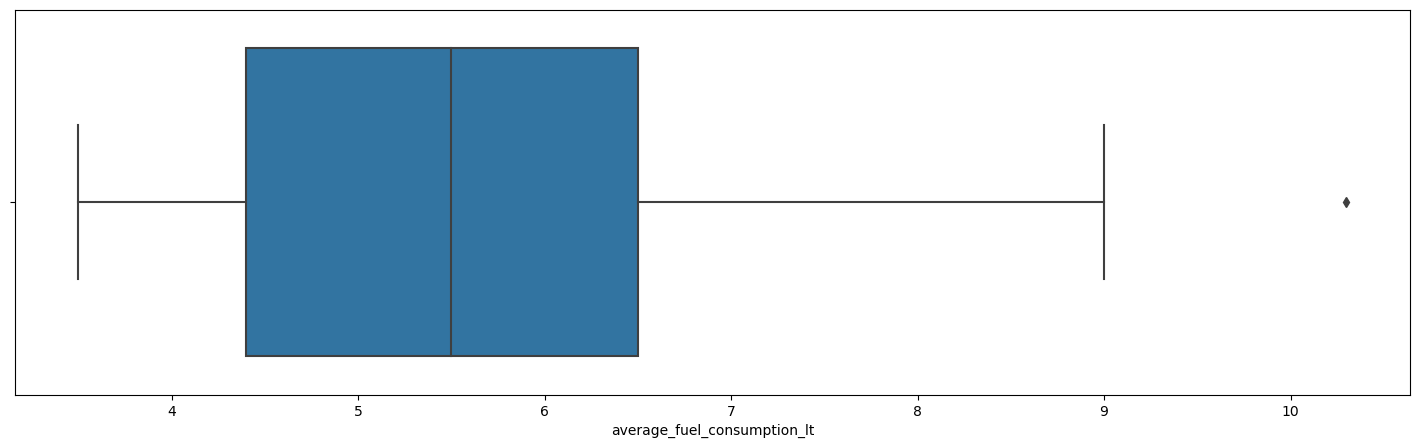

In [86]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['average_fuel_consumption_lt'], data=test);

In [87]:
extract_whiskers(train['average_fuel_consumption_lt'])

Upper Whisker: 9.2
Lower Whisker: 3.2


In [88]:
train = train.loc[train['average_fuel_consumption_lt'] < 9.2]
train = train.loc[train['average_fuel_consumption_lt'] > 3.2]
train

price_try             make                 series  year      km  \
0        364950          Peugeot          Other Peugeot    20  149000   
2        635000             Ford                  Focus    11  210000   
3       1760000  Mercedes - Benz  Other Mercedes - Benz     3   38000   
4        850000          Renault                 Megane     2   30000   
5        715000             Ford                  Focus     6  120000   
...         ...              ...                    ...   ...     ...   
1493     715000          Renault                   Clio     6  260000   
1494     635000             Seat             Other Seat    11  137000   
1495     275000             Fiat             Other Fiat    24  256000   
1497     610000             Ford                  Focus    17  200000   
1498     629000       Volkswagen                   Polo     8  162000   

       transmission            fuel  body_type     warranty   from_  ...  \
0            Manual  LPG & Gasoline  Hatchback  Warrantless  Dealer  ...   
2            Manual          Diesel      Sedan  Warrantless  Dealer  ...   
3     Semiautomatic        Gasoline      Sedan  Warrantless   Owner  ...   
4            Manual        Gasoline      Sedan  Warrantless   Owner  ...   
5            Manual          Diesel      Sedan  Warrantless   Owner  ...   
...             ...             ...        ...          ...     ...  ...   
1493  Semiautomatic          Diesel  Hatchback  Warrantless  Dealer  ...   
1494         Manual        Gasoline  Hatchback  Warrantless   Owner  ...   
1495         Manual  LPG & Gasoline  Hatchback  Warrantless   Owner  ...   
1497         Manual  LPG & Gasoline      Sedan  Warrantless   Owner  ...   
1498         Manual          Diesel  Hatchback  Warrantless   Owner  ...   

     max_power_rpm  min_power_rpm  acceleration_0to100_sec  max_speed_kmh  \
0             2500           1200                     11.6            190   
2             3600           2000                     12.5            180   
3             5500           1460                      9.3            216   
4             5500           2000                     10.3            200   
5             3600           1500                     12.6            182   
...            ...            ...                      ...            ...   
1493          4000           1750                     12.9            176   
1494          5000           3800                     11.8            177   
1495          5750           4000                     10.3            186   
1497          6000           4150                     10.8            190   
1498          3750           1500                     12.9            173   

      average_fuel_consumption_lt     painted_changed  engine_capacity_cc_log  \
0                             7.2            Original                7.369601   
2                             4.2            Original                7.352441   
3                             5.3            Original                7.194437   
4                             5.4            Original                7.088409   
5                             4.5            Original                7.352441   
...                           ...                 ...                     ...   
1493                          3.7            Original                7.286876   
1494                          5.9  Painted or Changed                7.237059   
1495                          8.3  Painted or Changed                7.365813   
1497                          6.4            Original                7.375256   
1498                          3.6  Painted or Changed                7.259820   

      torque_nm_log  max_power_rpm_log  min_power_rpm_log  
0          4.990433           7.824046           7.090077  
2          5.438079           8.188689           7.600902  
3          5.298317           8.612503           7.286192  
4          5.323010           8.612503           7.600902  
5          5.43807

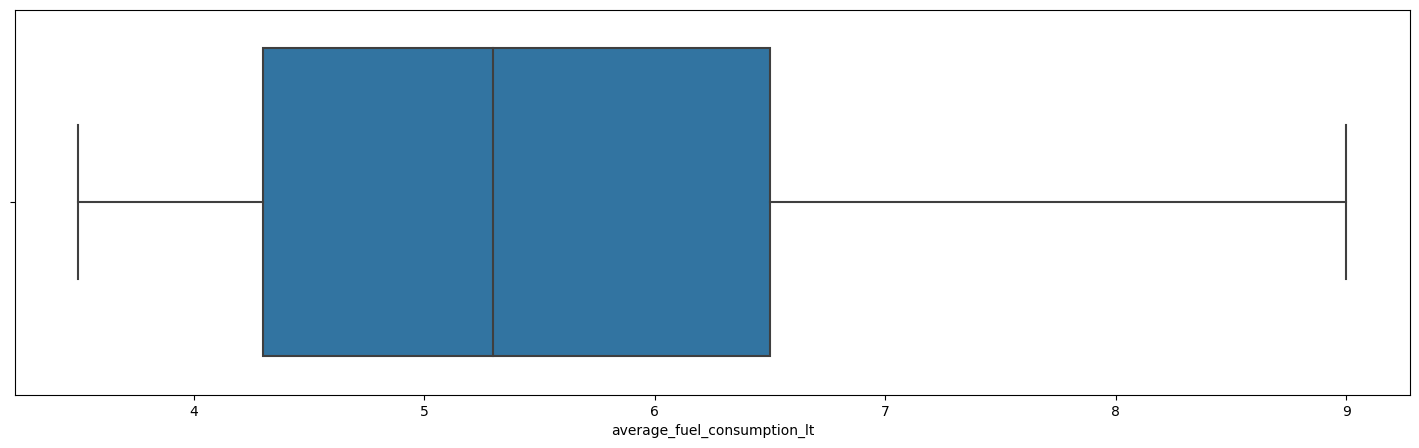

In [89]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['average_fuel_consumption_lt'], data=train);

In [90]:
extract_whiskers(test['average_fuel_consumption_lt'])

Upper Whisker: 9.0
Lower Whisker: 3.5


In [91]:
test = test.loc[test['average_fuel_consumption_lt'] < 9.0]
test = test.loc[test['average_fuel_consumption_lt'] > 3.5]
test

make         series  year      km   transmission            fuel  \
0       Ford          Focus    14  281000      Automatic  LPG & Gasoline   
1    Renault           Clio     6  162000  Semiautomatic          Diesel   
2       Opel          Corsa    20  205000  Semiautomatic  LPG & Gasoline   
3       Ford          Focus     9  209000         Manual  LPG & Gasoline   
4      Other    Other Other    30  217000         Manual  LPG & Gasoline   
..       ...            ...   ...     ...            ...             ...   
993    Other    Other Other    23  294500         Manual  LPG & Gasoline   
994     Opel          Astra    18  228000         Manual  LPG & Gasoline   
995  Renault  Other Renault    26  370000         Manual  LPG & Gasoline   
997  Renault         Symbol    12   60000         Manual        Gasoline   
998     Fiat           Egea     4   35000         Manual        Gasoline   

     body_type     warranty   from_        wheel_drive  ...  max_power_rpm  \
0        Sedan  Warrantless   Owner  Front-Wheel Drive  ...           6000   
1    Hatchback  Warrantless   Owner  Front-Wheel Drive  ...           4000   
2    Hatchback  Warrantless  Dealer  Front-Wheel Drive  ...           2500   
3        Sedan  Warrantless   Owner  Front-Wheel Drive  ...           6300   
4    Hatchback  Warrantless   Owner  Front-Wheel Drive  ...           2500   
..         ...          ...     ...                ...  ...            ...   
993  Hatchback  Warrantless   Owner  Front-Wheel Drive  ...           2500   
994  Hatchback  Warrantless   Owner  Front-Wheel Drive  ...           6000   
995  Hatchback  Warrantless   Owner  Front-Wheel Drive  ...           5250   
997      Sedan  Warrantless   Owner  Front-Wheel Drive  ...           5500   
998      Sedan  Warrantless   Owner  Front-Wheel Drive  ...           6000   

     min_power_rpm  acceleration_0to100_sec  max_speed_kmh  \
0             4000                     14.2            182   
1             1750                     12.9            176   
2             1200                     14.0            170   
3             4000                     10.9            198   
4             1200                     16.4            150   
..             ...                      ...            ...   
993           1200                     16.4            150   
994           3900                     12.3            185   
995           2500                     14.8            187   
997           4250                     12.5            170   
998           4500                     11.5            185   

     average_fuel_consumption_lt     painted_changed  engine_capacity_cc_log  \
0                            6.7            Original                7.375256   
1                            3.7  Painted or Changed                7.286876   
2                            6.2  Painted or Changed                7.089243   
3                            6.0            Original                7.375256   
4                            5.5            Original                7.170120   
..                           ...                 ...                     ...   
993                          5.5  Painted or Changed                7.244942   
994                          6.6  Painted or Changed                7.376508   
995                          6.2            Original                7.376508   
997                          7.1            Original                7.237059   
998                          5.7  Painted or Changed                7.221105   

     torque_nm_log  max_power_rpm_log min_power_rpm_log  
0         5.010635           8.699515          8.294050  
1         5.393628           8.294050          7.467371  
2         4.700480           7.824046          7.090077  
3         5.062595           8.748305          8.294050  
4         4.867534           7.824046          7.090077  
..             ...                ...               ...  
993       4.941642           7.824046         

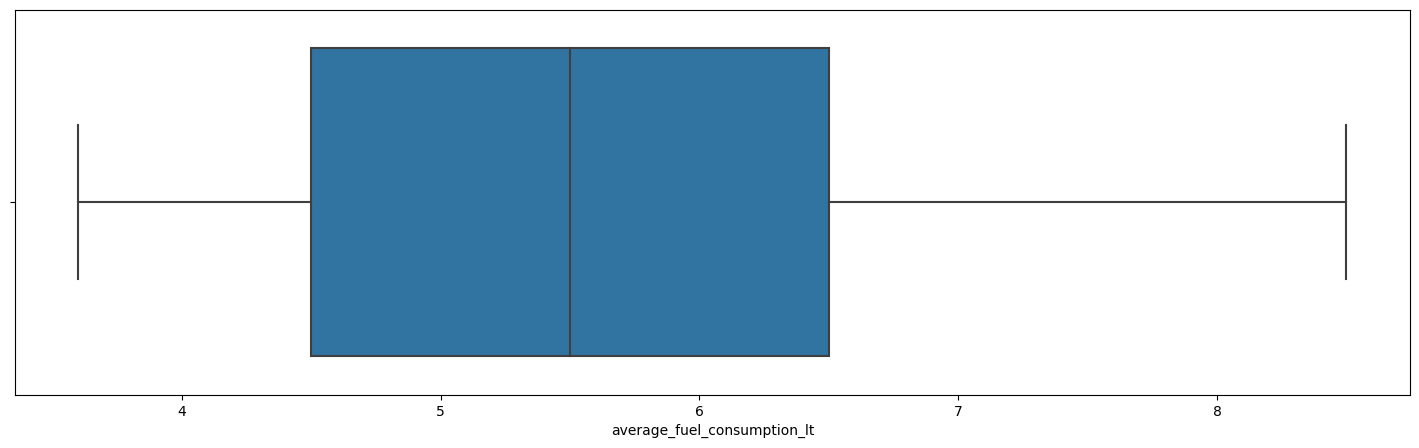

In [92]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['average_fuel_consumption_lt'], data=test);

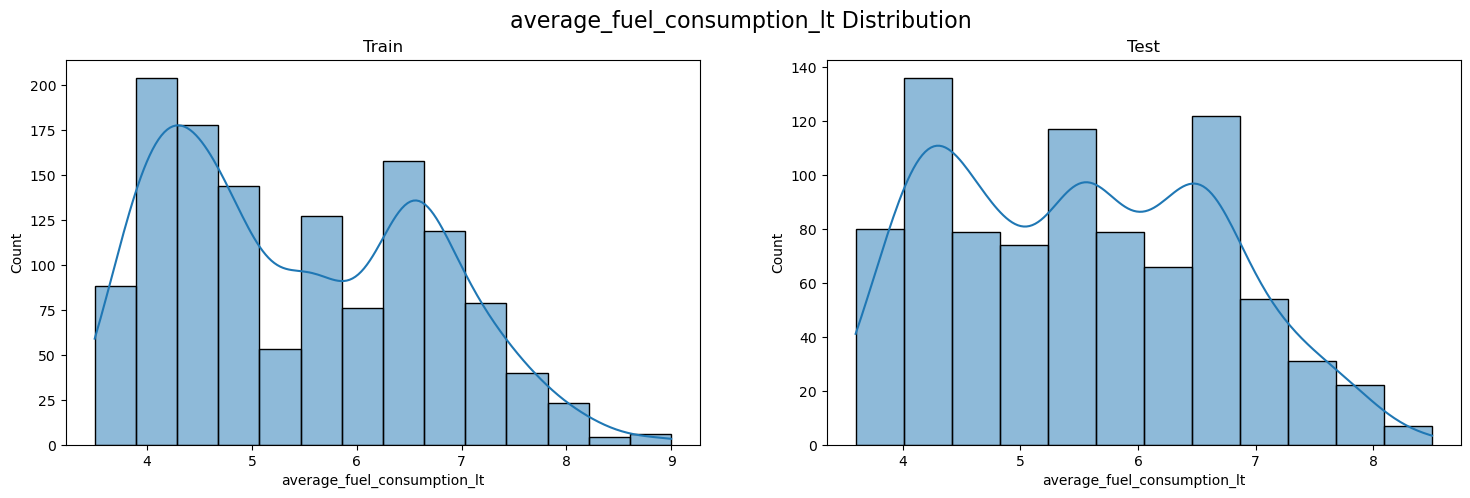

In [93]:
plt.figure(figsize=[18,5])

plt.suptitle('average_fuel_consumption_lt Distribution', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = train['average_fuel_consumption_lt'], kde=True)
plt.title('Train')

plt.subplot(1,2,2)
sns.histplot(data = test['average_fuel_consumption_lt'], kde=True)
plt.title('Test');

# -------------------------------------------------------------------------------------------

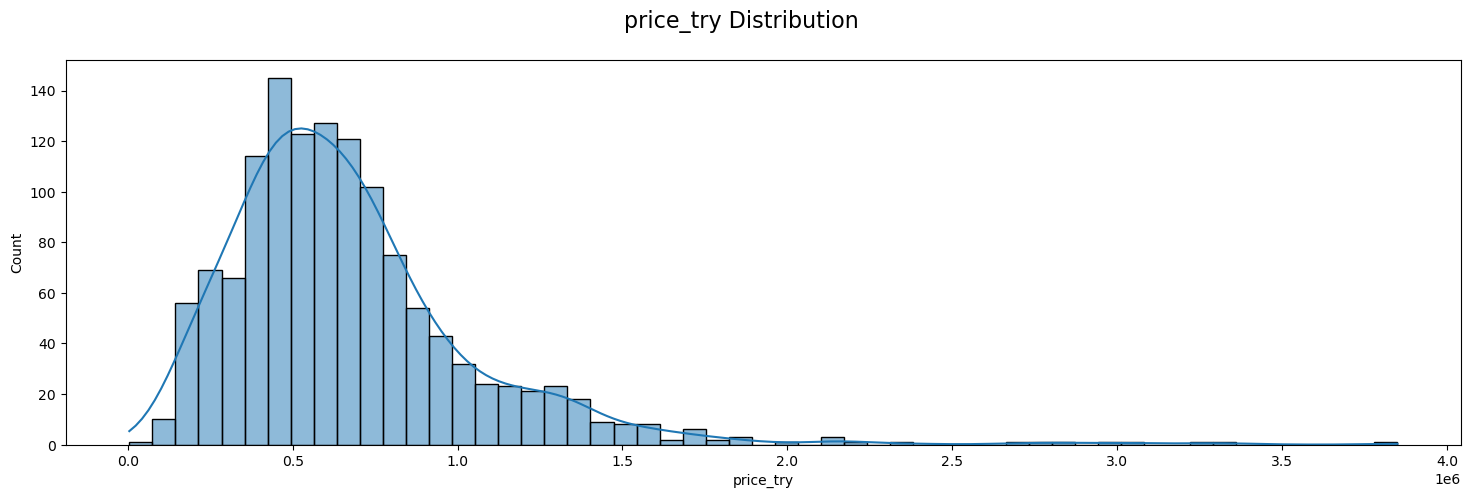

In [94]:
plt.figure(figsize=[18,5])

plt.suptitle('price_try Distribution', fontsize = 16)

sns.histplot(data = train['price_try'], kde=True);

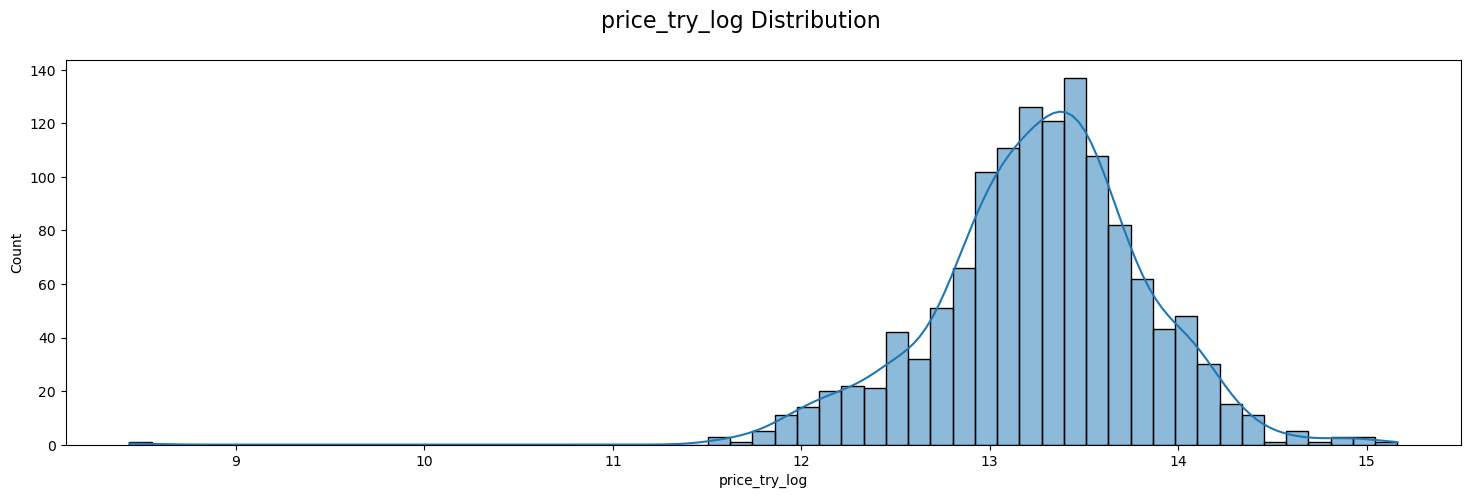

In [95]:
train['price_try_log'] = np.log(train['price_try'])

plt.figure(figsize=[18,5])

plt.suptitle('price_try_log Distribution', fontsize = 16)

sns.histplot(data = train['price_try_log'], kde=True);

In [96]:
train.drop(columns='price_try', inplace=True)

# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------

In [97]:
train.corr()

year        km  cylinder_number  torque_nm  \
year                         1.000000  0.503850         0.120803  -0.532847   
km                           0.503850  1.000000         0.108632  -0.087604   
cylinder_number              0.120803  0.108632         1.000000   0.000986   
torque_nm                   -0.532847 -0.087604         0.000986   1.000000   
engine_capacity_cc           0.080578  0.069455         0.145916   0.304632   
engine_power_hp             -0.366517 -0.197570         0.028793   0.503316   
max_power_rpm               -0.120735 -0.282962        -0.039039  -0.268077   
min_power_rpm               -0.004800 -0.161719         0.015709  -0.357474   
acceleration_0to100_sec      0.348972  0.169339         0.010676  -0.482688   
max_speed_kmh               -0.397595 -0.170664        -0.006614   0.563434   
average_fuel_consumption_lt  0.527987  0.137617         0.105460  -0.611708   
engine_capacity_cc_log       0.078927  0.068735         0.149387   0.307533   
torque_nm_log               -0.544011 -0.077723         0.004094   0.990126   
max_power_rpm_log           -0.176464 -0.292317        -0.039268  -0.180562   
min_power_rpm_log           -0.028388 -0.167511         0.014718  -0.296619   
price_try_log               -0.809469 -0.453948        -0.086904   0.566044   

                             engine_capacity_cc  engine_power_hp  \
year                                   0.080578        -0.366517   
km                                     0.069455        -0.197570   
cylinder_number                        0.145916         0.028793   
torque_nm                              0.304632         0.503316   
engine_capacity_cc                     1.000000         0.513448   
engine_power_hp                        0.513448         1.000000   
max_power_rpm                          0.039655         0.187393   
min_power_rpm                          0.105600         0.146272   
acceleration_0to100_sec               -0.375132        -0.714282   
max_speed_kmh                          0.474900         0.813992   
average_fuel_consumption_lt            0.208958         0.138642   
engine_capacity_cc_log                 0.998601         0.504746   
torque_nm_log                          0.307001         0.502530   
max_power_rpm_log                      0.021853         0.178271   
min_power_rpm_log                      0.101556         0.119149   
price_try_log                          0.177600         0.625153   

                             max_power_rpm  min_power_rpm  \
year                             -0.120735      -0.004800   
km                               -0.282962      -0.161719   
cylinder_number                  -0.039039       0.015709   
torque_nm                        -0.268077      -0.357474   
engine_capacity_cc                0.039655       0.105600   
engine_power_hp                   0.187393       0.146272   
max_power_rpm                     1.000000       0.862795   
min_power_rpm                     0.862795       1.000000   
acceleration_0to100_sec          -0.168834      -0.101281   
max_speed_kmh                     0.154483       0.099381   
average_fuel_consumption_lt       0.348656       0.462121   
engine_capacity_cc_log            0.038283       0.102846   
torque_nm_log                    -0.271630      -0.372401   
max_power_rpm_log                 0.989506       0.826214   
min_power_rpm_log                 0.886330       0.986179   
price_try_log                     0.090517       0.016404   

                             acceleration_0to100_sec  max_speed_kmh  \
year                                        0.348972      -0.397595   
km                                          0.169339      -0.170664   
cylinder_number                             0.010676      -0.006614   
torque_nm                                  -0.482688       0.563434   
engine_capacity_cc                         -0.375132       0.474900   
engine_power_hp                            -0.714282       0.813992 

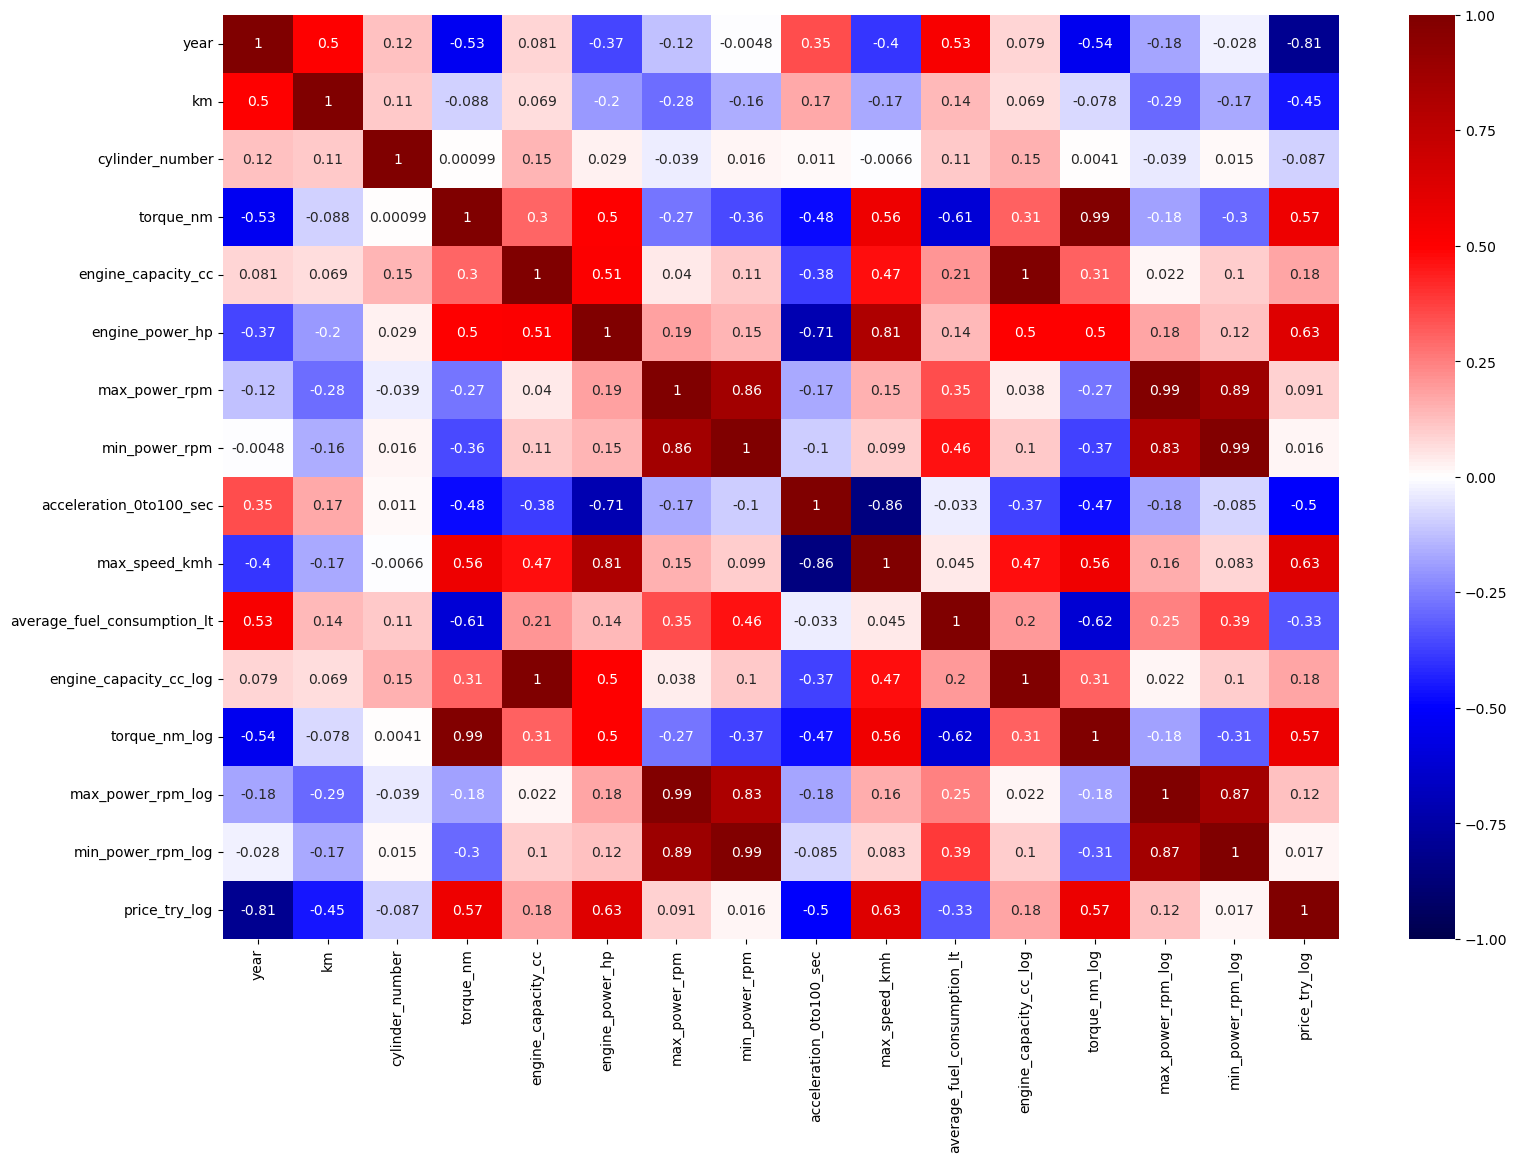

In [98]:
plt.figure(figsize=[18,12])
sns.heatmap(train.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [99]:
datasets = [train, test]
for dataset in datasets:
    dataset.drop(columns=['min_power_rpm_log', 'min_power_rpm', 'max_power_rpm_log', 'max_power_rpm', 'cylinder_number', 'engine_capacity_cc', 'engine_capacity_cc_log', 'torque_nm', 'engine_power_hp', 'acceleration_0to100_sec', 'average_fuel_consumption_lt'], inplace=True)

In [100]:
train.corr()

year        km  max_speed_kmh  torque_nm_log  price_try_log
year           1.000000  0.503850      -0.397595      -0.544011      -0.809469
km             0.503850  1.000000      -0.170664      -0.077723      -0.453948
max_speed_kmh -0.397595 -0.170664       1.000000       0.560876       0.626488
torque_nm_log -0.544011 -0.077723       0.560876       1.000000       0.573599
price_try_log -0.809469 -0.453948       0.626488       0.573599       1.000000

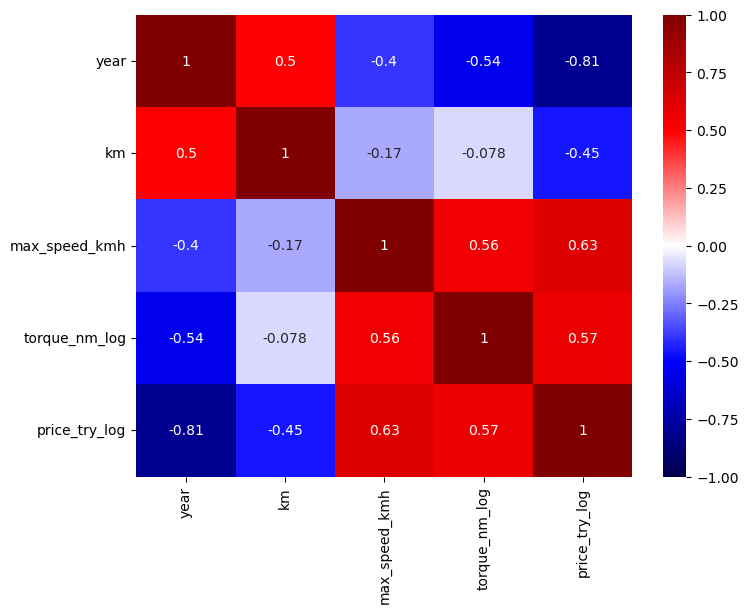

In [101]:
plt.figure(figsize=[8,6])
sns.heatmap(train.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

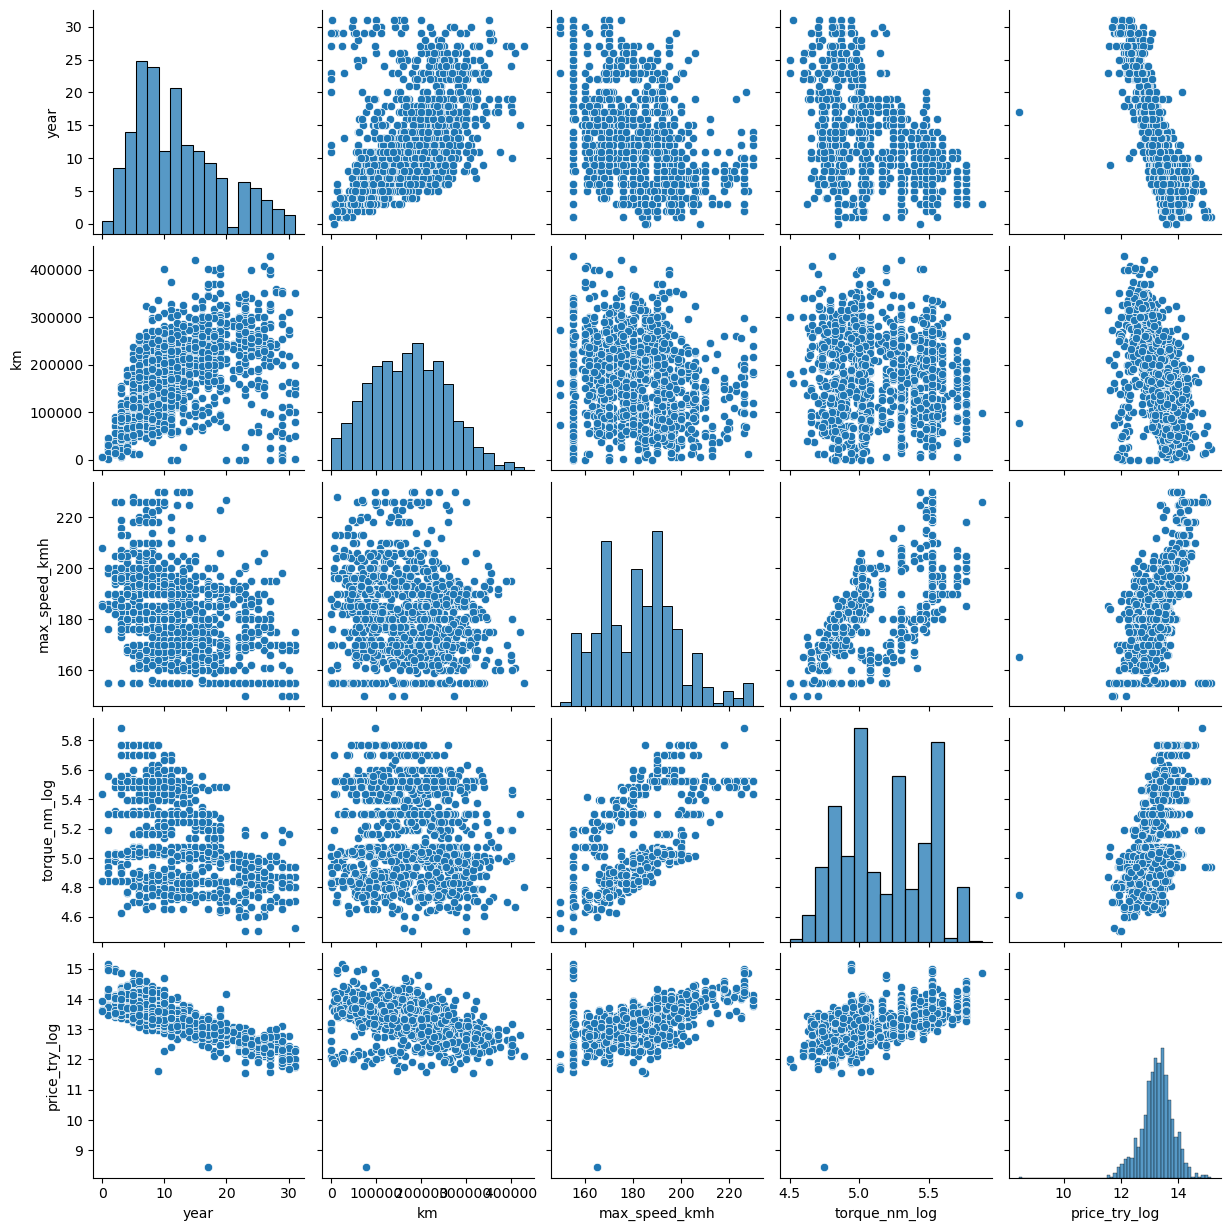

In [102]:
sns.pairplot(train);

In [103]:
import statsmodels.formula.api as smf

In [104]:
lm1 = smf.ols('price_try_log ~ year + km + max_speed_kmh + torque_nm_log', data=train)

fit1 = lm1.fit()

fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_try_log   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     1088.
Date:                Tue, 29 Aug 2023   Prob (F-statistic):               0.00
Time:                        01:38:20   Log-Likelihood:                -128.71
No. Observations:                1299   AIC:                             267.4
Df Residuals:                    1294   BIC:                             293.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.3598      0.168     67.583      0.000      11.030      11.690
year             -0.0477      0.002    -31.697      0.000      -0.051      -0.045
km            -5.766e-07   1.06e-07     -5.414      0.000   -7.86e-07   -3.68e-07
max_speed_kmh     0.0119      0.001     21.294      0.000       0.011       0.013
torque_nm_log     0.0817      0.035      2.361      0.018       0.014       0.150
==============================================================================
Omnibus:                     1071.152   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           213584.756
Skew:                          -2.963   Prob(JB):                         0.00
Kurtosis:                      65.538   Cond. No.                     4.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------

In [105]:
train.transmission.value_counts()

Manual           792
Semiautomatic    261
Automatic        246
Name: transmission, dtype: int64

In [106]:
transmission_dict = {
    'Manual': '0',
    'Automatic': '2',
    'Semiautomatic': '1'
}

train['transmission'] = train.transmission.map(transmission_dict)
train['transmission'] = train['transmission'].astype(int)

In [107]:
transmission_dict = {
    'Manual': '0',
    'Automatic': '2',
    'Semiautomatic': '1'
}

test['transmission'] = test.transmission.map(transmission_dict)
test['transmission'] = test['transmission'].astype(int)

In [108]:
train.fuel.value_counts()

Diesel            598
LPG & Gasoline    402
Gasoline          299
Name: fuel, dtype: int64

In [109]:
fuel_dict = {
    'LPG & Gasoline': '0',
    'Gasoline': '1',
    'Diesel': '2'
}

train['fuel'] = train.fuel.map(fuel_dict)
train['fuel'] = train['fuel'].astype(int)

In [110]:
fuel_dict = {
    'LPG & Gasoline': '0',
    'Gasoline': '1',
    'Diesel': '2'
}

test['fuel'] = test.fuel.map(fuel_dict)
test['fuel'] = test['fuel'].astype(int)

In [111]:
train.warranty.value_counts()

Warrantless    1170
Warranted       129
Name: warranty, dtype: int64

In [112]:
warranty_dict = {
    'Warrantless': '0',
    'Warranted': '1'
}

train['warranty'] = train.warranty.map(warranty_dict)
train['warranty'] = train['warranty'].astype(int)

In [113]:
warranty_dict = {
    'Warrantless': '0',
    'Warranted': '1'
}

test['warranty'] = test.warranty.map(warranty_dict)
test['warranty'] = test['warranty'].astype(int)

In [114]:
train.from_.value_counts()

Dealer               654
Owner                641
Authorized Dealer      4
Name: from_, dtype: int64

In [115]:
from_dict = {
    'Owner': '0',
    'Dealer': '1',
    'Authorized Dealer': '2'
}

train['from_'] = train.from_.map(from_dict)
train['from_'] = train['from_'].astype(int)

In [116]:
from_dict = {
    'Owner': '0',
    'Dealer': '1',
    'Authorized Dealer': '2'
}

test['from_'] = test.from_.map(from_dict)
test['from_'] = test['from_'].astype(int)

In [117]:
train.wheel_drive.value_counts()

Front-Wheel Drive    1208
Rear-Wheel Drive       89
4WD (Continuous)        2
Name: wheel_drive, dtype: int64

In [118]:
wheel_drive_dict = {
    'Front-Wheel Drive': '0',
    'Rear-Wheel Drive': '1',
    '4WD (Continuous)': '2'
}

train['wheel_drive'] = train.wheel_drive.map(wheel_drive_dict)
train['wheel_drive'] = train['wheel_drive'].astype(int)

In [119]:
wheel_drive_dict = {
    'Front-Wheel Drive': '0',
    'Rear-Wheel Drive': '1',
    '4WD (Continuous)': '2'
}

test['wheel_drive'] = test.wheel_drive.map(wheel_drive_dict)
test['wheel_drive'] = test['wheel_drive'].astype(int)

In [120]:
train.painted_changed.value_counts()

Original              757
Painted or Changed    542
Name: painted_changed, dtype: int64

In [121]:
pc_dict = {
    'Painted or Changed': '0',
    'Original': '1'
}

train['painted_changed'] = train.painted_changed.map(pc_dict)
train['painted_changed'] = train['painted_changed'].astype(int)

In [122]:
pc_dict = {
    'Painted or Changed': '0',
    'Original': '1'
}

test['painted_changed'] = test.painted_changed.map(pc_dict)
test['painted_changed'] = test['painted_changed'].astype(int)

In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1498
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             1299 non-null   object 
 1   series           1299 non-null   object 
 2   year             1299 non-null   int64  
 3   km               1299 non-null   int64  
 4   transmission     1299 non-null   int64  
 5   fuel             1299 non-null   int64  
 6   body_type        1299 non-null   object 
 7   warranty         1299 non-null   int64  
 8   from_            1299 non-null   int64  
 9   wheel_drive      1299 non-null   int64  
 10  max_speed_kmh    1299 non-null   int64  
 11  painted_changed  1299 non-null   int64  
 12  torque_nm_log    1299 non-null   float64
 13  price_try_log    1299 non-null   float64
dtypes: float64(2), int64(9), object(3)
memory usage: 152.2+ KB


In [124]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867 entries, 0 to 998
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             867 non-null    object 
 1   series           867 non-null    object 
 2   year             867 non-null    int64  
 3   km               867 non-null    int64  
 4   transmission     867 non-null    int64  
 5   fuel             867 non-null    int64  
 6   body_type        867 non-null    object 
 7   warranty         867 non-null    int64  
 8   from_            867 non-null    int64  
 9   wheel_drive      867 non-null    int64  
 10  max_speed_kmh    867 non-null    int64  
 11  painted_changed  867 non-null    int64  
 12  torque_nm_log    867 non-null    float64
dtypes: float64(1), int64(9), object(3)
memory usage: 94.8+ KB


# -------------------------------------------------------------------------------------------

In [125]:
train = pd.get_dummies(train, columns=['make', 'series', 'body_type'], drop_first=True)
train = train.reset_index(drop=True)
train

year      km  transmission  fuel  warranty  from_  wheel_drive  \
0       20  149000             0     0         0      1            0   
1       11  210000             0     2         0      1            0   
2        3   38000             1     1         0      0            0   
3        2   30000             0     1         0      0            0   
4        6  120000             0     2         0      0            0   
...    ...     ...           ...   ...       ...    ...          ...   
1294     6  260000             1     2         0      1            0   
1295    11  137000             0     1         0      0            0   
1296    24  256000             0     0         0      0            0   
1297    17  200000             0     0         0      0            0   
1298     8  162000             0     2         0      0            0   

      max_speed_kmh  painted_changed  torque_nm_log  ...  \
0               190                1       4.990433  ...   
1               180                1       5.438079  ...   
2               216                1       5.298317  ...   
3               200                1       5.323010  ...   
4               182                1       5.438079  ...   
...             ...              ...            ...  ...   
1294            176                1       5.393628  ...   
1295            177                0       4.882802  ...   
1296            186                0       4.941642  ...   
1297            190                1       5.043425  ...   
1298            173                0       5.347108  ...   

      series_Other Renault  series_Other Seat  series_Other Tofaş  \
0                        0                  0                   0   
1                        0                  0                   0   
2                        0                  0                   0   
3                        0                  0                   0   
4                        0                  0                   0   
...                    ...                ...                 ...   
1294                     0                  0                   0   
1295                     0                  1                   0   
1296                     0                  0                   0   
1297                     0                  0                   0   
1298                     0                  0                   0   

      series_Other Toyota  series_Other Volkswagen  series_Passat  \
0                       0                        0              0   
1                       0                        0              0   
2                       0                        0              0   
3                       0                        0              0   
4                       0                        0              0   
...                   ...                      ...            ...   
1294                    0                        0              0   
1295                    0                        0              0   
1296                    0                        0              0   
1297                    0                        0              0   
1298                    0                        0              0   

      series_Polo  series_Symbol  body_type_Other  body_type_Sedan  
0               0              0                0                0  
1               0              0                0                1  
2               0              0                0                1  
3               0              0                0                1  
4               0              0                0                1  
...           ...            ...              ...              ...  
1294            0              0                0                0  
1295            0              0                0                0  
1296            0              0                0                0  
1297            0              0                0                1  
129

In [126]:
test = pd.get_dummies(test, columns=['make', 'series', 'body_type'], drop_first=True)
test = test.reset_index(drop=True)
test

year      km  transmission  fuel  warranty  from_  wheel_drive  \
0      14  281000             2     0         0      0            0   
1       6  162000             1     2         0      0            0   
2      20  205000             1     0         0      1            0   
3       9  209000             0     0         0      0            0   
4      30  217000             0     0         0      0            0   
..    ...     ...           ...   ...       ...    ...          ...   
862    23  294500             0     0         0      0            0   
863    18  228000             0     0         0      0            0   
864    26  370000             0     0         0      0            0   
865    12   60000             0     1         0      0            0   
866     4   35000             0     1         0      0            0   

     max_speed_kmh  painted_changed  torque_nm_log  ...  series_Other Renault  \
0              182                1       5.010635  ...                     0   
1              176                0       5.393628  ...                     0   
2              170                0       4.700480  ...                     0   
3              198                1       5.062595  ...                     0   
4              150                1       4.867534  ...                     0   
..             ...              ...            ...  ...                   ...   
862            150                0       4.941642  ...                     0   
863            185                0       5.010635  ...                     0   
864            187                1       4.875197  ...                     1   
865            170                1       4.736198  ...                     0   
866            185                0       4.844187  ...                     0   

     series_Other Seat  series_Other Tofaş  series_Other Toyota  \
0                    0                   0                    0   
1                    0                   0                    0   
2                    0                   0                    0   
3                    0                   0                    0   
4                    0                   0                    0   
..                 ...                 ...                  ...   
862                  0                   0                    0   
863                  0                   0                    0   
864                  0                   0                    0   
865                  0                   0                    0   
866                  0                   0                    0   

     series_Other Volkswagen  series_Passat  series_Polo  series_Symbol  \
0                          0              0            0              0   
1                          0              0            0              0   
2                          0              0            0              0   
3                          0              0            0              0   
4                          0              0            0              0   
..                       ...            ...          ...            ...   
862                        0              0            0              0   
863                        0              0            0              0   
864                        0              0            0              0   
865                        0              0            0              1   
866                        0              0            0              0   

     body_type_Other  body_type_Sedan  
0                  0                1  
1                  0                0  
2                  0                0  
3                  0                1  
4                  0                0  
..               ...              ...  
862                0                0  
863                0                0  
864                0                0  
865                0                1  
866                0             

# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------

In [127]:
train.corr()

year        km  transmission      fuel  \
year                          1.000000  0.503850     -0.303806 -0.546667   
km                            0.503850  1.000000     -0.182981 -0.073721   
transmission                 -0.303806 -0.182981      1.000000 -0.017631   
fuel                         -0.546667 -0.073721     -0.017631  1.000000   
warranty                     -0.222985 -0.199703      0.131231  0.087960   
from_                        -0.186343 -0.052566      0.199107  0.202612   
wheel_drive                   0.169513 -0.092404      0.177939 -0.155467   
max_speed_kmh                -0.397595 -0.170664      0.431970  0.067383   
painted_changed              -0.082779 -0.161866      0.004323  0.015858   
torque_nm_log                -0.544011 -0.077723      0.236436  0.726013   
price_try_log                -0.809469 -0.453948      0.517126  0.383449   
make_BMW                     -0.071516 -0.043115      0.244504 -0.024047   
make_Fiat                    -0.063624 -0.003057     -0.213987  0.057787   
make_Ford                    -0.028942  0.017489     -0.062130  0.104664   
make_Honda                   -0.039896 -0.073901      0.301627 -0.204351   
make_Hyundai                  0.012966  0.010737      0.007133 -0.030996   
make_Mercedes - Benz         -0.050855 -0.037614      0.237831  0.008737   
make_Opel                     0.050077  0.011822     -0.013902 -0.043691   
make_Other                    0.008819  0.018267     -0.009485 -0.011048   
make_Peugeot                  0.006056  0.013833     -0.016955  0.018641   
make_Renault                 -0.005057  0.047583     -0.156297  0.129139   
make_Seat                    -0.021388 -0.010874      0.005399 -0.028184   
make_Tofaş                    0.374828 -0.109682     -0.124051 -0.224804   
make_Toyota                   0.013140  0.000259     -0.000198 -0.037398   
make_Volkswagen              -0.061339  0.039058      0.075556  0.041745   
series_5 Series              -0.097169 -0.031093      0.201047 -0.019495   
series_Astra                  0.022571  0.002198     -0.054551 -0.047970   
series_Civic                 -0.024311 -0.037716      0.262504 -0.205917   
series_Clio                  -0.044829 -0.030272     -0.086689  0.107139   
series_Corolla                0.010023  0.015089     -0.005051 -0.042257   
series_Corsa                  0.051465 -0.001351      0.022220 -0.002430   
series_Egea                  -0.236247 -0.174586     -0.089473  0.088583   
series_Fiesta                -0.014561  0.022793     -0.086989  0.115471   
series_Fluence               -0.068632  0.057806     -0.001057  0.149330   
series_Focus                 -0.056390  0.006391     -0.002219  0.076963   
series_Golf                  -0.036008 -0.012368      0.034275  0.009793   
series_Jetta                 -0.043388  0.058480      0.054090  0.051993   
series_Linea                 -0.073893  0.030327     -0.127551  0.122971   
series_Megane                -0.045573  0.006788     -0.029032  0.041634   
series_Other Audi            -0.035514 -0.003482      0.073039  0.045502   
series_Other BMW             -0.047869 -0.041354      0.126848  0.028369   
series_Other Fiat             0.184821  0.135912     -0.140037 -0.093482   
series_Other Ford             0.053084 -0.000156     -0.028972 -0.043720   
series_Other Honda           -0.043270 -0.096863      0.147407 -0.035757   
series_Other Hyundai          0.012966  0.010737      0.007133 -0.030996   
series_Other Mercedes - Benz -0.050855 -0.037614      0.237831  0.008737   
series_Other Opel             0.004476  0.031011      0.036710 -0.018221   
series_Other Other            0.008819  0.018267     -0.009485 -0.011048   
series_Other Peugeot          0.006056  0.013833     -0.016955  0.018641   
series_Other Renault          0.257792  0.101313     -0.098648 -0.158509   
series_Other Seat            -0.021388 -0.010874      0.005399 -0.028184   
series_Other Tofaş            0.374828 -0.109682     -0.124051 -0.224804   
series

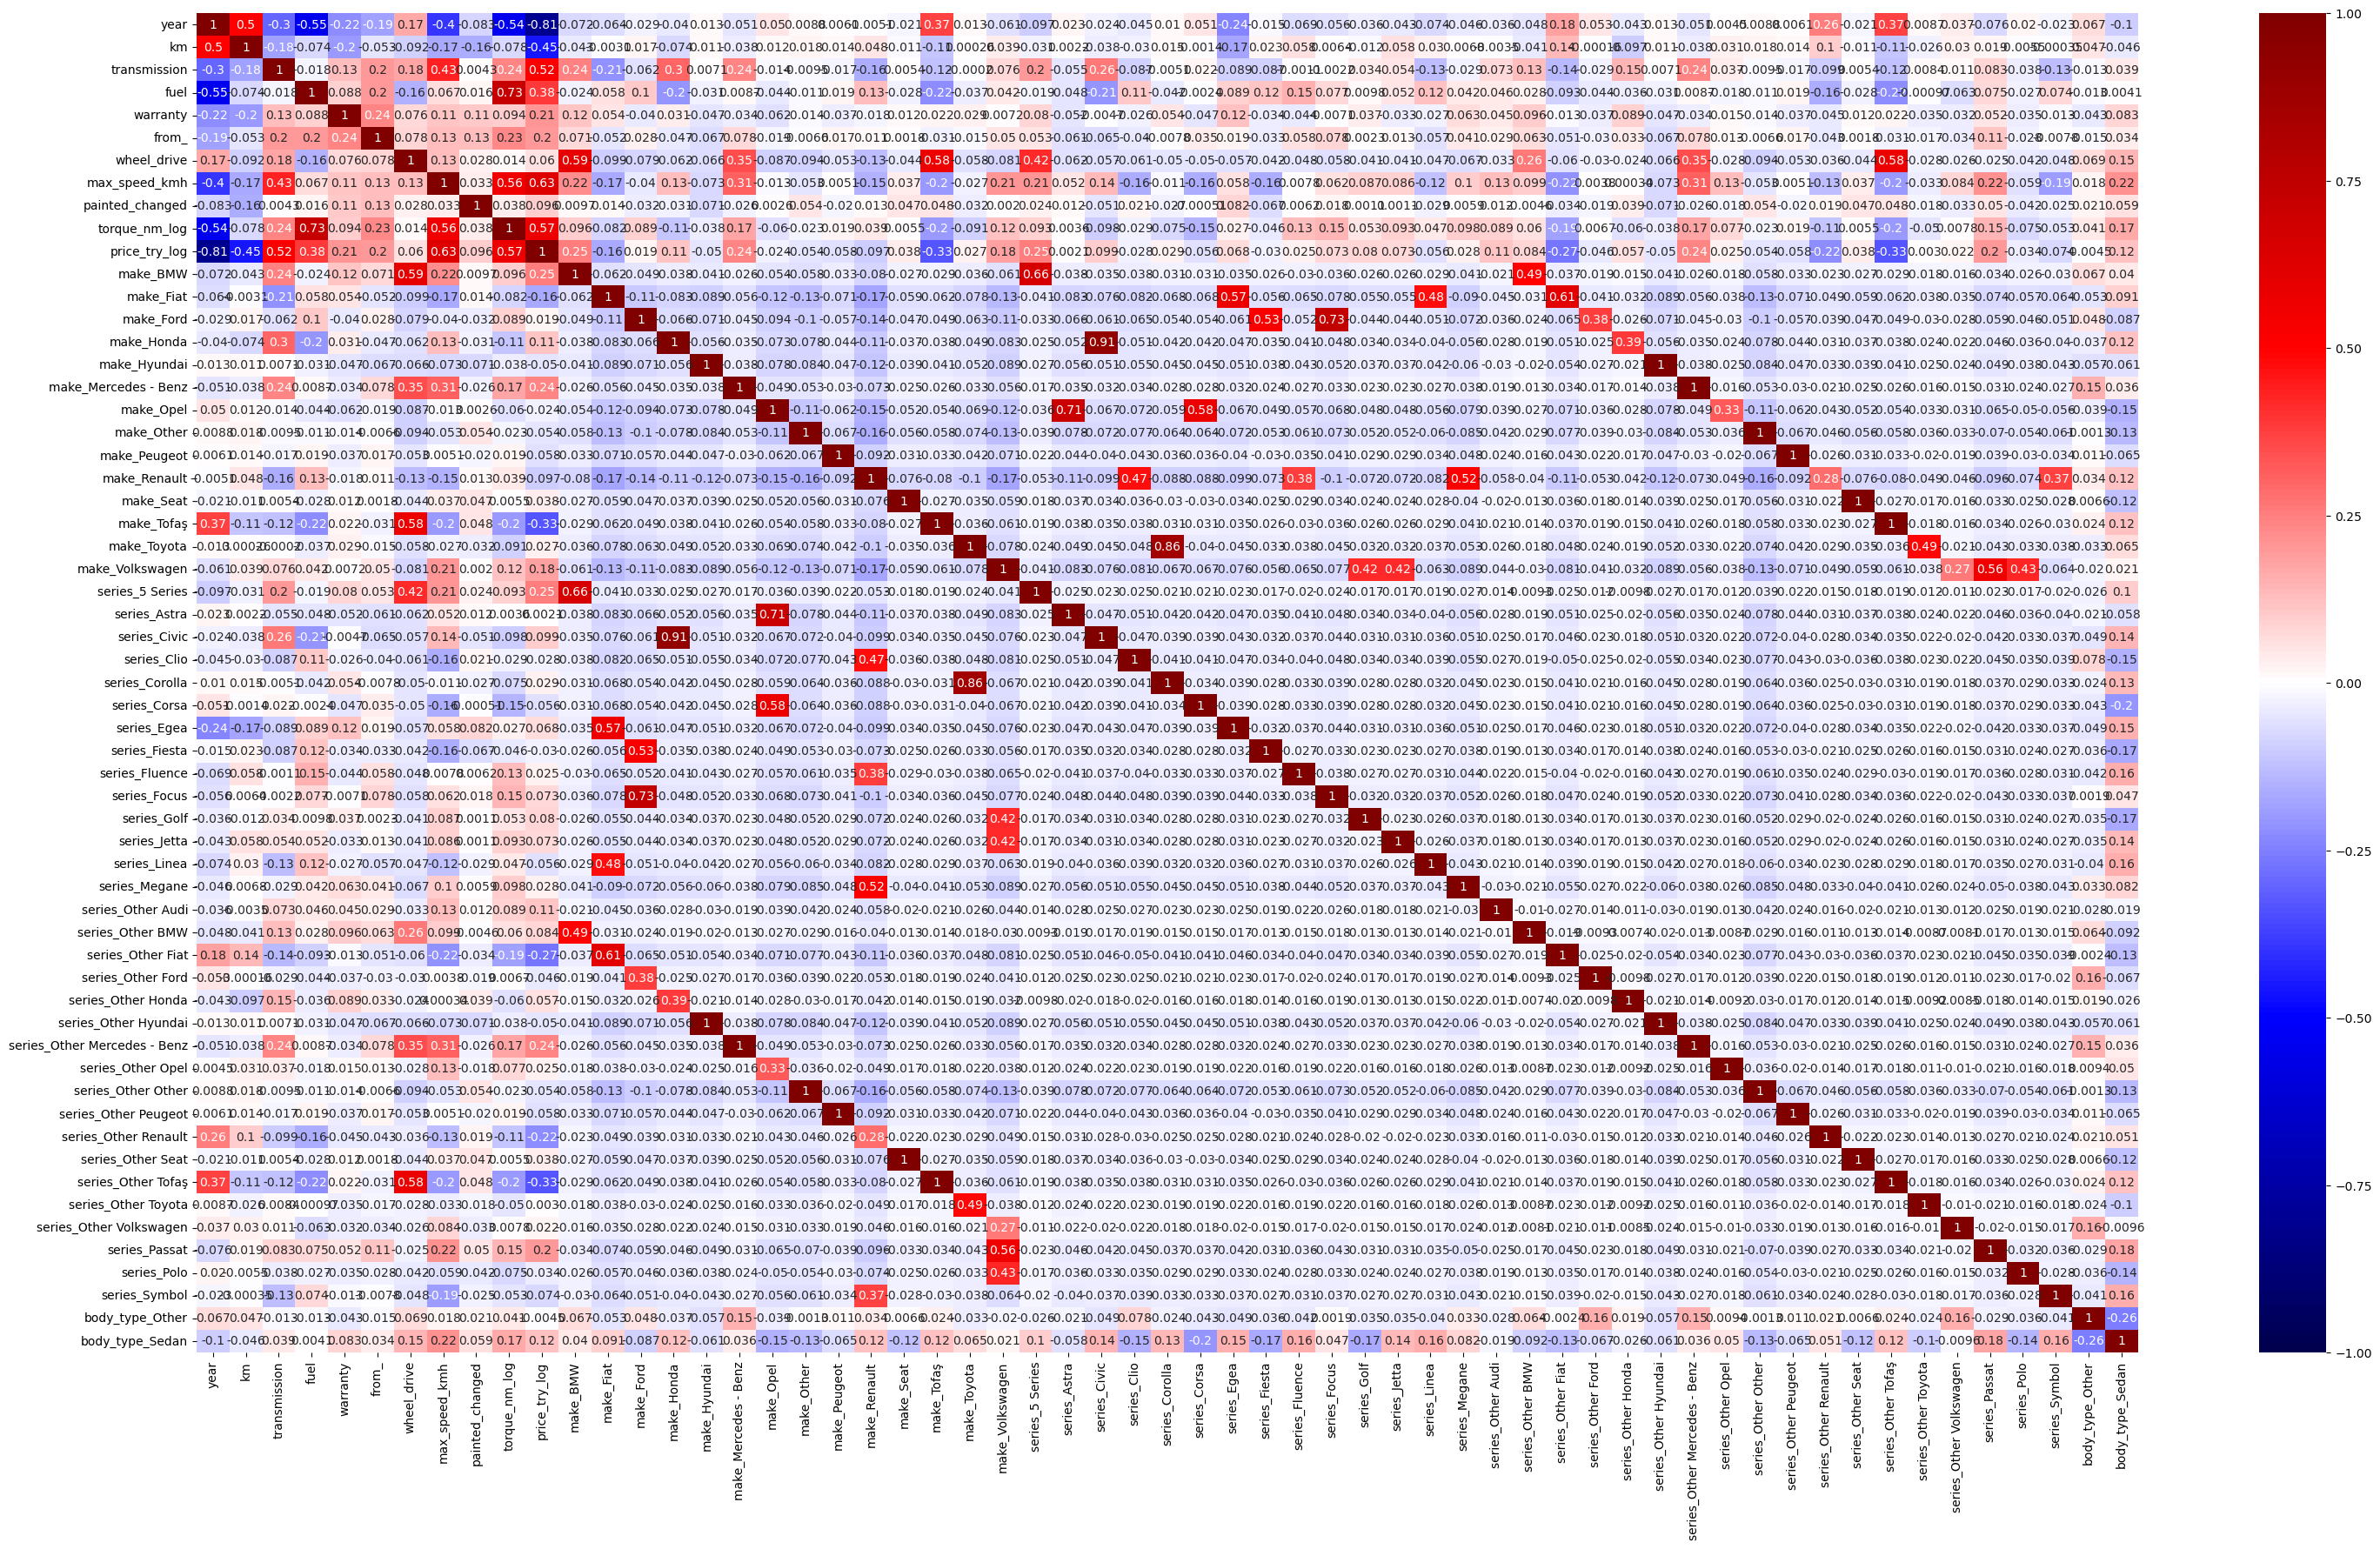

In [128]:
plt.figure(figsize=[36,20])
sns.heatmap(train.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [129]:
datasets = [train, test]
for dataset in datasets:
    dataset.drop(columns=['make_BMW', 'make_Fiat', 'make_Ford', 'make_Honda',
                          'make_Hyundai', 'make_Mercedes - Benz', 'make_Opel',
                          'make_Other', 'make_Peugeot', 'make_Renault',
                          'make_Seat', 'make_Tofaş', 'make_Toyota', 'make_Volkswagen', 'fuel'], inplace=True)

In [130]:
train.corr()

year        km  transmission  warranty  \
year                          1.000000  0.503850     -0.303806 -0.222985   
km                            0.503850  1.000000     -0.182981 -0.199703   
transmission                 -0.303806 -0.182981      1.000000  0.131231   
warranty                     -0.222985 -0.199703      0.131231  1.000000   
from_                        -0.186343 -0.052566      0.199107  0.240391   
wheel_drive                   0.169513 -0.092404      0.177939  0.075785   
max_speed_kmh                -0.397595 -0.170664      0.431970  0.112477   
painted_changed              -0.082779 -0.161866      0.004323  0.108705   
torque_nm_log                -0.544011 -0.077723      0.236436  0.094250   
price_try_log                -0.809469 -0.453948      0.517126  0.208451   
series_5 Series              -0.097169 -0.031093      0.201047  0.079605   
series_Astra                  0.022571  0.002198     -0.054551 -0.051803   
series_Civic                 -0.024311 -0.037716      0.262504 -0.004676   
series_Clio                  -0.044829 -0.030272     -0.086689 -0.026044   
series_Corolla                0.010023  0.015089     -0.005051  0.053663   
series_Corsa                  0.051465 -0.001351      0.022220 -0.047051   
series_Egea                  -0.236247 -0.174586     -0.089473  0.124280   
series_Fiesta                -0.014561  0.022793     -0.086989 -0.033917   
series_Fluence               -0.068632  0.057806     -0.001057 -0.044286   
series_Focus                 -0.056390  0.006391     -0.002219 -0.007112   
series_Golf                  -0.036008 -0.012368      0.034275  0.036938   
series_Jetta                 -0.043388  0.058480      0.054090 -0.032753   
series_Linea                 -0.073893  0.030327     -0.127551 -0.027092   
series_Megane                -0.045573  0.006788     -0.029032  0.062760   
series_Other Audi            -0.035514 -0.003482      0.073039  0.045308   
series_Other BMW             -0.047869 -0.041354      0.126848  0.096392   
series_Other Fiat             0.184821  0.135912     -0.140037 -0.012870   
series_Other Ford             0.053084 -0.000156     -0.028972 -0.037081   
series_Other Honda           -0.043270 -0.096863      0.147407  0.088556   
series_Other Hyundai          0.012966  0.010737      0.007133 -0.047495   
series_Other Mercedes - Benz -0.050855 -0.037614      0.237831 -0.033917   
series_Other Opel             0.004476  0.031011      0.036710  0.015199   
series_Other Other            0.008819  0.018267     -0.009485 -0.014238   
series_Other Peugeot          0.006056  0.013833     -0.016955 -0.036768   
series_Other Renault          0.257792  0.101313     -0.098648 -0.044580   
series_Other Seat            -0.021388 -0.010874      0.005399  0.011825   
series_Other Tofaş            0.374828 -0.109682     -0.124051  0.022344   
series_Other Toyota           0.008699 -0.025629      0.008359 -0.034659   
series_Other Volkswagen       0.037353  0.030185      0.010647 -0.032063   
series_Passat                -0.075620  0.019006      0.082581  0.052157   
series_Polo                   0.020481 -0.005483     -0.038168 -0.035054   
series_Symbol                -0.023306 -0.000350     -0.129270 -0.013168   
body_type_Other               0.066549  0.047349     -0.012522 -0.042520   
body_type_Sedan              -0.101426 -0.046356      0.039443  0.083268   

                                 from_  wheel_drive  max_speed_kmh  \
year                         -0.186343     0.169513      -0.397595   
km                           -0.052566    -0.092404      -0.170664   
transmission                  0.199107     0.177939       0.431970   
warranty                      0.240391     0.075785       0.112477   
from_                         1.000000     0.078483       0.128428   
wheel_drive                   0.078483     1.000000       0.132379   
max_speed_kmh                 0.128428     0.132379       1.000000   
painted_changed               0.127156     0.028437  

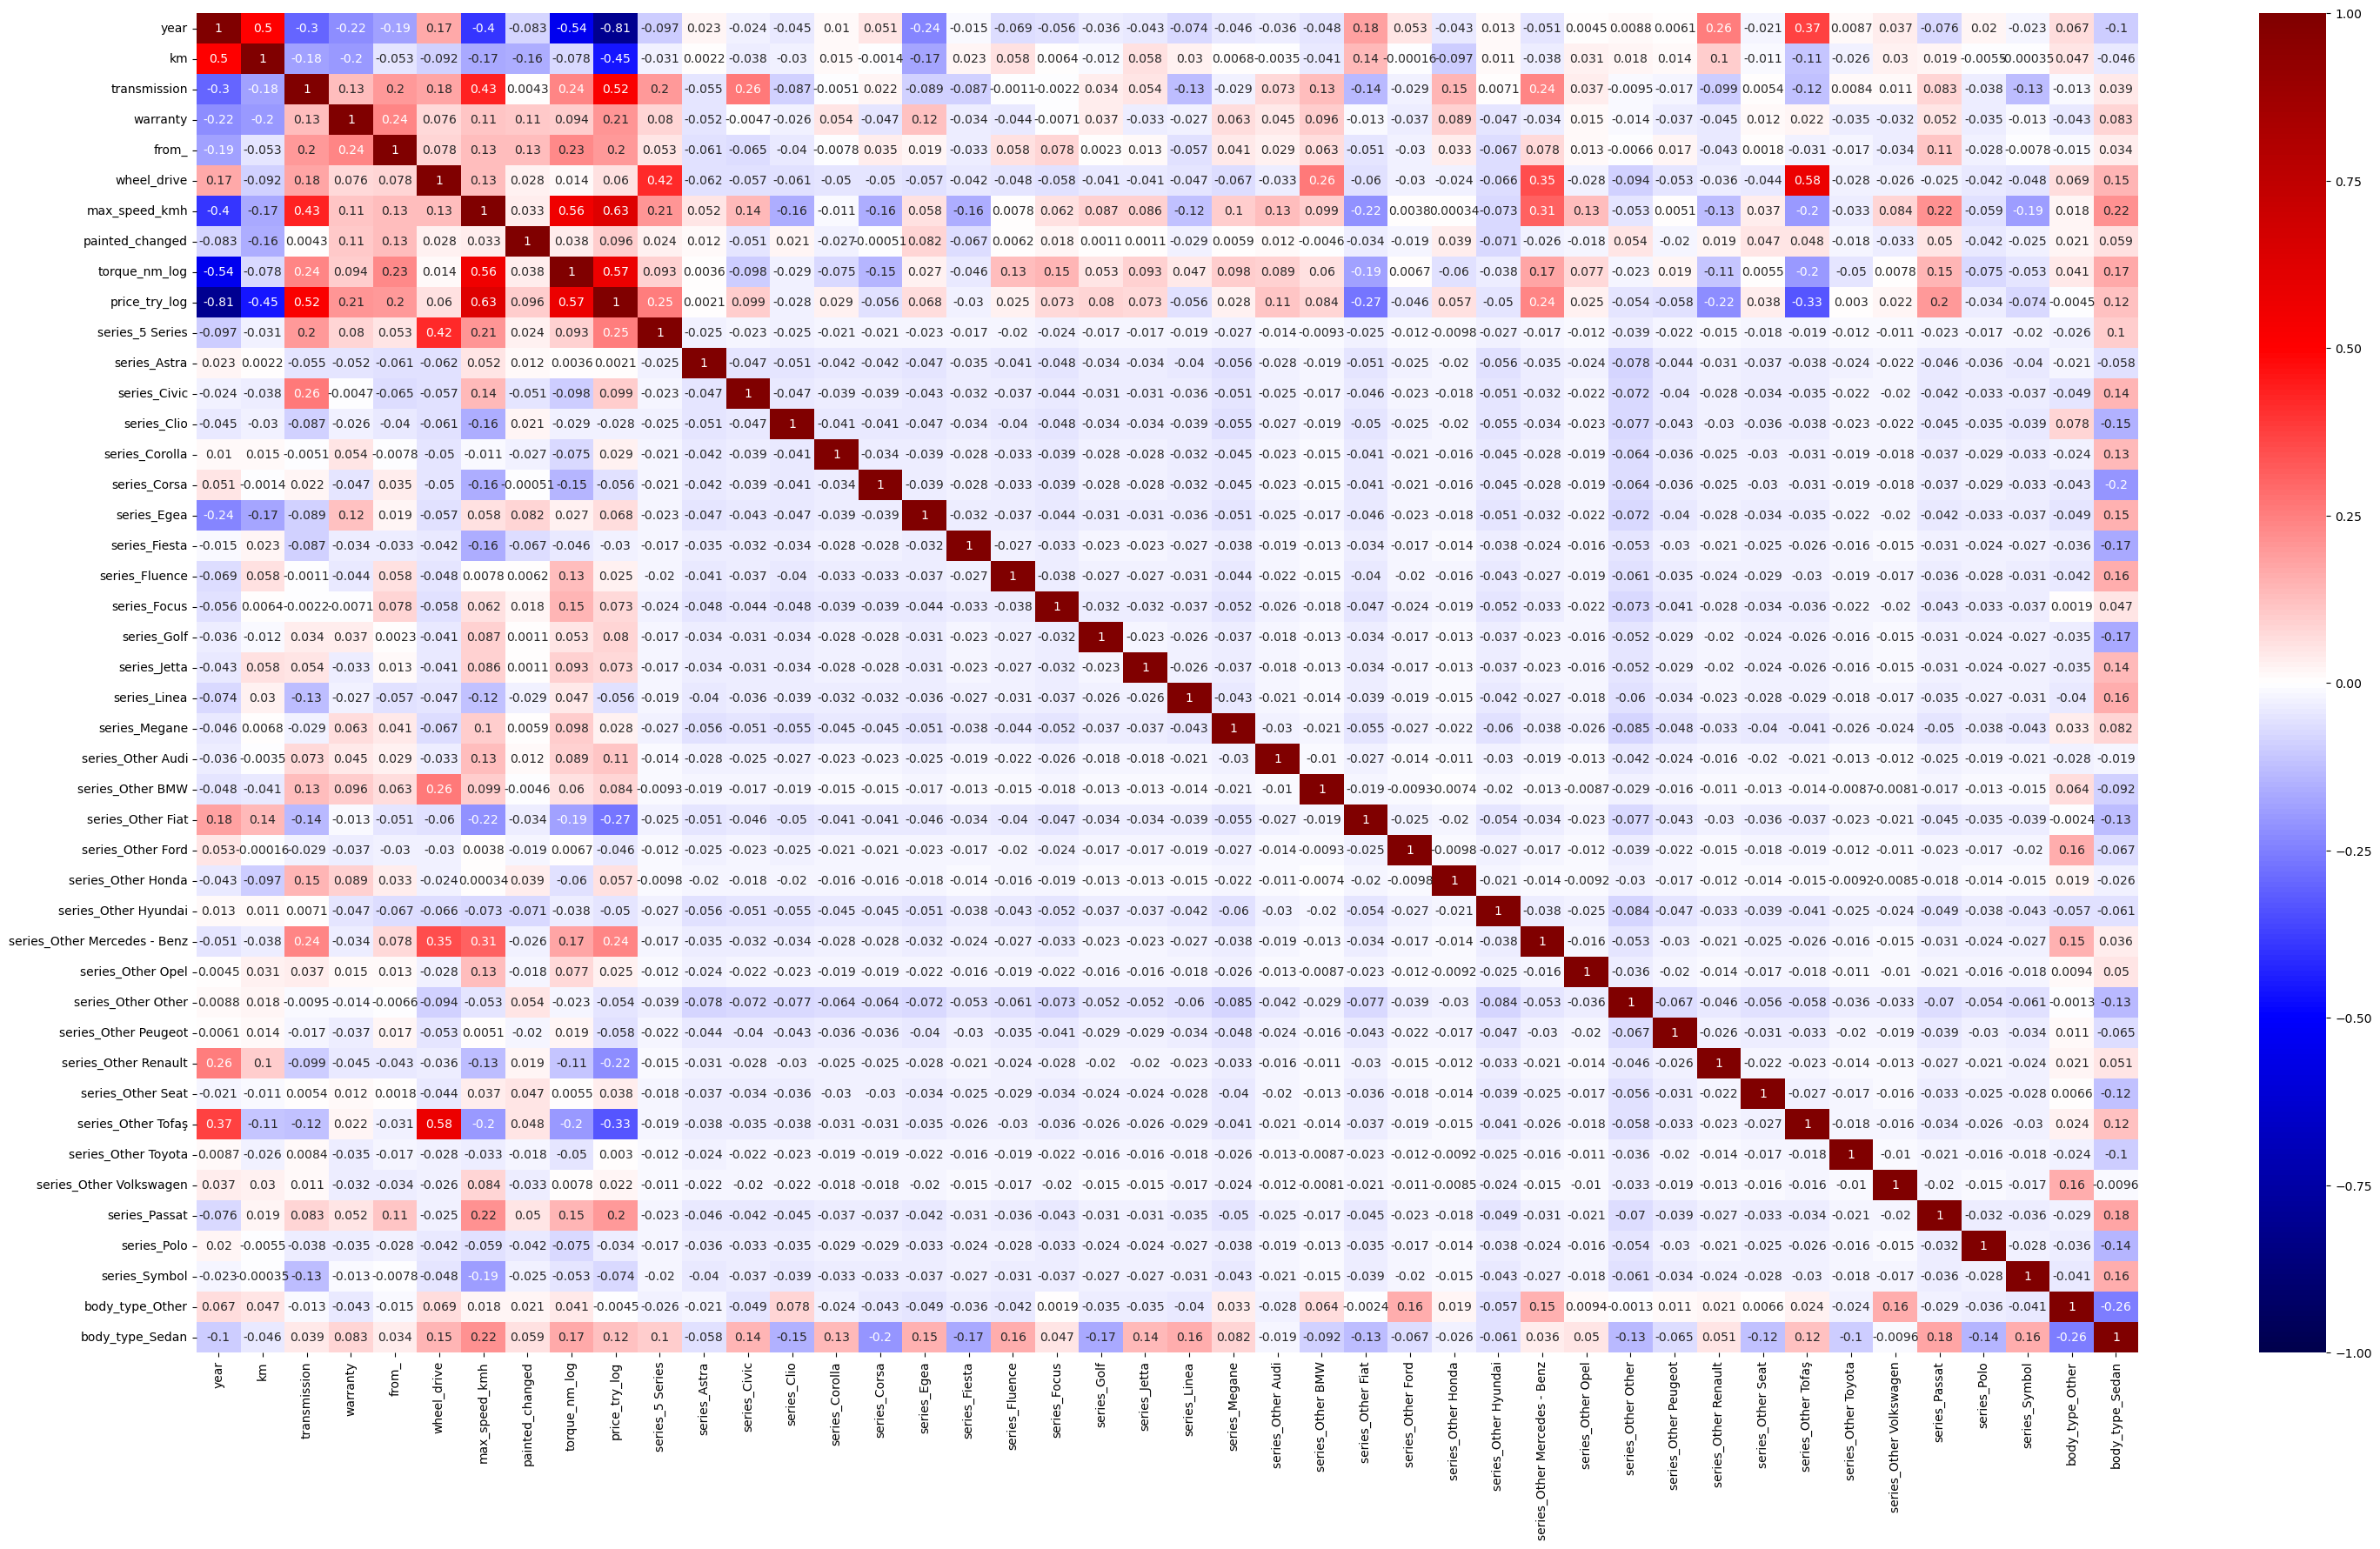

In [131]:
plt.figure(figsize=[36,20])
sns.heatmap(train.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------

# Modelling

In [132]:
X = train.drop(columns='price_try_log')
y = train.price_try_log


X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train, x_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [133]:
lreg = LinearRegression()

lreg.fit(x_train,y_train)

pred = lreg.predict(x_train)

mse = np.mean((pred - y_train)**2)


print("Train Score: ", lreg.score(x_train, y_train))
print("MSE: ", mse)

Train Score:  0.8370665552904074
MSE:  0.051369737602621826


In [134]:
lreg = LinearRegression()

lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

mse = np.mean((pred - y_cv)**2)

print("Validation Score: ", lreg.score(x_cv, y_cv))
print("MSE: ", mse)

Validation Score:  0.9125176503662618
MSE:  0.028267487340240753


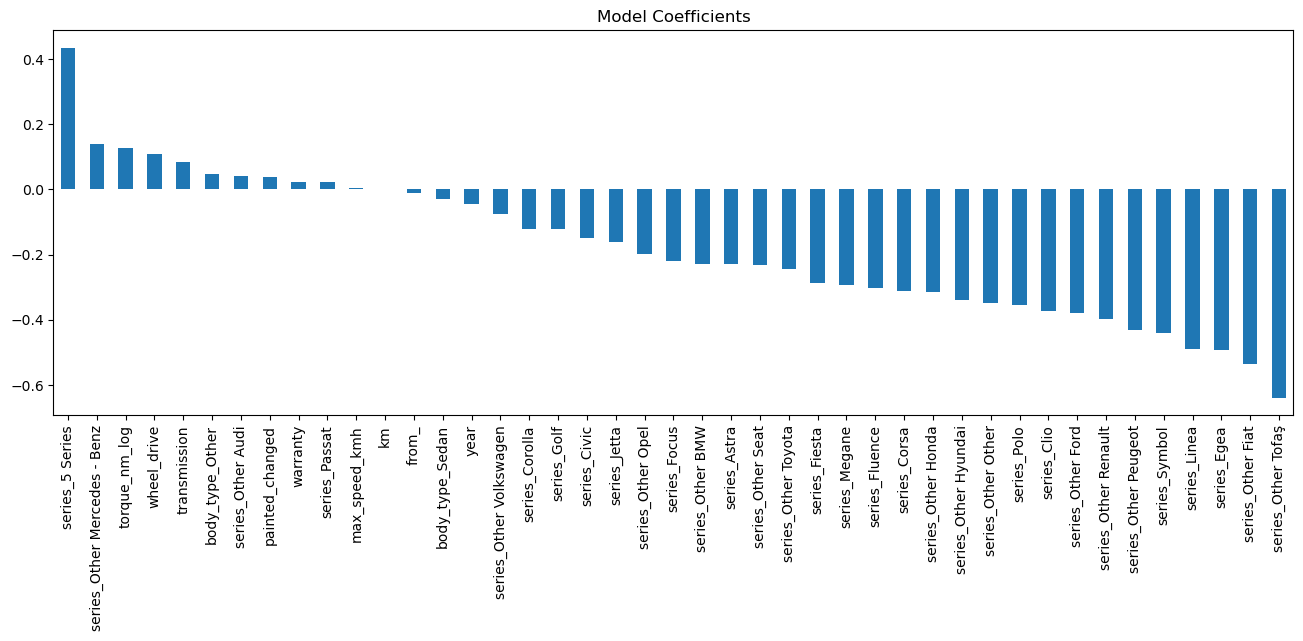

In [135]:
predictors = x_train.columns
coef = Series(lreg.coef_,predictors).sort_values(ascending=False)
plt.figure(figsize=[16,5])
coef.plot(kind='bar', title='Model Coefficients');

In [136]:
from sklearn.preprocessing import RobustScaler

lreg2 = LinearRegression()

robust_scale = RobustScaler()
x_train_rs = robust_scale.fit_transform(x_train.values)
x_cv_rs = robust_scale.fit_transform(x_cv.values)

lreg2.fit(x_train_rs,y_train)

pred = lreg2.predict(x_cv_rs)

mse = np.mean((pred - y_cv)**2)

print("Validation Score: ", lreg2.score(x_cv_rs, y_cv))
print("MSE: ", mse)

Validation Score:  0.9106482773487873
MSE:  0.028871523220928483


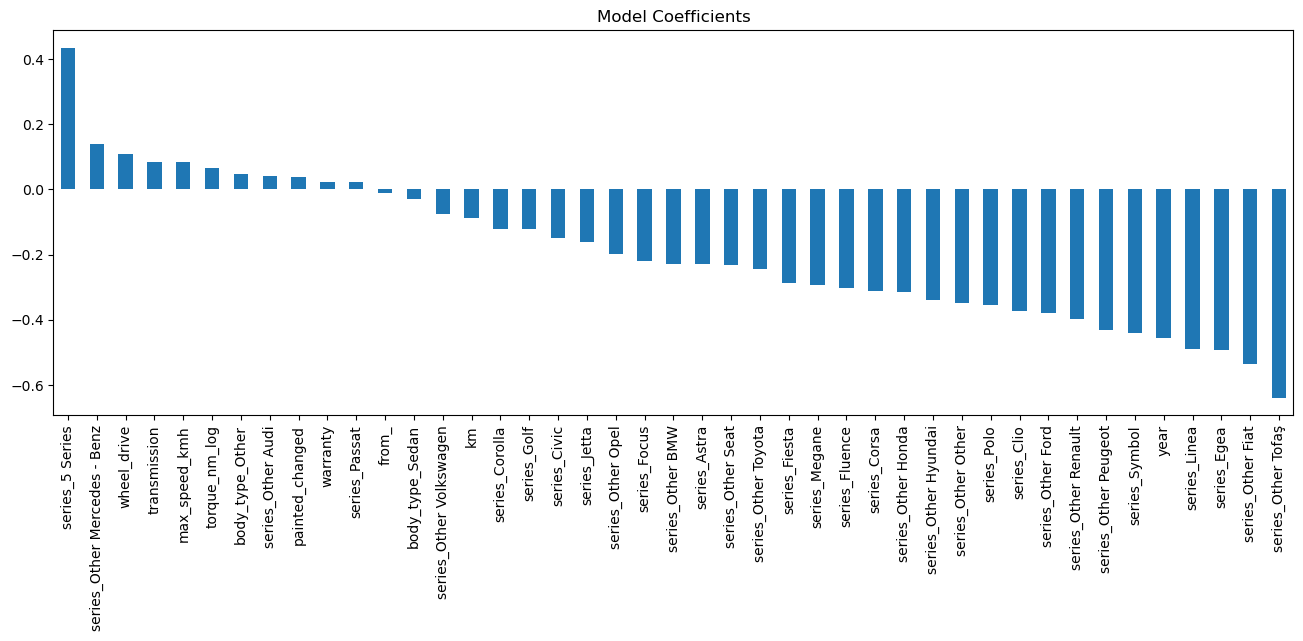

In [137]:
predictors = x_train.columns
coef = Series(lreg2.coef_,predictors).sort_values(ascending=False)
plt.figure(figsize=[16,5])
coef.plot(kind='bar', title='Model Coefficients');

# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------

# Regularization

In [138]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=10)

ridgeReg.fit(x_train_rs,y_train)

pred = ridgeReg.predict(x_cv_rs)

mse = np.mean((pred - y_cv)**2)

print("Validation Score: ", ridgeReg.score(x_cv_rs, y_cv))
print("MSE: ", mse)

Validation Score:  0.8973990097968982
MSE:  0.0331526554076896


In [139]:
from sklearn.metrics import r2_score

alphalist = 10**(np.linspace(0,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for index, curr_alpha in enumerate(alphalist):

    ridge = Ridge(alpha = curr_alpha)
    ridge.fit(x_train_rs, y_train)

    val_set_pred = ridge.predict(x_cv_rs)
    err_vec_val[index] = r2_score(y_cv, val_set_pred)

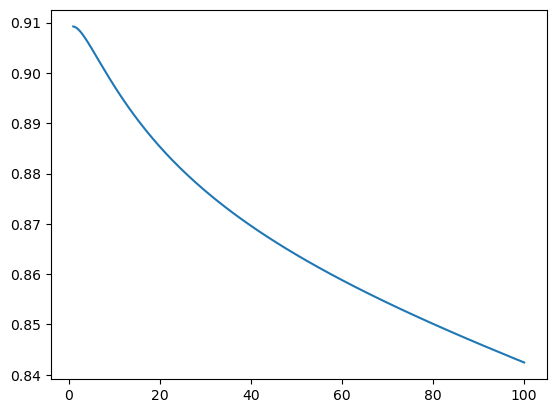

In [140]:
plt.plot(alphalist, err_vec_val);

In [141]:
np.max(err_vec_val)

0.9092348042127855

In [142]:
alphalist[np.argmax(err_vec_val)]

1.0

In [143]:
ridgeReg = Ridge(alpha=1)

ridgeReg.fit(x_train_rs,y_train)

pred = ridgeReg.predict(x_cv_rs)

mse = np.mean((pred - y_cv)**2)

print("Validation Score: ", ridgeReg.score(x_cv_rs, y_cv))
print("MSE: ", mse)

Validation Score:  0.9092348042127855
MSE:  0.029328247739016797


In [144]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0)

lassoReg.fit(x_train_rs,y_train)

pred = lassoReg.predict(x_cv_rs)

mse = np.mean((pred - y_cv)**2)

print("Validation Score: ", lassoReg.score(x_cv_rs, y_cv))
print("MSE: ", mse)

Validation Score:  0.9106482187157405
MSE:  0.028871542166566243


# Testing & Cross-Validation & Prediction

In [145]:
lreg3 = LinearRegression()

X_train_rs = robust_scale.fit_transform(X_train.values)
x_test_rs = robust_scale.fit_transform(x_test.values)

lreg3.fit(X_train_rs,Y_train)


pred = lreg3.predict(x_test_rs)

mse = np.mean((pred - y_test)**2)

print("Test Score: ", lreg3.score(x_test_rs, y_test))
print("MSE: ", mse)

Test Score:  0.9106723546998058
MSE:  0.025518377830987097


# -------------------------------------------------------------------------------------------

In [146]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

lr_cv = cross_val_score(lr, X_train, Y_train, cv=10, scoring='r2')
lr_cv

array([0.89753777, 0.81351943, 0.64412778, 0.8390812 , 0.90360774,
       0.90303449, 0.9014279 , 0.9305389 , 0.91243728, 0.88197698])

In [147]:
ridge = Ridge(alpha=1)
X_train_scaled = robust_scale.fit_transform(X_train.values)

ridge_cv = cross_val_score(ridge, X_train_scaled, Y_train, cv=10, scoring='r2')
ridge_cv

array([0.89149313, 0.81113537, 0.64348577, 0.83898529, 0.90276996,
       0.9021646 , 0.90255699, 0.92977328, 0.91744619, 0.88315393])

In [148]:
lasso = Lasso(alpha=0)
X_train_scaled = robust_scale.fit_transform(X_train.values)

lasso_cv = cross_val_score(lasso, X_train_scaled, Y_train, cv=10, scoring='r2')
lasso_cv

array([0.8975315 , 0.81351883, 0.6441278 , 0.83908205, 0.90360777,
       0.90303457, 0.90142807, 0.93053899, 0.91243762, 0.88197698])

In [149]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'Cross Validated Score (Mean)': [lr_cv.mean(), ridge_cv.mean(), lasso_cv.mean()],
    'Cross Validated Score (Std)': [lr_cv.std(), ridge_cv.std(), lasso_cv.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df

Cross Validated Score (Mean)  Cross Validated Score (Std)
Model                                                                       
Linear Regression                      0.862729                     0.080132
Lasso Regression                       0.862728                     0.080132
Ridge Regression                       0.862296                     0.080480

# -------------------------------------------------------------------------------------------

In [150]:
test_rs = robust_scale.fit_transform(test.values)
lreg3.predict(test_rs)

array([13.33900209, 13.573527  , 12.84606094, 13.51269249, 12.26655049,
       12.99887083, 13.45573312, 12.43124043, 13.23675874, 13.49221945,
       13.25689631, 13.85841011, 12.91262225, 13.37216531, 12.88375792,
       12.9994014 , 13.34279079, 13.59380416, 12.75558786, 13.21627101,
       13.76282421, 14.16774678, 13.00447614, 13.58515129, 12.53878344,
       12.44761096, 13.57731775, 13.2919936 , 12.07352043, 13.03973883,
       13.3568604 , 13.07744277, 12.61072853, 13.77312375, 12.54654085,
       13.16517956, 13.19718285, 13.73827665, 12.84234898, 14.18624844,
       11.98824662, 13.26140087, 13.31280421, 13.0284127 , 13.17459876,
       12.39942664, 13.80609535, 12.65975317, 13.64333417, 13.52658951,
       12.90107035, 13.76316595, 13.14348058, 13.40716648, 12.29931349,
       12.51482278, 12.65645514, 13.03761503, 13.39464725, 13.4765475 ,
       13.58867586, 12.4223779 , 13.28946888, 12.95671694, 12.47720293,
       13.58921236, 13.64097038, 12.95447563, 13.02158781, 13.70

In [151]:
np.exp(lreg3.predict(test_rs))

array([ 620947.67062455,  785069.08435947,  379291.73524116,
        738733.48444293,  212468.81130973,  441914.11229315,
        697831.61821618,  250506.57079263,  560597.657159  ,
        723763.13246457,  572001.16479131, 1043833.03723435,
        405397.05500321,  641885.55663009,  393862.80690889,
        442148.64317318,  623304.71915139,  801150.55113864,
        346482.59305341,  549229.14196921,  948677.5157913 ,
       1422244.44289441,  444398.13577107,  794248.19944136,
        278948.7735253 ,  254641.24634709,  788050.73113463,
        592433.31764667,  175171.43951617,  460348.37917043,
        632136.35467973,  478036.69204876,  299757.33182271,
        958498.95770048,  281121.10822636,  521873.00981727,
        538844.79128626,  925673.30325476,  377886.43020621,
       1448803.26062616,  160853.07040721,  574583.59299348,
        604891.3936822 ,  455163.83222   ,  526811.8608894 ,
        242662.44495711,  990628.97670578,  314819.00590479,
        841830.672278  ,

In [152]:
test['Prediction'] = np.exp(lreg3.predict(test_rs))
test

year      km  transmission  warranty  from_  wheel_drive  max_speed_kmh  \
0      14  281000             2         0      0            0            182   
1       6  162000             1         0      0            0            176   
2      20  205000             1         0      1            0            170   
3       9  209000             0         0      0            0            198   
4      30  217000             0         0      0            0            150   
..    ...     ...           ...       ...    ...          ...            ...   
862    23  294500             0         0      0            0            150   
863    18  228000             0         0      0            0            185   
864    26  370000             0         0      0            0            187   
865    12   60000             0         0      0            0            170   
866     4   35000             0         0      0            0            185   

     painted_changed  torque_nm_log  series_5 Series  ...  series_Other Seat  \
0                  1       5.010635                0  ...                  0   
1                  0       5.393628                0  ...                  0   
2                  0       4.700480                0  ...                  0   
3                  1       5.062595                0  ...                  0   
4                  1       4.867534                0  ...                  0   
..               ...            ...              ...  ...                ...   
862                0       4.941642                0  ...                  0   
863                0       5.010635                0  ...                  0   
864                1       4.875197                0  ...                  0   
865                1       4.736198                0  ...                  0   
866                0       4.844187                0  ...                  0   

     series_Other Tofaş  series_Other Toyota  series_Other Volkswagen  \
0                     0                    0                        0   
1                     0                    0                        0   
2                     0                    0                        0   
3                     0                    0                        0   
4                     0                    0                        0   
..                  ...                  ...                      ...   
862                   0                    0                        0   
863                   0                    0                        0   
864                   0                    0                        0   
865                   0                    0                        0   
866                   0                    0                        0   

     series_Passat  series_Polo  series_Symbol  body_type_Other  \
0                0            0              0                0   
1                0            0              0                0   
2                0            0              0                0   
3                0            0              0                0   
4                0            0              0                0   
..             ...          ...            ...              ...   
862              0            0              0                0   
863              0            0              0                0   
864              0            0              0                0   
865              0            0              1                0   
866              0            0              0                0   

     body_type_Sedan     Prediction  
0                  1  620947.670625  
1                  0  785069.084359  
2                  0  379291.735241  
3                  1  738733.484443  
4                  0  212468.811310  
..               ...            ...  
862                0  268592.284808  
863                0  449283.526433  
864                0  244515.078229  
865                1 